## **Code : Results Cleanup ver.1 (KEEI)**
- Writer : Donghyeon Kim
- Date : 2022.09.16.
- 대상 : 통합 데이터(태양광 사용 & 미사용)
- 주택형태 : 아파트 + 단독주택

<hr>

## **Prior Settings**

In [1]:
# 라이브러리 설정
import os
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 사용자 함수 호출
# get_project_root : 파일의 상위-상위 경로 호출
# get_name_root : 모든 사용자 이름 호출
# get_name_root_use : 태양광 사용자 이름 호출
# get_name_root_not : 태양광 미사용자 이름 호출
from pack_utils import get_project_root, get_name_root, get_name_root_use, get_name_root_not, kw_dict, kw_value_dict

### **Data**
#### 1) Hour(1시간 단위)

In [3]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name = os.path.join(folder_root, 'all_concat_hour.xlsx')
df_all_hour = pd.read_excel(file_name)

# Filtering
# (1) Using Solar
df_all_hour_use = df_all_hour[df_all_hour.type == 'use']

# (2) Not Using Solar
df_all_hour_not = df_all_hour[df_all_hour.type == 'not']

In [4]:
df_all_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327667 entries, 0 to 327666
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   가구번호                    327667 non-null  int64  
 1   연도                      327667 non-null  int64  
 2   월                       327667 non-null  int64  
 3   일                       327667 non-null  int64  
 4   시간                      327667 non-null  int64  
 5   설비용량(kW)                97547 non-null   object 
 6   발전량(kWh)                97547 non-null   float64
 7   전력소비량(kWh)              327667 non-null  float64
 8   수전전력량(kWh)              327667 non-null  float64
 9   잉여전력량(kWh)              97547 non-null   float64
 10  잉여전력량/발전량               47471 non-null   float64
 11  자가소비율                   97546 non-null   float64
 12  자가공급률                   97547 non-null   float64
 13  temperature             327667 non-null  float64
 14  uws_10m             

#### 2) Day(1일 단위)

In [5]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name2 = os.path.join(folder_root, 'all_concat_day.xlsx')
df_all_day = pd.read_excel(file_name2)

# Filtering
# (1) Using Solar
df_all_day_use = df_all_day[df_all_day.type == 'use']

# (2) Not Using Solar
df_all_day_not = df_all_day[df_all_day.type == 'not']

In [6]:
df_all_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14134 entries, 0 to 14133
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가구번호        14134 non-null  int64  
 1   연도          14134 non-null  int64  
 2   월           14134 non-null  int64  
 3   일           14134 non-null  int64  
 4   설비용량(kW)    4150 non-null   object 
 5   발전량(kWh)    4150 non-null   float64
 6   발전시간        4150 non-null   float64
 7   이용률         4150 non-null   float64
 8   전력소비량(kWh)  14134 non-null  float64
 9   수전전력량(kWh)  14134 non-null  float64
 10  잉여전력량(kWh)  4150 non-null   float64
 11  잉여전력량/발전량   4146 non-null   float64
 12  자가소비율       4146 non-null   float64
 13  자가공급률       4150 non-null   float64
 14  type        14134 non-null  object 
 15  owner       14134 non-null  object 
 16  ym          14134 non-null  object 
dtypes: float64(9), int64(4), object(4)
memory usage: 1.8+ MB


<hr>

## **<평균>**

### **1. 월간 가구당 평균 전력 소비량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [7]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']
for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    df_all_day_not_f = df_all_day_not[df_all_day_not.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['전력소비량(kWh)'])
    not_consum = np.sum(df_all_day_not_f['전력소비량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)
    not_consum_mean = round(not_consum / len(df_all_day_not_f.owner.unique()), 1)
    calc = round(use_consum_mean / not_consum_mean, 2)
    
    # 4) 값 넣기
    result['use'].append(use_consum_mean)
    result['not'].append(not_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

use    not
2021/5   339.7  250.0
2021/6   327.3  263.1
2021/7   476.9  364.8
2021/8   453.8  338.1
2021/9   351.7  272.4
2021/10  364.9  250.3
2021/11  381.0  265.8
2021/12  417.1  293.6
2022/1   481.0  304.5
2022/2   393.2  288.9
2022/3   376.4  269.6
2022/4   341.1  243.8

<hr>

### **2. 월 평균 가구당 전력 생산량(발전량)**
- 태양광 사용 가구

In [8]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']
for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['발전량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)

    # 4) 값 넣기
    result['발전량(kWh)'].append(use_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

발전량(kWh)
2021/5      489.8
2021/6      475.0
2021/7      473.0
2021/8      387.1
2021/9      367.0
2021/10     422.1
2021/11     348.2
2021/12     351.4
2022/1      391.2
2022/2      431.1
2022/3      437.6
2022/4      539.6

<hr>

### **3. 월 평균 가구당 전력 수출량(잉여전력량)**
- 태양광 사용 가구

In [9]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']
for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_export = np.sum(df_all_day_use_f['잉여전력량(kWh)'])
    
    # 3) 평균 구하기
    use_export_mean = round(use_export / len(df_all_day_use_f.owner.unique()), 1)

    # 4) 값 넣기
    result['잉여전력량(kWh)'].append(use_export_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

잉여전력량(kWh)
2021/5        376.4
2021/6        353.0
2021/7        315.2
2021/8        256.1
2021/9        260.9
2021/10       319.6
2021/11       260.7
2021/12       256.5
2022/1        275.3
2022/2        317.1
2022/3        331.0
2022/4        418.7

<hr>

### **4. SSR, SCR, 설비이용률, 발전시간**
- 태양광 사용 가구

In [10]:
# Result Dictionary
result = {}
result['SSR'] = []
result['SCR'] = []
result['설비이용률'] = []
result['발전시간'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']
for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    ssr = np.sum(df_all_day_use_f['자가공급률'])
    scr = np.sum(df_all_day_use_f['자가소비율'])
    use_rate = np.sum(df_all_day_use_f['이용률'])
    use_hour = np.sum(df_all_day_use_f['발전시간'])
    
    # 3) 평균 구하기
    ssr_mean = round(ssr / len(df_all_day_use_f), 2)
    scr_mean = round(scr / len(df_all_day_use_f), 2)
    use_rate_mean = round(use_rate / len(df_all_day_use_f), 2)
    use_hour_mean = round(use_hour / len(df_all_day_use_f), 2)
    
    # 4) 값 넣기
    result['SSR'].append(ssr_mean)
    result['SCR'].append(scr_mean)
    result['설비이용률'].append(use_rate_mean)
    result['발전시간'].append(use_hour_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

SSR   SCR  설비이용률  발전시간
2021/5   0.36  0.43  16.21  3.89
2021/6   0.40  0.44  16.29  3.91
2021/7   0.36  0.51  15.67  3.76
2021/8   0.32  0.55  12.73  3.05
2021/9   0.33  0.48  13.08  3.14
2021/10  0.32  0.43  13.67  3.28
2021/11  0.26  0.44  11.45  2.75
2021/12  0.26  0.47  11.01  2.64
2022/1   0.27  0.49  12.47  2.99
2022/2   0.31  0.44  15.27  3.66
2022/3   0.31  0.45  14.34  3.44
2022/4   0.38  0.37  18.85  4.52

<hr>

### **5. 월 평균 가구당 전력 그리드 소비량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [11]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']
for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    df_all_day_not_f = df_all_day_not[df_all_day_not.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['수전전력량(kWh)'])
    not_consum = np.sum(df_all_day_not_f['수전전력량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)
    not_consum_mean = round(not_consum / len(df_all_day_not_f.owner.unique()), 1)
    
    # 4) 값 넣기
    result['use'].append(use_consum_mean)
    result['not'].append(not_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

use    not
2021/5   226.3  250.0
2021/6   205.3  263.1
2021/7   319.1  364.8
2021/8   322.8  338.1
2021/9   245.6  272.4
2021/10  262.3  250.3
2021/11  293.4  265.8
2021/12  322.2  293.6
2022/1   365.0  304.5
2022/2   279.2  288.9
2022/3   269.8  269.6
2022/4   220.1  243.8

<hr>

## **<월>**

### 2021.05

In [14]:
df_all_hour_21_5 = df_all_hour[df_all_hour.ym == '2021/5']

In [15]:
# 총 전력 소비량
df_all_hour_21_5.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   709.0  0.374471  0.535731  0.050003  0.190002  0.290009  0.440002   
     1   708.0  0.324551  0.437584  0.049988  0.179993  0.260010  0.380005   
     2   709.0  0.284287  0.186419  0.050003  0.160034  0.230011  0.350006   
     3   715.0  0.269254  0.172680  0.049988  0.160004  0.230011  0.320007   
     4   717.0  0.263878  0.180430  0.049988  0.160004  0.220032  0.309998   
     5   714.0  0.281009  0.420476  0.040009  0.160004  0.220001  0.310043   
     6   714.0  0.300728  0.288938  0.039993  0.170013  0.250000  0.359985   
     7   705.0  0.370241  0.297814  0.029999  0.220001  0.320007  0.440002   
     8   709.0  0.356278  0.394713  0.039993  0.209991  0.299988  0.429993   
     9   701.0  0.334921  0.278948  0.029999  0.180054  0.289978  0.410004   
     10  706.0  0.363555  0.482719  0.049988  0.179993  0.269989  0.399994   
     11  693.0  0.366334  0.988139  0.039993  0.169998  0.260010  0.399963   
     12  700.0  0.362200  0.486972  0.020004  0.177505  0.270020  0.419991   
     13  695.0  0.328360  0.356838  0.049988  0.170029  0.260010  0.369995   
     14  699.0  0.310486  0.256836  0.029999  0.170013  0.260010  0.379990   
     15  697.0  0.325065  0.292249  0.049988  0.179993  0.269958  0.380005   
     16  697.0  0.352352  0.604127  0.029999  0.190002  0.279999  0.390015   
     17  695.0  0.377410  0.283984  0.029999  0.200012  0.300049  0.449989   
     18  696.0  0.419425  0.334902  0.029999  0.229980  0.330017  0.500000   
     19  702.0  0.477023  0.738931  0.039993  0.260010  0.379982  0.559998   
     20  698.0  0.477108  0.294908  0.049988  0.290009  0.419983  0.580017   
     21  709.0  0.556840  1.005186  0.049988  0.309998  0.419998  0.580017   
     22  709.0  0.435981  0.225411  0.050003  0.279999  0.390015  0.539978   
     23  713.0  0.396635  0.359671  0.050003  0.229980  0.329987  0.479980   
use  0   307.0  0.438969  0.261893  0.059998  0.230011  0.420044  0.589981   
     1   302.0  0.404653  0.485960  0.050003  0.209991  0.360046  0.520020   
     2   303.0  0.359900  0.192764  0.059998  0.209991  0.349976  0.490005   
     3   306.0  0.352059  0.224724  0.059998  0.200012  0.320007  0.470032   
     4   301.0  0.330984  0.168405  0.049995  0.200012  0.309998  0.440002   
     5   305.0  0.359860  0.195283  0.059509  0.209991  0.330017  0.470001   
     6   304.0  0.397874  0.261193  0.079590  0.217308  0.350006  0.500000   
     7   300.0  0.502651  0.322474  0.100098  0.280029  0.409973  0.639923   
     8   302.0  0.599622  0.617851  0.090317  0.320007  0.510010  0.719940   
     9   302.0  0.485925  0.334619  0.099609  0.259949  0.420044  0.620689   
     10  304.0  0.433012  0.259506  0.119934  0.229950  0.359987  0.579689   
     11  302.0  0.436194  0.267594  0.109863  0.229980  0.349995  0.589813   
     12  304.0  0.452799  0.290569  0.079956  0.239988  0.360031  0.589973   
     13  303.0  0.447483  0.269489  0.099976  0.239990  0.379944  0.600311   
     14  302.0  0.418596  0.229877  0.026428  0.229988  0.370041  0.550039   
     15  303.0  0.445410  0.512675  0.100037  0.225006  0.359863  0.529999   
     16  308.0  0.466655  0.572040  0.100098  0.237408  0.369995  0.569954   
     17  307.0  0.440321  0.281479  0.100311  0.240023  0.380035  0.569977   
     18  307.0  0.523218  0.336390  0.109764  0.279999  0.439972  0.679962   
     19  307.0  0.598892  0.392971  0.110252  0.330009  0.510010  0.750000   
     20  302.0  0.605994  0.369240  0.079994  0.342522  0.540009  0.777481   
     21  304.0  0.596728  0.330461  0.070000  0.337479  0.564972  0.832512   
     22  304.0  0.562022  0.332873  0.059998  0.320007  0.509995  0.779968   
     23  304.0  0.519278  0.322386  0.059998  0.260010  0.480042  0.709969   

               max  
type 시간             
not  0    9.000000  
     1    9.800018  
     2    2.390015  
   

In [16]:
# 총 전력 생산량
df_all_hour_21_5_use = df_all_hour_21_5[df_all_hour_21_5.type == 'use']
df_all_hour_21_5_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   307.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   302.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   303.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   306.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   301.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   305.0  0.005548  0.013030  0.000000  0.000000  0.000000  0.010010   
6   304.0  0.143928  0.213462  0.000000  0.020020  0.080017  0.140015   
7   300.0  0.483247  0.669614  0.000000  0.089966  0.275024  0.559998   
8   302.0  0.975609  1.261628  0.000000  0.180054  0.649963  1.170029   
9   302.0  1.438513  1.837819  0.000000  0.290039  1.059998  1.720078   
10  304.0  1.802464  2.134134  0.010010  0.377502  1.519989  2.099976   
11  302.0  2.066955  2.519126  0.000000  0.472534  1.744995  2.290039   
12  304.0  2.132840  2.505344  0.029999  0.620010  1.845001  2.362488   
13  303.0  2.055364  2.473808  0.020000  0.540009  1.739990  2.204987   
14  302.0  1.874721  2.277317  0.000000  0.505005  1.619995  2.020004   
15  303.0  1.516758  1.865203  0.000000  0.404968  1.279907  1.659973   
16  308.0  1.073231  1.480546  0.000000  0.290039  0.755005  1.159988   
17  307.0  0.445394  0.435172  0.000000  0.140015  0.339844  0.599976   
18  307.0  0.116562  0.145221  0.000000  0.039948  0.080078  0.140015   
19  307.0  0.003445  0.013954  0.000000  0.000000  0.000000  0.000000   
20  302.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.149902  
6    1.330078  
7    3.500000  
8    6.370117  
9    8.669922  
10  10.740234  
11  11.939941  
12  12.350098  
13  11.810059  
14  11.199707  
15   9.430176  
16  11.000000  
17   2.579590  
18   1.336487  
19   0.226501  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [17]:
# 총 전력 수출량
df_all_hour_21_5_use = df_all_hour_21_5[df_all_hour_21_5.type == 'use']
df_all_hour_21_5_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   307.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   302.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   301.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   305.0  0.000688  0.006423  0.0  0.000000  0.000000  0.000000   0.100098
6   304.0  0.058489  0.171677  0.0  0.000000  0.000000  0.010010   1.180176
7   300.0  0.273263  0.618258  0.0  0.000000  0.025009  0.199989   3.189941
8   302.0  0.648272  1.182175  0.0  0.000000  0.260010  0.677490   5.779785
9   302.0  1.103415  1.736703  0.0  0.029968  0.649994  1.257507   7.910156
10  304.0  1.467174  2.011426  0.0  0.099976  1.165009  1.772507   9.840332
11  302.0  1.715693  2.376960  0.0  0.150024  1.305023  1.959984  10.910156
12  304.0  1.758264  2.356805  0.0  0.229980  1.405029  2.002502  11.290039
13  303.0  1.681842  2.330991  0.0  0.155014  1.319977  1.864990  10.800049
14  302.0  1.520958  2.150698  0.0  0.139992  1.139984  1.649963  10.289551
15  303.0  1.178115  1.750982  0.0  0.120010  0.809998  1.369995   8.780273
16  308.0  0.747550  1.284580  0.0  0.074966  0.355011  0.785019   6.940002
17  307.0  0.221387  0.403735  0.0  0.000000  0.039978  0.244995   2.310059
18  307.0  0.029397  0.095205  0.0  0.000000  0.000000  0.007950   0.649902
19  307.0  0.000019  0.000340  0.0  0.000000  0.000000  0.000000   0.005951
20  302.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [18]:
# 총 그리드 소비량
df_all_hour_21_5.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   709.0  0.374471  0.535731  0.050003  0.190002  0.290009  0.440002   
     1   708.0  0.324551  0.437584  0.049988  0.179993  0.260010  0.380005   
     2   709.0  0.284287  0.186419  0.050003  0.160034  0.230011  0.350006   
     3   715.0  0.269254  0.172680  0.049988  0.160004  0.230011  0.320007   
     4   717.0  0.263878  0.180430  0.049988  0.160004  0.220032  0.309998   
     5   714.0  0.281009  0.420476  0.040009  0.160004  0.220001  0.310043   
     6   714.0  0.300728  0.288938  0.039993  0.170013  0.250000  0.359985   
     7   705.0  0.370241  0.297814  0.029999  0.220001  0.320007  0.440002   
     8   709.0  0.356278  0.394713  0.039993  0.209991  0.299988  0.429993   
     9   701.0  0.334921  0.278948  0.029999  0.180054  0.289978  0.410004   
     10  706.0  0.363555  0.482719  0.049988  0.179993  0.269989  0.399994   
     11  693.0  0.366334  0.988139  0.039993  0.169998  0.260010  0.399963   
     12  700.0  0.362200  0.486972  0.020004  0.177505  0.270020  0.419991   
     13  695.0  0.328360  0.356838  0.049988  0.170029  0.260010  0.369995   
     14  699.0  0.310486  0.256836  0.029999  0.170013  0.260010  0.379990   
     15  697.0  0.325065  0.292249  0.049988  0.179993  0.269958  0.380005   
     16  697.0  0.352352  0.604127  0.029999  0.190002  0.279999  0.390015   
     17  695.0  0.377410  0.283984  0.029999  0.200012  0.300049  0.449989   
     18  696.0  0.419425  0.334902  0.029999  0.229980  0.330017  0.500000   
     19  702.0  0.477023  0.738931  0.039993  0.260010  0.379982  0.559998   
     20  698.0  0.477108  0.294908  0.049988  0.290009  0.419983  0.580017   
     21  709.0  0.556840  1.005186  0.049988  0.309998  0.419998  0.580017   
     22  709.0  0.435981  0.225411  0.050003  0.279999  0.390015  0.539978   
     23  713.0  0.396635  0.359671  0.050003  0.229980  0.329987  0.479980   
use  0   307.0  0.438969  0.261893  0.059998  0.230011  0.420044  0.589981   
     1   302.0  0.396242  0.358922  0.050003  0.209991  0.360046  0.520020   
     2   303.0  0.359900  0.192764  0.059998  0.209991  0.349976  0.490005   
     3   306.0  0.352059  0.224724  0.059998  0.200012  0.320007  0.470032   
     4   301.0  0.330982  0.168394  0.049995  0.200012  0.309998  0.440002   
     5   305.0  0.354999  0.195429  0.029999  0.209991  0.330017  0.469971   
     6   304.0  0.312435  0.273981  0.000000  0.127472  0.259995  0.429993   
     7   300.0  0.292667  0.338628  0.000000  0.047493  0.190002  0.400002   
     8   302.0  0.272285  0.594887  0.000000  0.002487  0.089981  0.377502   
     9   302.0  0.150827  0.292544  0.000000  0.000000  0.010010  0.199982   
     10  304.0  0.097722  0.199969  0.000000  0.000000  0.000000  0.079994   
     11  302.0  0.084933  0.201112  0.000000  0.000000  0.000000  0.059998   
     12  304.0  0.078224  0.179540  0.000000  0.000000  0.000000  0.052536   
     13  303.0  0.073962  0.158448  0.000000  0.000000  0.000000  0.070007   
     14  302.0  0.064833  0.134065  0.000000  0.000000  0.000000  0.070007   
     15  303.0  0.106767  0.342212  0.000000  0.000000  0.000000  0.080017   
     16  308.0  0.140974  0.324396  0.000000  0.000000  0.020020  0.150002   
     17  307.0  0.216314  0.266242  0.000000  0.029938  0.140015  0.317505   
     18  307.0  0.436052  0.348532  0.000000  0.175003  0.359985  0.609985   
     19  307.0  0.595467  0.393904  0.099998  0.329990  0.510010  0.750000   
     20  302.0  0.605994  0.369240  0.079994  0.342522  0.540009  0.777481   
     21  304.0  0.596728  0.330461  0.070000  0.337479  0.564972  0.832512   
     22  304.0  0.562022  0.332873  0.059998  0.320007  0.509995  0.779968   
     23  304.0  0.519278  0.322386  0.059998  0.260010  0.480042  0.709969   

               max  
type 시간             
not  0    9.000000  
     1    9.800018  
     2    2.390015  
   

In [19]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.421821  0.467186  0.000000  0.000000  0.047619   
         6    31.0  0.307669  0.259045  0.000000  0.192199  0.213953   
         7    31.0  0.184825  0.184409  0.071497  0.092671  0.110193   
         8    31.0  0.122019  0.080313  0.062544  0.081667  0.100650   
         9    31.0  0.099574  0.051395  0.059504  0.074786  0.086770   
         10   31.0  0.087200  0.021059  0.058860  0.078541  0.083365   
         11   31.0  0.092199  0.038588  0.049481  0.071108  0.084866   
         12   31.0  0.088154  0.021199  0.047008  0.074704  0.089591   
         13   31.0  0.089284  0.018538  0.049050  0.078538  0.088115   
         14   31.0  0.096985  0.045644  0.043606  0.080667  0.087157   
         15   31.0  0.102014  0.056760  0.054021  0.068396  0.083023   
         16   31.0  0.127989  0.097414  0.063251  0.081739  0.097687   
         17   31.0  0.211513  0.204027  0.090640  0.115947  0.130382   
         18   31.0  0.389711  0.231628  0.000000  0.264489  0.313327   
         19   31.0  0.193548  0.401610  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.354839  0.486373  0.000000  0.000000  0.000000   
         7    31.0  0.774194  0.425024  0.000000  1.000000  1.000000   
         8    31.0  0.935484  0.249731  0.000000  1.000000  1.000000   
         9    31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         10   31.0  0.997312  0.014967  0.916666  1.000000  1.000000   
         11   31.0  0.993548  0.035921  0.800002  1.000000  1.000000   
         12   31.0  0.971272  0.069922  0.652173  0.977273  1.000000   
         13   31.0  0.965636  0.074467  0.720000  0.977273  1.000000   
         14   31.0  0.932348  0.193145  0.000000  0.953463  1.000000   
         15   31.0  0.943567  0.187492  0.000000  1.000000  1.000000   
         16   31.0  0.962366  0.181096  0.000000  1.000000  1.000000   
         17   31.0  0.870968  0.340777  0.000000  1.000000  1.000000   
         18   31.0  0.774194  0.425024  0.000000  1.000000  1.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   243.0  0.325103  0.469380  0.000000  0.0

In [20]:
# SSR(자가공급률)
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.103519  0.156370  0.000000  0.000000  0.004859   
         6    31.0  0.790288  0.349208  0.000000  0.704710  1.000000   
         7    31.0  0.956429  0.119430  0.499373  1.000000  1.000000   
         8    31.0  0.981208  0.063845  0.722029  1.000000  1.000000   
         9    31.0  0.997308  0.014987  0.916555  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   31.0  0.968987  0.134036  0.288398  1.000000  1.000000   
         16   31.0  0.975844  0.088605  0.625238  1.000000  1.000000   
         17   31.0  0.927480  0.199145  0.190628  1.000000  1.000000   
         18   31.0  0.709702  0.322164  0.000000  0.565593  0.863605   
         19   31.0  0.014290  0.030341  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.013587  0.021550  0.000000  0.000000  0.000000   
         7    31.0  0.034346  0.032497  0.000000  0.009983  0.029850   
         8    31.0  0.041125  0.032658  0.000000  0.015210  0.038762   
         9    31.0  0.135713  0.106175  0.000000  0.062895  0.116884   
         10   31.0  0.249545  0.159181  0.037037  0.116244  0.235314   
         11   31.0  0.330037  0.214803  0.031746  0.161272  0.288880   
         12   31.0  0.450795  0.287487  0.038462  0.218072  0.333333   
         13   31.0  0.484234  0.318803  0.026668  0.160863  0.446796   
         14   31.0  0.482071  0.304191  0.000000  0.165129  0.578897   
         15   31.0  0.391013  0.307466  0.000000  0.127556  0.349206   
         16   31.0  0.300407  0.272666  0.000000  0.053240  0.259247   
         17   31.0  0.180787  0.177770  0.000000  0.043840  0.142834   
         18   31.0  0.064765  0.064443  0.000000  0.007990  0.052635   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   243.0  0.012850  0.023547  0.000000  0.0

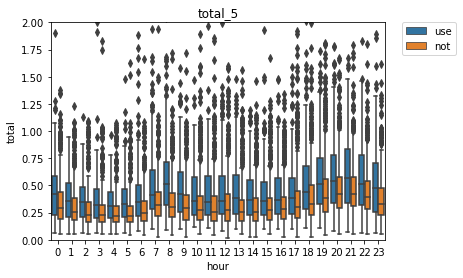

In [21]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_5')
plt.show()

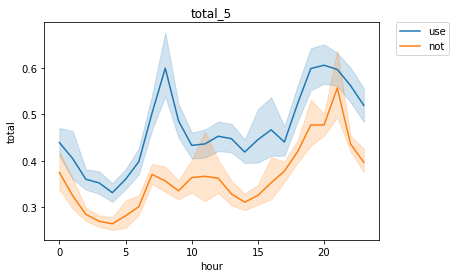

In [22]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_5')
plt.show()

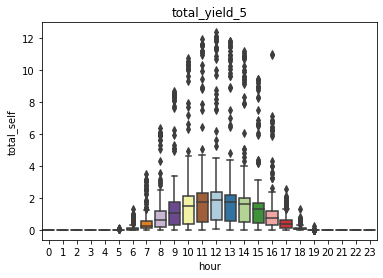

In [23]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_5, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_5')
plt.show()

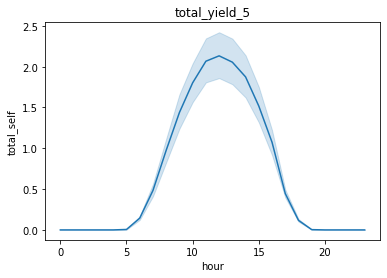

In [24]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_5)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_5')
plt.show()

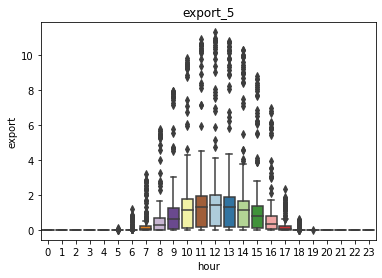

In [25]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_5, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_5')
plt.show()

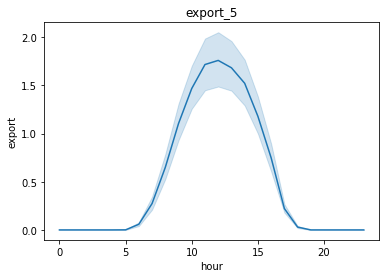

In [26]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_5)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_5')
plt.show()

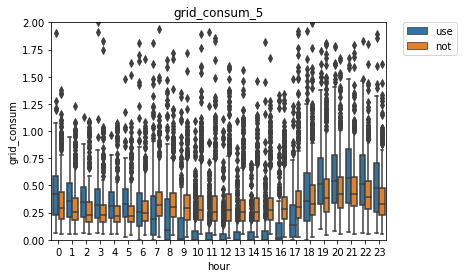

In [27]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_5')
plt.show()

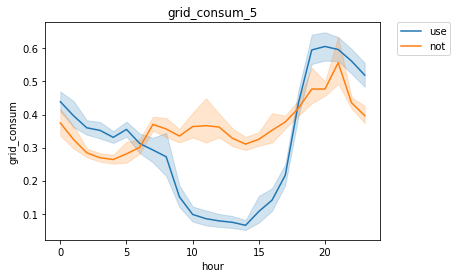

In [28]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_5')
plt.show()

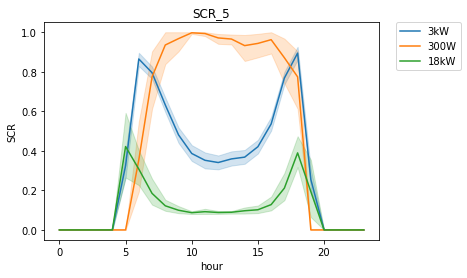

In [29]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_5')
plt.show()

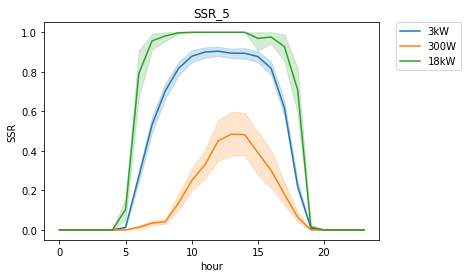

In [30]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_5')
plt.show()

<hr>

### 2021.06

In [31]:
df_all_hour_21_6 = df_all_hour[df_all_hour.ym == '2021/6']

In [32]:
# 총 전력 소비량
df_all_hour_21_6.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean        std       min       25%       50%       75%  \
type 시간                                                                       
not  0   682.0  0.380878   0.466661  0.069977  0.209961  0.289978  0.447464   
     1   685.0  0.335023   0.329846  0.049988  0.189941  0.250000  0.400024   
     2   685.0  0.294073   0.187804  0.059998  0.170044  0.230011  0.350037   
     3   686.0  0.291473   0.246565  0.059998  0.169983  0.229980  0.340027   
     4   688.0  0.268598   0.172181  0.059998  0.160034  0.219971  0.320007   
     5   669.0  0.269103   0.168296  0.049988  0.160034  0.220032  0.320007   
     6   663.0  0.304569   0.186254  0.059998  0.179993  0.250000  0.380005   
     7   660.0  0.379030   0.227871  0.059998  0.229980  0.329956  0.460022   
     8   665.0  0.368947   0.359657  0.049988  0.200012  0.300049  0.459961   
     9   676.0  0.354083   0.301313  0.059998  0.179993  0.295013  0.429993   
     10  672.0  0.343587   0.317509  0.059998  0.170013  0.280029  0.419998   
     11  681.0  0.361790   0.602238  0.059998  0.170044  0.270020  0.420044   
     12  674.0  0.348978   0.420522  0.059998  0.179993  0.280029  0.419983   
     13  678.0  0.979350  14.737443  0.059998  0.179993  0.279938  0.429977   
     14  681.0  0.357122   0.404672  0.059998  0.179993  0.280029  0.409973   
     15  678.0  0.359099   0.386709  0.049988  0.190002  0.290039  0.417450   
     16  674.0  0.408605   1.261005  0.059998  0.189957  0.299988  0.450012   
     17  677.0  0.393634   0.365312  0.059998  0.199951  0.329956  0.479980   
     18  677.0  0.445435   0.342942  0.059998  0.210022  0.350037  0.549988   
     19  679.0  0.515082   0.638770  0.059998  0.250000  0.399963  0.570038   
     20  681.0  0.531249   0.494122  0.079987  0.290009  0.440002  0.630005   
     21  682.0  0.515514   0.327473  0.119995  0.320007  0.440002  0.619995   
     22  688.0  0.469535   0.294699  0.089996  0.280029  0.390015  0.582504   
     23  677.0  0.409764   0.293929  0.089996  0.230011  0.330017  0.510010   
use  0   294.0  0.425729   0.238926  0.059998  0.229980  0.409973  0.559937   
     1   293.0  0.380237   0.234166  0.059998  0.229980  0.349976  0.500000   
     2   292.0  0.341468   0.168381  0.059998  0.220024  0.314972  0.452499   
     3   293.0  0.332408   0.183115  0.050003  0.210022  0.290039  0.440002   
     4   289.0  0.315168   0.163343  0.059998  0.200012  0.279968  0.429993   
     5   286.0  0.322589   0.159251  0.069794  0.219978  0.290039  0.407440   
     6   283.0  0.386348   0.327578  0.080017  0.219940  0.309990  0.469910   
     7   286.0  0.489186   0.322913  0.089844  0.269913  0.389984  0.619995   
     8   286.0  0.517893   0.288504  0.090057  0.312540  0.459961  0.637512   
     9   286.0  0.486517   0.465461  0.110107  0.270020  0.434948  0.603699   
     10  290.0  0.447568   0.343363  0.129944  0.240112  0.400024  0.570236   
     11  290.0  0.474172   0.346359  0.110046  0.240005  0.409912  0.590073   
     12  291.0  0.501070   0.392159  0.109985  0.250050  0.429993  0.650055   
     13  294.0  0.487944   0.354538  0.119934  0.270027  0.429932  0.590012   
     14  295.0  0.461192   0.381522  0.130005  0.259994  0.399971  0.520020   
     15  296.0  0.468277   0.507433  0.120026  0.250000  0.400013  0.532364   
     16  296.0  0.451744   0.287404  0.110245  0.259903  0.414764  0.539932   
     17  294.0  0.469615   0.280836  0.110001  0.270020  0.390045  0.590012   
     18  296.0  0.529815   0.340041  0.109818  0.279961  0.430054  0.724976   
     19  296.0  0.591717   0.383764  0.099792  0.307480  0.514984  0.769913   
     20  297.0  0.608390   0.326747  0.080002  0.369995  0.549988  0.820007   
     21  296.0  0.582449   0.319292  0.069992  0.359985  0.539978  0.750000   
     22  296.0  0.566875   0.374245  0.069992  0.330017  0.504974  0.760010   
     23  291.0  0.505448   0.310596  0.069992  0.250000  0.470032  0.670044   

                max  
type 시간              
not  0    10.5

In [33]:
# 총 전력 생산량
df_all_hour_21_6_use = df_all_hour_21_6[df_all_hour_21_6.type == 'use']
df_all_hour_21_6_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   294.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   293.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   292.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   293.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   289.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   286.0  0.012692  0.020535  0.000000  0.000000  0.010010  0.019897   
6   283.0  0.197660  0.256352  0.000000  0.049957  0.120117  0.205017   
7   286.0  0.550654  0.670243  0.000000  0.189941  0.380005  0.569946   
8   286.0  1.017281  1.230554  0.000000  0.362579  0.709961  1.097504   
9   286.0  1.466915  1.652002  0.010002  0.489990  1.129944  1.654938   
10  290.0  1.842553  2.099967  0.029999  0.750000  1.484985  1.930023   
11  290.0  2.002020  2.289045  0.029999  0.834961  1.599976  2.090012   
12  291.0  2.091860  2.408925  0.000000  0.895020  1.739990  2.140015   
13  294.0  2.020305  2.311293  0.009995  0.772522  1.640015  2.060028   
14  295.0  1.851666  2.073018  0.010010  0.770020  1.510010  1.910034   
15  296.0  1.442325  1.621305  0.000000  0.647522  1.210022  1.536285   
16  296.0  1.043654  1.233275  0.000000  0.429932  0.809937  1.119995   
17  294.0  0.524067  0.557385  0.000000  0.220001  0.389954  0.619995   
18  296.0  0.176577  0.212550  0.000000  0.067474  0.140015  0.189941   
19  296.0  0.014171  0.043774  0.000000  0.000000  0.010010  0.020020   
20  297.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  296.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  296.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  291.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.180176  
6    1.209961  
7    3.169922  
8    5.899902  
9    8.450195  
10  10.870117  
11  11.240234  
12  12.620117  
13  11.840332  
14  11.100037  
15   8.739746  
16   7.179688  
17   3.270020  
18   1.599243  
19   0.704712  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [34]:
# 총 전력 수출량
df_all_hour_21_6_use = df_all_hour_21_6[df_all_hour_21_6.type == 'use']
df_all_hour_21_6_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   294.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   293.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   292.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   293.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   289.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   286.0  0.001816  0.011181  0.0  0.000000  0.000000  0.000000   0.120117
6   283.0  0.084570  0.227911  0.0  0.000000  0.000000  0.024994   1.060059
7   286.0  0.310544  0.638843  0.0  0.000000  0.080017  0.257507   2.899902
8   286.0  0.686160  1.191873  0.0  0.019997  0.309998  0.717468   5.530273
9   286.0  1.104405  1.593247  0.0  0.122498  0.779999  1.297440   7.930176
10  290.0  1.462836  2.019397  0.0  0.305023  1.089966  1.564987   9.950195
11  290.0  1.609685  2.188032  0.0  0.395020  1.194977  1.750000  10.580078
12  291.0  1.670337  2.272991  0.0  0.429993  1.209991  1.750000  11.330078
13  294.0  1.611472  2.207298  0.0  0.341324  1.130005  1.717484  10.840332
14  295.0  1.458299  1.956801  0.0  0.340012  1.049988  1.544952   9.810059
15  296.0  1.073200  1.545264  0.0  0.174988  0.750000  1.189972   8.200195
16  296.0  0.706408  1.187662  0.0  0.050041  0.390015  0.762497   6.709961
17  294.0  0.263647  0.531592  0.0  0.000000  0.070007  0.267471   2.979980
18  296.0  0.046724  0.154988  0.0  0.000000  0.000000  0.010010   1.260254
19  296.0  0.001217  0.009779  0.0  0.000000  0.000000  0.000000   0.120148
20  297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  296.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  296.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  291.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [35]:
# 총 그리드 소비량
df_all_hour_21_6.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean        std       min       25%       50%       75%  \
type 시간                                                                       
not  0   682.0  0.380878   0.466661  0.069977  0.209961  0.289978  0.447464   
     1   685.0  0.335023   0.329846  0.049988  0.189941  0.250000  0.400024   
     2   685.0  0.294073   0.187804  0.059998  0.170044  0.230011  0.350037   
     3   686.0  0.291473   0.246565  0.059998  0.169983  0.229980  0.340027   
     4   688.0  0.268598   0.172181  0.059998  0.160034  0.219971  0.320007   
     5   669.0  0.269103   0.168296  0.049988  0.160034  0.220032  0.320007   
     6   663.0  0.304569   0.186254  0.059998  0.179993  0.250000  0.380005   
     7   660.0  0.379030   0.227871  0.059998  0.229980  0.329956  0.460022   
     8   665.0  0.368947   0.359657  0.049988  0.200012  0.300049  0.459961   
     9   676.0  0.354083   0.301313  0.059998  0.179993  0.295013  0.429993   
     10  672.0  0.343587   0.317509  0.059998  0.170013  0.280029  0.419998   
     11  681.0  0.361790   0.602238  0.059998  0.170044  0.270020  0.420044   
     12  674.0  0.348978   0.420522  0.059998  0.179993  0.280029  0.419983   
     13  678.0  0.979350  14.737443  0.059998  0.179993  0.279938  0.429977   
     14  681.0  0.357122   0.404672  0.059998  0.179993  0.280029  0.409973   
     15  678.0  0.359099   0.386709  0.049988  0.190002  0.290039  0.417450   
     16  674.0  0.408605   1.261005  0.059998  0.189957  0.299988  0.450012   
     17  677.0  0.393634   0.365312  0.059998  0.199951  0.329956  0.479980   
     18  677.0  0.445435   0.342942  0.059998  0.210022  0.350037  0.549988   
     19  679.0  0.515082   0.638770  0.059998  0.250000  0.399963  0.570038   
     20  681.0  0.531249   0.494122  0.079987  0.290009  0.440002  0.630005   
     21  682.0  0.515514   0.327473  0.119995  0.320007  0.440002  0.619995   
     22  688.0  0.469535   0.294699  0.089996  0.280029  0.390015  0.582504   
     23  677.0  0.409764   0.293929  0.089996  0.230011  0.330017  0.510010   
use  0   294.0  0.426138   0.239181  0.059998  0.229980  0.409973  0.559937   
     1   293.0  0.380647   0.234507  0.059998  0.229980  0.349976  0.500000   
     2   292.0  0.341698   0.168614  0.059998  0.220024  0.314972  0.452499   
     3   293.0  0.332408   0.183115  0.050003  0.210022  0.290039  0.440002   
     4   289.0  0.315168   0.163343  0.059998  0.200012  0.279968  0.429993   
     5   286.0  0.311712   0.159677  0.040009  0.209999  0.290039  0.390015   
     6   283.0  0.273258   0.332330  0.000000  0.080017  0.200012  0.349976   
     7   286.0  0.249076   0.310217  0.000000  0.020020  0.140015  0.395020   
     8   286.0  0.186772   0.283511  0.000000  0.000000  0.050034  0.280014   
     9   286.0  0.124007   0.381847  0.000000  0.000000  0.010010  0.097481   
     10  290.0  0.067851   0.205086  0.000000  0.000000  0.000000  0.039978   
     11  290.0  0.081837   0.237329  0.000000  0.000000  0.000000  0.029991   
     12  291.0  0.079547   0.211977  0.000000  0.000000  0.000000  0.059937   
     13  294.0  0.079112   0.198657  0.000000  0.000000  0.000000  0.059998   
     14  295.0  0.067825   0.162427  0.000000  0.000000  0.000000  0.040039   
     15  296.0  0.099152   0.307234  0.000000  0.000000  0.000000  0.080017   
     16  296.0  0.114498   0.205406  0.000000  0.000000  0.020020  0.159973   
     17  294.0  0.209195   0.253481  0.000000  0.019989  0.130005  0.280029   
     18  296.0  0.399963   0.327683  0.000000  0.147476  0.309998  0.589973   
     19  296.0  0.578763   0.382119  0.049988  0.299988  0.500000  0.750000   
     20  297.0  0.608794   0.326705  0.080002  0.369995  0.559998  0.820007   
     21  296.0  0.585412   0.324106  0.069992  0.359985  0.539978  0.750000   
     22  296.0  0.565580   0.354117  0.069992  0.330017  0.504974  0.760010   
     23  291.0  0.508966   0.331870  0.069992  0.250000  0.470032  0.670044   

                max  
type 시간              
not  0    10.5

In [36]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.606537  0.365378  0.000000  0.412884  0.628049   
         6    30.0  0.210488  0.135184  0.095293  0.133210  0.153792   
         7    29.0  0.111857  0.033607  0.073989  0.084556  0.106880   
         8    29.0  0.089388  0.038022  0.053010  0.069053  0.079781   
         9    30.0  0.085163  0.024299  0.059478  0.066403  0.083350   
         10   30.0  0.078040  0.019519  0.049898  0.060702  0.080050   
         11   30.0  0.078736  0.017314  0.053530  0.061977  0.079095   
         12   30.0  0.085738  0.020334  0.060218  0.074604  0.079086   
         13   30.0  0.076164  0.025999  0.046645  0.053020  0.066973   
         14   30.0  0.074056  0.018234  0.043968  0.060995  0.068792   
         15   30.0  0.087270  0.023294  0.039872  0.069469  0.086963   
         16   29.0  0.116619  0.068385  0.065424  0.071991  0.095697   
         17   29.0  0.156287  0.125909  0.000000  0.099064  0.128444   
         18   29.0  0.294749  0.199790  0.000000  0.188252  0.224664   
         19   29.0  0.535371  0.447350  0.000000  0.000000  0.569444   
         20   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.566667  0.504007  0.000000  0.000000  1.000000   
         7    30.0  0.833333  0.379049  0.000000  1.000000  1.000000   
         8    30.0  0.966667  0.182574  0.000000  1.000000  1.000000   
         9    30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   29.0  0.997126  0.015474  0.916668  1.000000  1.000000   
         11   29.0  0.989548  0.026658  0.916663  1.000000  1.000000   
         12   29.0  0.987133  0.030020  0.888889  1.000000  1.000000   
         13   30.0  0.978278  0.059368  0.739134  1.000000  1.000000   
         14   30.0  0.970810  0.065507  0.739134  1.000000  1.000000   
         15   30.0  0.956976  0.186060  0.000000  1.000000  1.000000   
         16   30.0  0.966667  0.182574  0.000000  1.000000  1.000000   
         17   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         18   30.0  0.866667  0.345746  0.000000  1.000000  1.000000   
         19   30.0  0.100000  0.305129  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   233.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   229.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   226.0  0.587757  0.492704  0.000000  0.0

In [37]:
# SSR(자가공급률)
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.211137  0.135369  0.000000  0.127763  0.230475   
         6    30.0  0.904322  0.189482  0.250191  0.943639  1.000000   
         7    29.0  0.997541  0.013241  0.928696  1.000000  1.000000   
         8    29.0  0.988514  0.061856  0.666893  1.000000  1.000000   
         9    30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   29.0  0.968724  0.168424  0.093010  1.000000  1.000000   
         17   29.0  0.945594  0.204504  0.000000  1.000000  1.000000   
         18   29.0  0.790121  0.320066  0.000000  0.635820  0.958267   
         19   29.0  0.088675  0.108819  0.000000  0.000000  0.065206   
         20   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.020426  0.021940  0.000000  0.000000  0.017271   
         7    30.0  0.046513  0.033101  0.000000  0.021470  0.046920   
         8    30.0  0.073960  0.059867  0.000000  0.038376  0.057028   
         9    30.0  0.154846  0.093219  0.013891  0.089389  0.141736   
         10   29.0  0.305528  0.173485  0.047619  0.158541  0.285711   
         11   29.0  0.277964  0.201953  0.034967  0.111111  0.222269   
         12   29.0  0.355856  0.246992  0.012051  0.124090  0.323075   
         13   30.0  0.405387  0.269401  0.014278  0.152374  0.415047   
         14   30.0  0.411593  0.250978  0.021509  0.198810  0.405014   
         15   30.0  0.314403  0.216768  0.000000  0.164726  0.284690   
         16   30.0  0.260812  0.172846  0.000000  0.131305  0.203328   
         17   30.0  0.140981  0.103624  0.021743  0.063529  0.119634   
         18   30.0  0.056248  0.056252  0.000000  0.018036  0.039470   
         19   30.0  0.000917  0.002855  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   233.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   229.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   226.0  0.032634  0.040894  0.000000  0.0

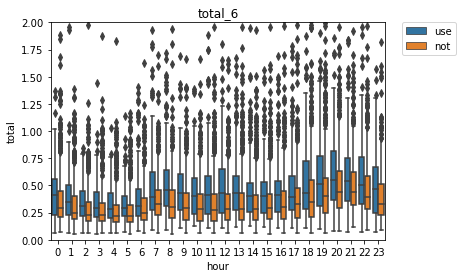

In [38]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_6')
plt.show()

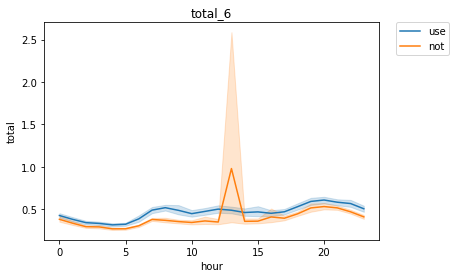

In [39]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_6')
plt.show()

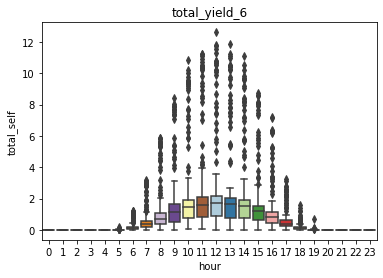

In [40]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_6, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_6')
plt.show()

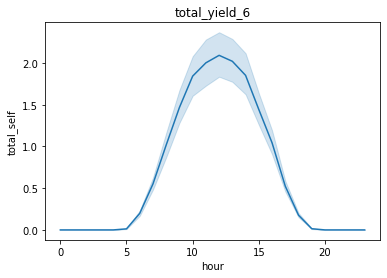

In [41]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_6)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_6')
plt.show()

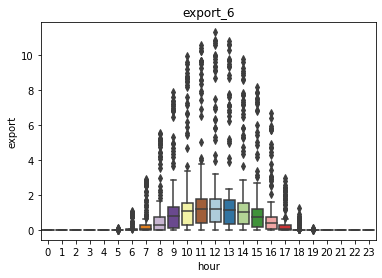

In [42]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_6, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_6')
plt.show()

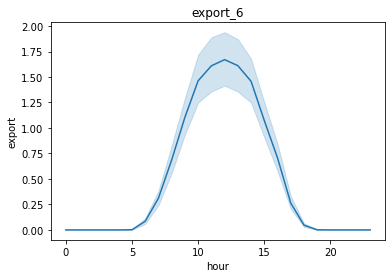

In [43]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_6)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_6')
plt.show()

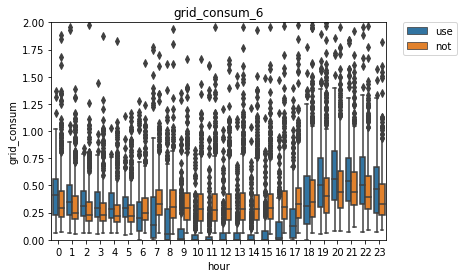

In [44]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_6')
plt.show()

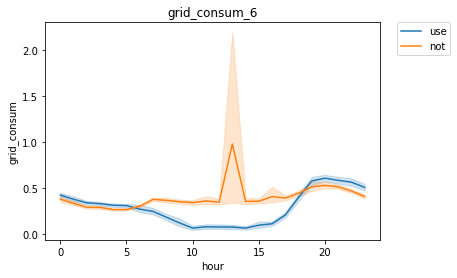

In [45]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_6')
plt.show()

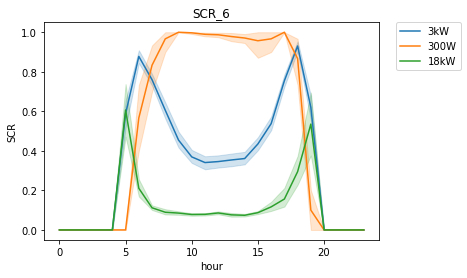

In [46]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_6')
plt.show()

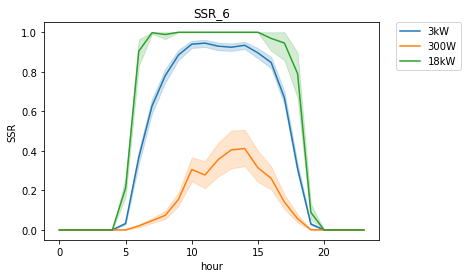

In [47]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_6')
plt.show()

<hr>

### 2021.07

In [48]:
df_all_hour_21_7 = df_all_hour[df_all_hour.ym == '2021/7']

In [49]:
# 총 전력 소비량
df_all_hour_21_7.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   740.0  0.469148  0.455737  0.049988  0.229980  0.370056  0.602524   
     1   736.0  0.418274  0.333700  0.059998  0.210022  0.329956  0.549927   
     2   737.0  0.374589  0.247578  0.059998  0.209961  0.309998  0.489990   
     3   737.0  0.340152  0.215896  0.059998  0.190002  0.289978  0.439941   
     4   736.0  0.315919  0.196770  0.059998  0.180054  0.270020  0.390015   
     5   734.0  0.304223  0.187533  0.049988  0.179993  0.250000  0.380005   
     6   737.0  0.434585  1.995637  0.059998  0.200012  0.300049  0.429932   
     7   740.0  0.446620  0.359717  0.059998  0.260010  0.360046  0.512497   
     8   739.0  0.424047  0.304000  0.059998  0.250000  0.369995  0.510010   
     9   736.0  0.438219  0.327605  0.059998  0.239990  0.359985  0.549988   
     10  735.0  0.468991  0.458680  0.049988  0.229980  0.369995  0.565002   
     11  738.0  0.603485  1.893247  0.049988  0.210022  0.380005  0.599976   
     12  737.0  0.511994  0.461487  0.049988  0.219971  0.389954  0.640015   
     13  738.0  0.521543  0.518229  0.059998  0.210022  0.380005  0.660034   
     14  735.0  0.517986  0.441232  0.059998  0.230042  0.380005  0.660034   
     15  729.0  0.526653  0.473015  0.050049  0.230103  0.380005  0.660034   
     16  732.0  0.585613  0.905638  0.049988  0.250000  0.400024  0.679947   
     17  738.0  0.632820  0.666686  0.059998  0.272491  0.440063  0.777527   
     18  734.0  0.684362  0.658407  0.059998  0.280029  0.500000  0.859955   
     19  735.0  0.682013  0.601620  0.069977  0.310028  0.510010  0.865051   
     20  737.0  0.732454  0.743533  0.059998  0.369995  0.560059  0.850037   
     21  739.0  0.699488  0.501185  0.059998  0.390015  0.560059  0.859985   
     22  746.0  0.625469  0.471808  0.070007  0.340027  0.514984  0.780029   
     23  734.0  0.523626  0.373379  0.059998  0.270020  0.420044  0.679977   
use  0   298.0  0.522752  0.352712  0.059998  0.262505  0.424988  0.669983   
     1   302.0  0.465739  0.300232  0.059998  0.260010  0.380005  0.617493   
     2   303.0  0.405567  0.226310  0.059998  0.239990  0.339966  0.554962   
     3   301.0  0.389396  0.215516  0.059998  0.229980  0.309937  0.549927   
     4   300.0  0.387177  0.233050  0.059998  0.220032  0.304993  0.560059   
     5   299.0  0.394679  0.199809  0.070251  0.230042  0.329956  0.534973   
     6   301.0  0.442947  0.448608  0.099991  0.259827  0.339905  0.560059   
     7   301.0  0.566415  0.657602  0.109604  0.300110  0.449890  0.680054   
     8   302.0  0.668934  0.723818  0.169922  0.370239  0.529541  0.749975   
     9   300.0  0.604022  0.441959  0.150024  0.347488  0.494999  0.712646   
     10  302.0  0.586407  0.374328  0.150024  0.319962  0.489994  0.727509   
     11  301.0  0.703648  0.757711  0.139893  0.330078  0.539917  0.840820   
     12  301.0  0.730922  0.547107  0.159973  0.359863  0.579956  0.899414   
     13  295.0  0.773447  0.648812  0.149902  0.369995  0.589966  0.865021   
     14  295.0  0.777246  0.632749  0.150024  0.360077  0.570312  0.909668   
     15  295.0  0.772907  0.616628  0.140015  0.349976  0.600037  0.970123   
     16  296.0  0.729344  0.598501  0.140137  0.349792  0.530029  0.919945   
     17  298.0  0.748563  0.573623  0.129883  0.369995  0.520050  0.965012   
     18  294.0  0.875209  0.665808  0.119766  0.390194  0.619965  1.177460   
     19  294.0  1.009952  0.786641  0.110260  0.409973  0.684998  1.507502   
     20  293.0  0.973290  0.705224  0.120010  0.429993  0.750000  1.290039   
     21  297.0  0.914983  0.613900  0.089996  0.450012  0.739990  1.199951   
     22  297.0  0.788490  0.552722  0.059998  0.420044  0.639954  1.010010   
     23  296.0  0.623286  0.445986  0.059998  0.327469  0.515015  0.790039   

               max  
type 시간             
not  0    9.669983  
     1    4.840027  
     2    2.150024  
   

In [50]:
# 총 전력 생산량
df_all_hour_21_7_use = df_all_hour_21_7[df_all_hour_21_7.type == 'use']
df_all_hour_21_7_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   298.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   302.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   301.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   300.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   299.0  0.004311  0.009710  0.0  0.000000  0.000000  0.009888   0.089844
6   301.0  0.142575  0.208723  0.0  0.030029  0.079956  0.150024   1.320312
7   301.0  0.462838  0.591872  0.0  0.130005  0.309937  0.479980   2.950195
8   302.0  0.944101  1.132334  0.0  0.319946  0.660034  1.000000   5.330078
9   300.0  1.392070  1.580965  0.0  0.607513  0.974976  1.539917   7.610352
10  302.0  1.753337  1.981295  0.0  0.792511  1.345032  1.819946   9.660156
11  301.0  1.967987  2.193807  0.0  0.849976  1.619995  2.020020  10.479492
12  301.0  2.061562  2.264503  0.0  0.949951  1.580078  2.130005  10.930664
13  295.0  2.040770  2.235858  0.0  0.924927  1.660034  2.070068  10.929688
14  295.0  1.760258  1.887395  0.0  0.744995  1.530029  1.859985  10.279297
15  295.0  1.487107  1.746297  0.0  0.530029  1.239990  1.529968  11.300049
16  296.0  1.026151  1.213488  0.0  0.375031  0.780029  1.150024   6.990234
17  298.0  0.510644  0.537314  0.0  0.192535  0.389954  0.630005   3.869995
18  294.0  0.160642  0.174022  0.0  0.059937  0.130066  0.190033   1.160156
19  294.0  0.012964  0.021182  0.0  0.000000  0.010010  0.019897   0.190063
20  293.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  296.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [51]:
# 총 전력 수출량
df_all_hour_21_7_use = df_all_hour_21_7[df_all_hour_21_7.type == 'use']
df_all_hour_21_7_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   298.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   302.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   301.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   300.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   299.0  0.000299  0.003192  0.0  0.000000  0.000000  0.000000   0.049805
6   301.0  0.049057  0.155861  0.0  0.000000  0.000000  0.000000   1.120117
7   301.0  0.227993  0.530446  0.0  0.000000  0.020020  0.119995   2.600098
8   302.0  0.582818  1.066756  0.0  0.010010  0.239990  0.510010   4.870117
9   300.0  0.964352  1.483192  0.0  0.097473  0.524994  0.997498   6.740234
10  302.0  1.292496  1.857587  0.0  0.282501  0.810028  1.355011   8.640137
11  301.0  1.432516  2.065199  0.0  0.270020  0.859985  1.530029   9.679688
12  301.0  1.498982  2.161410  0.0  0.341370  0.900024  1.580078  10.310547
13  295.0  1.459362  2.133639  0.0  0.260010  0.930054  1.505005  10.129883
14  295.0  1.193624  1.782253  0.0  0.179993  0.699951  1.344971   9.330078
15  295.0  0.964148  1.610491  0.0  0.049988  0.479980  1.045044   8.280273
16  296.0  0.602636  1.138459  0.0  0.010007  0.235016  0.579956   6.549805
17  298.0  0.202020  0.444011  0.0  0.000000  0.020020  0.180023   2.399902
18  294.0  0.028645  0.109599  0.0  0.000000  0.000000  0.000000   0.779785
19  294.0  0.000174  0.001742  0.0  0.000000  0.000000  0.000000   0.020020
20  293.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  296.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [52]:
# 총 그리드 소비량
df_all_hour_21_7.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   740.0  0.469148  0.455737  0.049988  0.229980  0.370056  0.602524   
     1   736.0  0.418274  0.333700  0.059998  0.210022  0.329956  0.549927   
     2   737.0  0.374589  0.247578  0.059998  0.209961  0.309998  0.489990   
     3   737.0  0.340152  0.215896  0.059998  0.190002  0.289978  0.439941   
     4   736.0  0.315919  0.196770  0.059998  0.180054  0.270020  0.390015   
     5   734.0  0.304223  0.187533  0.049988  0.179993  0.250000  0.380005   
     6   737.0  0.434585  1.995637  0.059998  0.200012  0.300049  0.429932   
     7   740.0  0.446620  0.359717  0.059998  0.260010  0.360046  0.512497   
     8   739.0  0.424047  0.304000  0.059998  0.250000  0.369995  0.510010   
     9   736.0  0.438219  0.327605  0.059998  0.239990  0.359985  0.549988   
     10  735.0  0.468991  0.458680  0.049988  0.229980  0.369995  0.565002   
     11  738.0  0.603485  1.893247  0.049988  0.210022  0.380005  0.599976   
     12  737.0  0.511994  0.461487  0.049988  0.219971  0.389954  0.640015   
     13  738.0  0.521543  0.518229  0.059998  0.210022  0.380005  0.660034   
     14  735.0  0.517986  0.441232  0.059998  0.230042  0.380005  0.660034   
     15  729.0  0.526653  0.473015  0.050049  0.230103  0.380005  0.660034   
     16  732.0  0.585613  0.905638  0.049988  0.250000  0.400024  0.679947   
     17  738.0  0.632820  0.666686  0.059998  0.272491  0.440063  0.777527   
     18  734.0  0.684362  0.658407  0.059998  0.280029  0.500000  0.859955   
     19  735.0  0.682013  0.601620  0.069977  0.310028  0.510010  0.865051   
     20  737.0  0.732454  0.743533  0.059998  0.369995  0.560059  0.850037   
     21  739.0  0.699488  0.501185  0.059998  0.390015  0.560059  0.859985   
     22  746.0  0.625469  0.471808  0.070007  0.340027  0.514984  0.780029   
     23  734.0  0.523626  0.373379  0.059998  0.270020  0.420044  0.679977   
use  0   298.0  0.523526  0.353965  0.059998  0.262505  0.424988  0.669983   
     1   302.0  0.465743  0.300236  0.059998  0.260010  0.380005  0.617493   
     2   303.0  0.405571  0.226316  0.059998  0.239990  0.339966  0.554962   
     3   301.0  0.389396  0.215516  0.059998  0.229980  0.309937  0.549927   
     4   300.0  0.387177  0.233050  0.059998  0.220032  0.304993  0.560059   
     5   299.0  0.390667  0.199512  0.059998  0.230026  0.325012  0.530029   
     6   301.0  0.349430  0.457848  0.000000  0.160034  0.260010  0.469971   
     7   301.0  0.331571  0.671396  0.000000  0.059937  0.210022  0.429993   
     8   302.0  0.307652  0.729078  0.000000  0.000000  0.079956  0.360031   
     9   300.0  0.176304  0.392712  0.000000  0.000000  0.019989  0.180054   
     10  302.0  0.125566  0.289103  0.000000  0.000000  0.000000  0.137512   
     11  301.0  0.168178  0.554669  0.000000  0.000000  0.000000  0.140015   
     12  301.0  0.168343  0.369615  0.000000  0.000000  0.000000  0.169922   
     13  295.0  0.192039  0.429133  0.000000  0.000000  0.000000  0.140015   
     14  295.0  0.210613  0.416633  0.000000  0.000000  0.010010  0.230042   
     15  295.0  0.249948  0.453529  0.000000  0.000000  0.039978  0.310059   
     16  296.0  0.305829  0.534780  0.000000  0.000000  0.085022  0.372498   
     17  298.0  0.439939  0.540253  0.000000  0.052536  0.239990  0.627411   
     18  294.0  0.743212  0.674825  0.000000  0.239990  0.515015  1.044952   
     19  294.0  0.997162  0.788519  0.100006  0.399963  0.669952  1.494995   
     20  293.0  0.973294  0.705222  0.120010  0.429993  0.750000  1.290039   
     21  297.0  0.914988  0.613899  0.089996  0.450012  0.739990  1.199951   
     22  297.0  0.788494  0.552722  0.059998  0.420044  0.639954  1.010010   
     23  296.0  0.623289  0.445987  0.059998  0.327469  0.515015  0.790039   

               max  
type 시간             
not  0    9.669983  
     1    4.840027  
     2    2.150024  
   

In [53]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.397871  0.469817  0.000000  0.000000  0.000000   
         6    31.0  0.299872  0.160402  0.000000  0.219514  0.298834   
         7    31.0  0.200117  0.164505  0.090909  0.130464  0.151548   
         8    31.0  0.118989  0.048058  0.067776  0.094616  0.104581   
         9    31.0  0.125294  0.088283  0.062241  0.093234  0.106254   
         10   31.0  0.112935  0.047837  0.064164  0.090443  0.101963   
         11   31.0  0.140361  0.163554  0.062938  0.092680  0.104410   
         12   31.0  0.127791  0.164032  0.056732  0.077750  0.097202   
         13   31.0  0.103043  0.030128  0.047476  0.086602  0.093259   
         14   31.0  0.116304  0.029116  0.068298  0.099511  0.109733   
         15   31.0  0.166988  0.176675  0.062589  0.090833  0.123656   
         16   30.0  0.167310  0.096011  0.057609  0.105108  0.127337   
         17   30.0  0.304307  0.219939  0.072621  0.158862  0.206014   
         18   30.0  0.610878  0.276132  0.196078  0.385243  0.565756   
         19   30.0  0.541674  0.496305  0.000000  0.000000  0.955752   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    29.0  0.413793  0.501230  0.000000  0.000000  0.000000   
         7    29.0  0.896552  0.309934  0.000000  1.000000  1.000000   
         8    29.0  0.965517  0.185695  0.000000  1.000000  1.000000   
         9    29.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   29.0  0.996865  0.016881  0.909092  1.000000  1.000000   
         11   29.0  0.997537  0.013264  0.928571  1.000000  1.000000   
         12   29.0  0.994241  0.017274  0.941176  1.000000  1.000000   
         13   29.0  0.985926  0.040849  0.842107  1.000000  1.000000   
         14   29.0  0.994992  0.019679  0.904762  1.000000  1.000000   
         15   29.0  0.993788  0.024369  0.882352  1.000000  1.000000   
         16   28.0  0.926190  0.261895  0.000000  1.000000  1.000000   
         17   28.0  0.961309  0.189055  0.000000  1.000000  1.000000   
         18   28.0  0.857143  0.356348  0.000000  1.000000  1.000000   
         19   28.0  0.107143  0.314970  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   239.0  0.297071  0.457927  0.000000  0.0

In [54]:
# SSR(자가공급률)
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.055857  0.094755  0.000000  0.000000  0.000000   
         6    31.0  0.780957  0.296276  0.000000  0.768848  0.906265   
         7    31.0  0.947047  0.186683  0.044533  1.000000  1.000000   
         8    31.0  0.994070  0.024494  0.874984  1.000000  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  0.970087  0.166550  0.072687  1.000000  1.000000   
         12   31.0  0.971494  0.158714  0.116316  1.000000  1.000000   
         13   31.0  0.998657  0.007480  0.958352  1.000000  1.000000   
         14   31.0  0.984257  0.058034  0.719628  1.000000  1.000000   
         15   31.0  0.944980  0.201750  0.027144  1.000000  1.000000   
         16   30.0  0.971007  0.111974  0.400203  1.000000  1.000000   
         17   30.0  0.930001  0.180014  0.250191  0.970932  1.000000   
         18   30.0  0.668897  0.332891  0.033702  0.399971  0.800316   
         19   30.0  0.040158  0.056993  0.000000  0.000000  0.020962   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    29.0  0.013863  0.018322  0.000000  0.000000  0.000000   
         7    29.0  0.032507  0.023903  0.000000  0.011906  0.025312   
         8    29.0  0.039032  0.039825  0.000000  0.014491  0.027770   
         9    29.0  0.115447  0.077589  0.006668  0.061219  0.102019   
         10   29.0  0.202840  0.115528  0.018022  0.125044  0.212114   
         11   29.0  0.263094  0.160410  0.049992  0.127669  0.263319   
         12   29.0  0.310601  0.216060  0.024290  0.141599  0.299983   
         13   29.0  0.365783  0.276435  0.023473  0.129027  0.297899   
         14   29.0  0.320637  0.232248  0.014711  0.126580  0.249979   
         15   29.0  0.283761  0.228117  0.016950  0.129020  0.179982   
         16   28.0  0.218019  0.199208  0.000000  0.050457  0.174113   
         17   28.0  0.152309  0.167644  0.000000  0.035367  0.084010   
         18   28.0  0.048218  0.059788  0.000000  0.008194  0.025479   
         19   28.0  0.000916  0.002959  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   239.0  0.009872  0.019207  0.000000  0.0

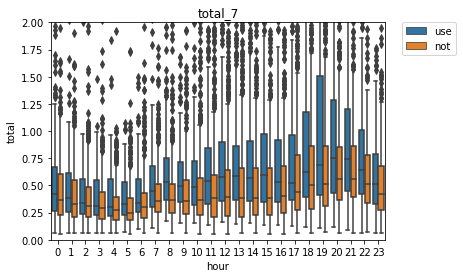

In [55]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_7')
plt.show()

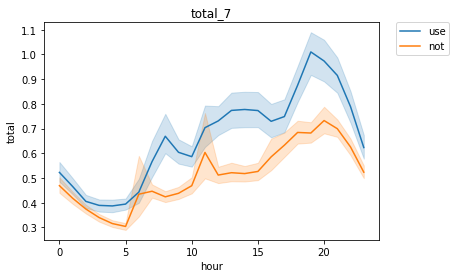

In [56]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_7')
plt.show()

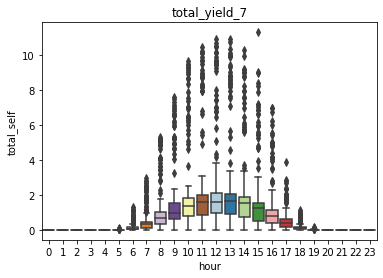

In [57]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_7, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_7')
plt.show()

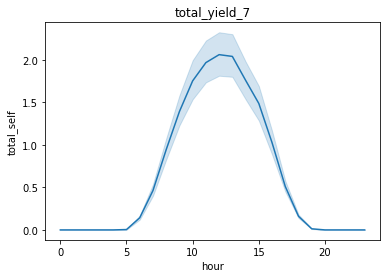

In [58]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_7)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_7')
plt.show()

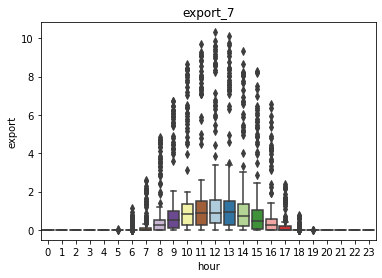

In [59]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_7, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_7')
plt.show()

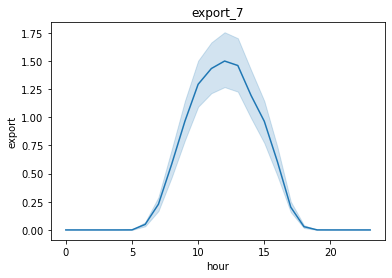

In [60]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_7)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_7')
plt.show()

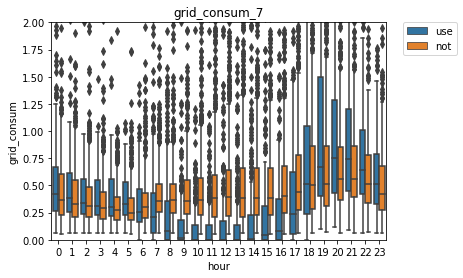

In [61]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_7')
plt.show()

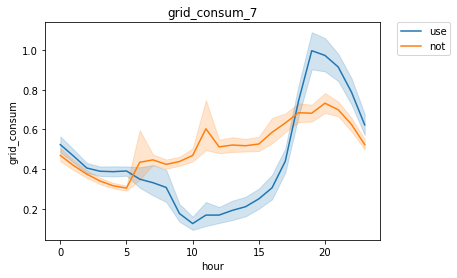

In [62]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_7')
plt.show()

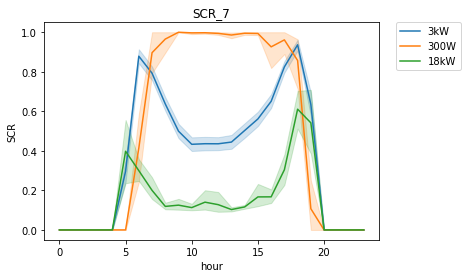

In [63]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_7')
plt.show()

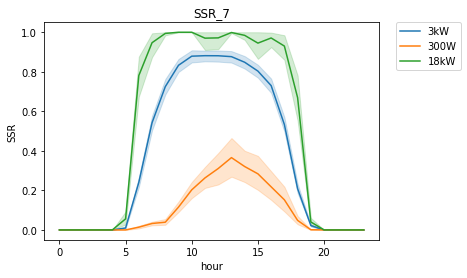

In [64]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_7')
plt.show()

<hr>

### 2021.08

In [65]:
df_all_hour_21_8 = df_all_hour[df_all_hour.ym == '2021/8']

In [66]:
# 총 전력 소비량
df_all_hour_21_8.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   737.0  0.448018  0.485393  0.079956  0.220032  0.349976  0.559937   
     1   746.0  0.396559  0.266982  0.070007  0.219971  0.310059  0.529907   
     2   742.0  0.357535  0.218936  0.059998  0.190063  0.299927  0.479980   
     3   738.0  0.333659  0.283475  0.059998  0.189941  0.279938  0.417496   
     4   737.0  0.311557  0.192068  0.059998  0.179993  0.260010  0.389954   
     5   740.0  0.304407  0.276299  0.049988  0.170044  0.250000  0.359985   
     6   737.0  0.329579  0.243915  0.049988  0.190002  0.270020  0.399902   
     7   743.0  0.409623  0.536144  0.059998  0.229980  0.309998  0.450012   
     8   747.0  0.409451  0.330928  0.049988  0.229980  0.330078  0.500000   
     9   741.0  0.403249  0.320770  0.040039  0.229980  0.349976  0.479980   
     10  740.0  0.515163  1.598673  0.050018  0.219971  0.359985  0.522522   
     11  747.0  0.503372  1.403740  0.049988  0.199951  0.349976  0.549988   
     12  739.0  0.469039  0.420725  0.039978  0.205017  0.349976  0.579956   
     13  744.0  0.492464  0.751412  0.039978  0.200012  0.359985  0.572540   
     14  742.0  0.542315  1.540479  0.039978  0.209961  0.350037  0.550049   
     15  747.0  0.463977  0.394551  0.049988  0.229980  0.369995  0.569946   
     16  748.0  0.502393  0.544703  0.039978  0.237503  0.380005  0.609985   
     17  737.0  0.513866  0.458159  0.059998  0.239990  0.380005  0.640015   
     18  736.0  0.588856  0.574470  0.049988  0.270020  0.420044  0.699982   
     19  748.0  0.653306  0.606148  0.059998  0.310043  0.500000  0.810059   
     20  732.0  0.677866  0.536224  0.069946  0.359985  0.510010  0.839966   
     21  741.0  0.670796  0.698596  0.070007  0.369995  0.520020  0.769897   
     22  736.0  0.557867  0.406745  0.070007  0.317474  0.460083  0.680054   
     23  739.0  0.481923  0.347037  0.079956  0.250000  0.390015  0.619995   
use  0   306.0  0.531294  0.353976  0.059998  0.301285  0.429993  0.667572   
     1   306.0  0.494565  0.355955  0.059998  0.279907  0.390015  0.609955   
     2   305.0  0.435744  0.260537  0.059998  0.260010  0.369995  0.540039   
     3   306.0  0.406478  0.249064  0.050018  0.250000  0.329987  0.510010   
     4   305.0  0.391369  0.219069  0.050018  0.230103  0.319946  0.510010   
     5   303.0  0.409544  0.270493  0.069977  0.239990  0.319946  0.530029   
     6   304.0  0.423350  0.246117  0.080292  0.250107  0.339905  0.559967   
     7   299.0  0.515118  0.337470  0.121033  0.280029  0.400146  0.654968   
     8   303.0  0.628517  0.483953  0.079559  0.349731  0.469971  0.739967   
     9   303.0  0.584078  0.385337  0.089996  0.329956  0.480103  0.699615   
     10  304.0  0.575896  0.388501  0.089783  0.290035  0.460144  0.744690   
     11  300.0  0.605789  0.407414  0.129333  0.310150  0.479980  0.803070   
     12  297.0  0.692646  0.517735  0.144958  0.320068  0.530273  0.860031   
     13  300.0  0.704373  0.502997  0.160034  0.359985  0.539917  0.929688   
     14  301.0  0.674852  0.542438  0.159912  0.339996  0.510010  0.800049   
     15  301.0  0.668981  0.871847  0.119324  0.319336  0.489868  0.760132   
     16  303.0  0.676923  0.579450  0.149963  0.334793  0.500000  0.770081   
     17  303.0  0.746335  0.588355  0.129547  0.369873  0.540039  0.955017   
     18  302.0  0.824881  0.563138  0.099762  0.432495  0.619995  1.110107   
     19  306.0  0.886948  0.607864  0.110016  0.459961  0.689941  1.217468   
     20  306.0  0.858697  0.569512  0.100006  0.449982  0.680054  1.134949   
     21  306.0  0.808986  0.517679  0.069977  0.469971  0.670044  1.070007   
     22  303.0  0.740461  0.485846  0.070007  0.440033  0.630005  0.984985   
     23  307.0  0.641110  0.446566  0.059998  0.359985  0.529907  0.795044   

               max  
type 시간             
not  0   10.520020  
     1    2.540039  
     2    2.070068  
   

In [67]:
# 총 전력 생산량
df_all_hour_21_8_use = df_all_hour_21_8[df_all_hour_21_8.type == 'use']
df_all_hour_21_8_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   303.0  0.001526  0.022535  0.0  0.000000  0.000000  0.000000   0.391602
6   304.0  0.060555  0.098891  0.0  0.000000  0.030029  0.060059   0.639648
7   299.0  0.328227  0.444188  0.0  0.059875  0.199951  0.375000   2.379883
8   303.0  0.724936  0.972148  0.0  0.159912  0.459961  0.879883   5.020508
9   303.0  1.158686  1.483080  0.0  0.269958  0.819824  1.410095   7.810547
10  304.0  1.472699  1.884201  0.0  0.369965  1.114929  1.702454   9.349609
11  300.0  1.623864  2.050148  0.0  0.502502  1.169983  1.812561  10.709961
12  297.0  1.719078  2.129262  0.0  0.520020  1.309570  1.909912  10.690430
13  300.0  1.701834  2.137555  0.0  0.464966  1.284973  1.872498  11.439453
14  301.0  1.455050  1.842503  0.0  0.419922  1.150391  1.669922   9.930664
15  301.0  1.199672  1.553322  0.0  0.309937  0.840088  1.399902   8.709961
16  303.0  0.832086  1.160014  0.0  0.205017  0.550049  0.924988   8.569946
17  303.0  0.396128  0.644060  0.0  0.100098  0.240234  0.464966   9.150024
18  302.0  0.086473  0.122793  0.0  0.019920  0.049805  0.110077   0.819946
19  306.0  0.002549  0.011933  0.0  0.000000  0.000000  0.000000   0.130005
20  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  307.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [68]:
# 총 전력 수출량
df_all_hour_21_8_use = df_all_hour_21_8[df_all_hour_21_8.type == 'use']
df_all_hour_21_8_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
6   304.0  0.015491  0.059035  0.0  0.000000  0.000000  0.000000   0.469727
7   299.0  0.151569  0.387795  0.0  0.000000  0.000000  0.079956   2.120117
8   303.0  0.430000  0.907290  0.0  0.000000  0.089966  0.389954   4.509766
9   303.0  0.791007  1.377451  0.0  0.000000  0.279297  0.919983   7.169922
10  304.0  1.060783  1.744954  0.0  0.027649  0.540039  1.232574   8.549805
11  300.0  1.172122  1.913011  0.0  0.089966  0.619995  1.350006   9.589844
12  297.0  1.228927  1.996759  0.0  0.079956  0.640015  1.439941   9.770508
13  300.0  1.198023  1.991690  0.0  0.099976  0.619995  1.292480  10.309570
14  301.0  0.998261  1.703398  0.0  0.039978  0.550049  1.079956   8.819336
15  301.0  0.769399  1.411602  0.0  0.020000  0.329956  0.880005   7.799805
16  303.0  0.461192  1.000904  0.0  0.000000  0.099976  0.430054   5.590820
17  303.0  0.153664  0.476824  0.0  0.000000  0.009766  0.079956   6.169922
18  302.0  0.015651  0.067735  0.0  0.000000  0.000000  0.000000   0.459961
19  306.0  0.000062  0.000770  0.0  0.000000  0.000000  0.000000   0.010010
20  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  307.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [69]:
# 총 그리드 소비량
df_all_hour_21_8.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   737.0  0.448018  0.485393  0.079956  0.220032  0.349976  0.559937   
     1   746.0  0.396559  0.266982  0.070007  0.219971  0.310059  0.529907   
     2   742.0  0.357535  0.218936  0.059998  0.190063  0.299927  0.479980   
     3   738.0  0.333659  0.283475  0.059998  0.189941  0.279938  0.417496   
     4   737.0  0.311557  0.192068  0.059998  0.179993  0.260010  0.389954   
     5   740.0  0.304407  0.276299  0.049988  0.170044  0.250000  0.359985   
     6   737.0  0.329579  0.243915  0.049988  0.190002  0.270020  0.399902   
     7   743.0  0.409623  0.536144  0.059998  0.229980  0.309998  0.450012   
     8   747.0  0.409451  0.330928  0.049988  0.229980  0.330078  0.500000   
     9   741.0  0.403249  0.320770  0.040039  0.229980  0.349976  0.479980   
     10  740.0  0.515163  1.598673  0.050018  0.219971  0.359985  0.522522   
     11  747.0  0.503372  1.403740  0.049988  0.199951  0.349976  0.549988   
     12  739.0  0.469039  0.420725  0.039978  0.205017  0.349976  0.579956   
     13  744.0  0.492464  0.751412  0.039978  0.200012  0.359985  0.572540   
     14  742.0  0.542315  1.540479  0.039978  0.209961  0.350037  0.550049   
     15  747.0  0.463977  0.394551  0.049988  0.229980  0.369995  0.569946   
     16  748.0  0.502393  0.544703  0.039978  0.237503  0.380005  0.609985   
     17  737.0  0.513866  0.458159  0.059998  0.239990  0.380005  0.640015   
     18  736.0  0.588856  0.574470  0.049988  0.270020  0.420044  0.699982   
     19  748.0  0.653306  0.606148  0.059998  0.310043  0.500000  0.810059   
     20  732.0  0.677866  0.536224  0.069946  0.359985  0.510010  0.839966   
     21  741.0  0.670796  0.698596  0.070007  0.369995  0.520020  0.769897   
     22  736.0  0.557867  0.406745  0.070007  0.317474  0.460083  0.680054   
     23  739.0  0.481923  0.347037  0.079956  0.250000  0.390015  0.619995   
use  0   306.0  0.531294  0.353976  0.059998  0.301285  0.429993  0.667572   
     1   306.0  0.494565  0.355955  0.059998  0.279907  0.390015  0.609955   
     2   305.0  0.435744  0.260537  0.059998  0.260010  0.369995  0.540039   
     3   306.0  0.406478  0.249064  0.050018  0.250000  0.329987  0.510010   
     4   305.0  0.391369  0.219069  0.050018  0.230103  0.319946  0.510010   
     5   303.0  0.408018  0.268321  0.069977  0.239990  0.319946  0.530029   
     6   304.0  0.378286  0.250980  0.009979  0.220078  0.290039  0.529938   
     7   299.0  0.338460  0.357458  0.000000  0.075012  0.239990  0.455078   
     8   303.0  0.333580  0.482754  0.000000  0.010010  0.169922  0.450012   
     9   303.0  0.216398  0.340450  0.000000  0.000000  0.040039  0.280029   
     10  304.0  0.163980  0.288837  0.000000  0.000000  0.014954  0.209961   
     11  300.0  0.154047  0.295103  0.000000  0.000000  0.020020  0.182617   
     12  297.0  0.202495  0.390547  0.000000  0.000000  0.019897  0.229980   
     13  300.0  0.200562  0.376400  0.000000  0.000000  0.030029  0.250000   
     14  301.0  0.218062  0.424834  0.000000  0.000000  0.030029  0.259888   
     15  301.0  0.238708  0.553107  0.000000  0.000000  0.080017  0.270020   
     16  303.0  0.306029  0.402450  0.000000  0.020020  0.140015  0.439941   
     17  303.0  0.503871  0.541882  0.000000  0.140015  0.319824  0.729980   
     18  302.0  0.754059  0.570499  0.029999  0.352501  0.540039  1.070038   
     19  306.0  0.884461  0.607463  0.110016  0.459961  0.689941  1.207458   
     20  306.0  0.858697  0.569512  0.100006  0.449982  0.680054  1.134949   
     21  306.0  0.808986  0.517679  0.069977  0.469971  0.670044  1.070007   
     22  303.0  0.740461  0.485846  0.070007  0.440033  0.630005  0.984985   
     23  307.0  0.641110  0.446566  0.059998  0.359985  0.529907  0.795044   

               max  
type 시간             
not  0   10.520020  
     1    2.540039  
     2    2.070068  
   

In [70]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.032258  0.179605  0.000000  0.000000  0.000000   
         6    31.0  0.483271  0.298410  0.000000  0.245525  0.485488   
         7    31.0  0.234814  0.214826  0.000000  0.138940  0.160553   
         8    31.0  0.168284  0.145585  0.071747  0.092534  0.103906   
         9    31.0  0.120417  0.054061  0.000000  0.092392  0.107216   
         10   31.0  0.162384  0.194279  0.078013  0.091796  0.111431   
         11   31.0  0.122532  0.068952  0.057218  0.090212  0.103241   
         12   31.0  0.116417  0.052771  0.078162  0.087286  0.104305   
         13   31.0  0.140558  0.107564  0.072630  0.094189  0.106970   
         14   31.0  0.139251  0.081938  0.000000  0.097256  0.111909   
         15   31.0  0.182491  0.181232  0.077295  0.102790  0.124562   
         16   30.0  0.166833  0.132057  0.000000  0.109600  0.118740   
         17   30.0  0.304463  0.216865  0.123806  0.165944  0.217151   
         18   30.0  0.622599  0.280322  0.000000  0.427364  0.573112   
         19   30.0  0.033333  0.182574  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.225806  0.425024  0.000000  0.000000  0.000000   
         7    31.0  0.741935  0.444803  0.000000  0.500000  1.000000   
         8    31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  0.964516  0.179904  0.000000  1.000000  1.000000   
         11   31.0  0.965054  0.179730  0.000000  1.000000  1.000000   
         12   31.0  0.948705  0.183822  0.000000  1.000000  1.000000   
         13   31.0  0.975528  0.054580  0.761895  1.000000  1.000000   
         14   31.0  0.987390  0.034902  0.866661  1.000000  1.000000   
         15   31.0  0.957610  0.180862  0.000000  1.000000  1.000000   
         16   31.0  0.960033  0.181249  0.000000  1.000000  1.000000   
         17   31.0  0.900293  0.300004  0.000000  1.000000  1.000000   
         18   31.0  0.548387  0.505879  0.000000  0.000000  1.000000   
         19   31.0  0.064516  0.249731  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   241.0  0.029046  0.168284  0.000000  0.0

In [71]:
# SSR(자가공급률)
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.001382  0.007694  0.000000  0.000000  0.000000   
         6    31.0  0.507293  0.295722  0.000000  0.339465  0.562047   
         7    31.0  0.873282  0.271452  0.000000  0.922386  1.000000   
         8    31.0  0.980197  0.057882  0.748753  1.000000  1.000000   
         9    31.0  0.966504  0.179508  0.000000  1.000000  1.000000   
         10   31.0  0.948621  0.200383  0.108770  1.000000  1.000000   
         11   31.0  0.970543  0.114041  0.536102  1.000000  1.000000   
         12   31.0  0.991953  0.044806  0.750533  1.000000  1.000000   
         13   31.0  0.984462  0.062894  0.665077  1.000000  1.000000   
         14   31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         15   31.0  0.960214  0.141398  0.319158  1.000000  1.000000   
         16   30.0  0.942270  0.193030  0.000000  1.000000  1.000000   
         17   30.0  0.939092  0.179450  0.150766  1.000000  1.000000   
         18   30.0  0.465676  0.319877  0.000000  0.116459  0.561471   
         19   30.0  0.003707  0.020303  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.008181  0.015861  0.000000  0.000000  0.000000   
         7    31.0  0.022117  0.023647  0.000000  0.005374  0.016145   
         8    31.0  0.048750  0.038219  0.000000  0.018493  0.036373   
         9    31.0  0.142630  0.088618  0.006990  0.084520  0.125016   
         10   31.0  0.216281  0.142487  0.000000  0.115286  0.184165   
         11   31.0  0.275992  0.175219  0.000000  0.153819  0.232500   
         12   31.0  0.335084  0.225159  0.000000  0.143188  0.341446   
         13   31.0  0.335279  0.243289  0.019607  0.117518  0.349997   
         14   31.0  0.329098  0.234721  0.025646  0.105553  0.302917   
         15   31.0  0.319811  0.234025  0.000000  0.085983  0.333384   
         16   31.0  0.225043  0.186613  0.000000  0.076568  0.200000   
         17   31.0  0.127140  0.136583  0.000000  0.031382  0.081059   
         18   31.0  0.026712  0.047858  0.000000  0.000000  0.010052   
         19   31.0  0.000318  0.001232  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   241.0  0.001979  0.024791  0.000000  0.0

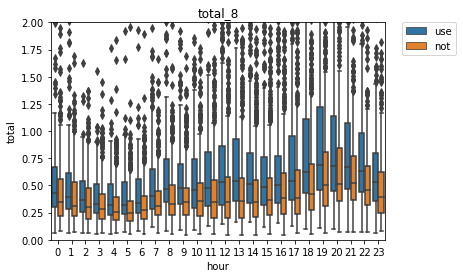

In [72]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_8')
plt.show()

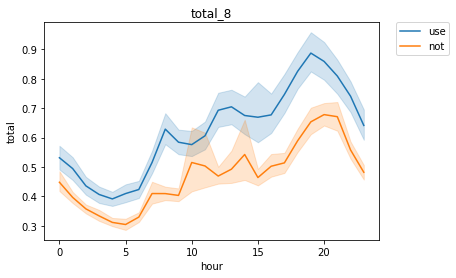

In [73]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_8')
plt.show()

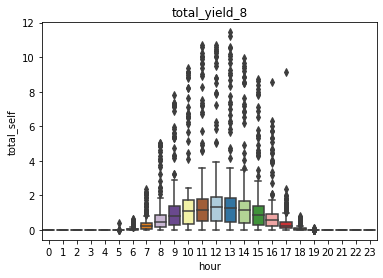

In [74]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_8, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_8')
plt.show()

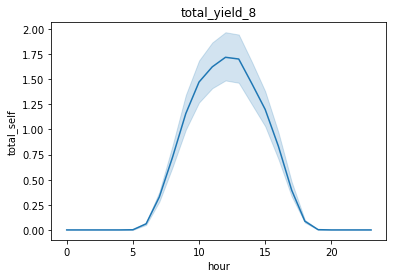

In [75]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_8)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_8')
plt.show()

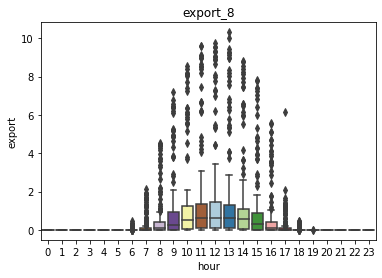

In [76]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_8, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_8')
plt.show()

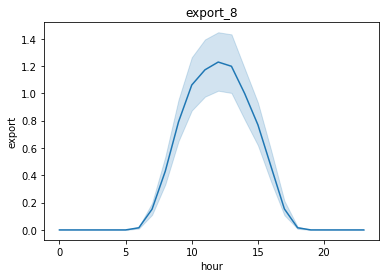

In [77]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_8)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_8')
plt.show()

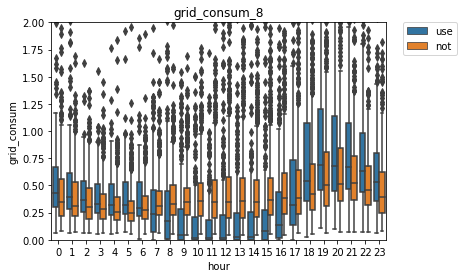

In [78]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_8')
plt.show()

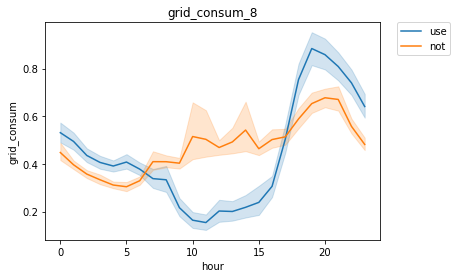

In [79]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_8')
plt.show()

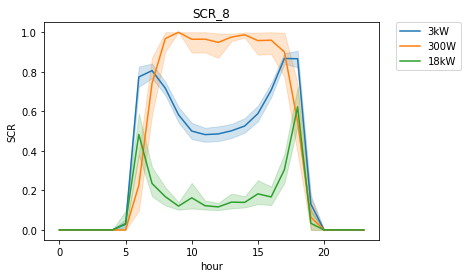

In [80]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_8')
plt.show()

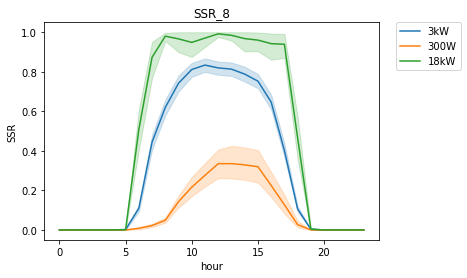

In [81]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_8')
plt.show()

<hr>

### 2021.09

In [82]:
df_all_hour_21_9 = df_all_hour[df_all_hour.ym == '2021/9']

In [83]:
# 총 전력 소비량
df_all_hour_21_9.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   719.0  0.395130  0.558333  0.080017  0.199951  0.299927  0.439941   
     1   724.0  0.335583  0.263313  0.059998  0.180054  0.270020  0.380127   
     2   726.0  0.306875  0.202579  0.059998  0.170044  0.250000  0.359985   
     3   727.0  0.293346  0.186295  0.049988  0.170044  0.250000  0.339966   
     4   725.0  0.283626  0.212862  0.040039  0.169983  0.239990  0.330078   
     5   730.0  0.274839  0.168676  0.049927  0.169922  0.229980  0.330078   
     6   719.0  0.313290  0.222200  0.059998  0.180054  0.270020  0.369873   
     7   718.0  0.393887  0.355675  0.049988  0.230103  0.319946  0.440048   
     8   720.0  0.398001  0.375624  0.049988  0.219971  0.329956  0.469971   
     9   718.0  0.374195  0.427328  0.050049  0.209961  0.319946  0.437500   
     10  712.0  0.354057  0.259582  0.039917  0.190063  0.290039  0.429932   
     11  716.0  0.356692  0.342736  0.039917  0.179932  0.280029  0.409912   
     12  713.0  0.382988  0.298003  0.039917  0.179932  0.299927  0.489990   
     13  714.0  0.365910  0.326113  0.040039  0.179993  0.290039  0.440063   
     14  713.0  0.434175  1.406315  0.049927  0.190063  0.300049  0.459961   
     15  709.0  0.392432  0.385990  0.059998  0.190186  0.310059  0.440002   
     16  711.0  0.390759  0.285105  0.059998  0.200073  0.320068  0.470032   
     17  712.0  0.432596  0.581839  0.049927  0.200073  0.345032  0.500000   
     18  712.0  0.480188  0.380933  0.059998  0.239990  0.385010  0.592560   
     19  711.0  0.572360  0.541410  0.069946  0.300049  0.449951  0.669922   
     20  714.0  0.524945  0.334174  0.070007  0.329956  0.449951  0.627441   
     21  718.0  0.525040  0.346116  0.080017  0.330032  0.430054  0.600098   
     22  718.0  0.494484  0.439284  0.049988  0.290039  0.390015  0.550049   
     23  716.0  0.411637  0.357924  0.079956  0.229980  0.329956  0.489990   
use  0   295.0  0.454373  0.277266  0.059998  0.260010  0.380005  0.605042   
     1   296.0  0.408834  0.268454  0.049988  0.239990  0.330078  0.530029   
     2   297.0  0.374594  0.219355  0.059998  0.229980  0.309937  0.500000   
     3   292.0  0.352787  0.237750  0.049988  0.219971  0.290039  0.459961   
     4   295.0  0.336717  0.195413  0.059998  0.210083  0.280029  0.440002   
     5   293.0  0.342830  0.193045  0.049988  0.219971  0.280029  0.459961   
     6   294.0  0.414515  0.354100  0.080292  0.230057  0.310059  0.500000   
     7   296.0  0.498513  0.384611  0.109344  0.280029  0.394958  0.592548   
     8   293.0  0.539636  0.296940  0.110809  0.309937  0.469727  0.690186   
     9   295.0  0.491224  0.303342  0.119995  0.270203  0.399902  0.619995   
     10  293.0  0.479679  0.280522  0.119995  0.260010  0.390137  0.649780   
     11  294.0  0.464453  0.308098  0.119141  0.260010  0.364990  0.610031   
     12  293.0  0.537506  0.412623  0.119873  0.270142  0.440063  0.660034   
     13  293.0  0.506223  0.284782  0.129883  0.269897  0.469971  0.649658   
     14  296.0  0.496899  0.371534  0.130127  0.269897  0.409973  0.599834   
     15  297.0  0.466863  0.297635  0.130066  0.269897  0.398438  0.579956   
     16  297.0  0.467857  0.292972  0.090027  0.259949  0.390625  0.589966   
     17  294.0  0.557699  0.715684  0.089050  0.260010  0.449890  0.669968   
     18  293.0  0.591047  0.378931  0.100006  0.320007  0.509888  0.729980   
     19  292.0  0.652995  0.393011  0.089996  0.357498  0.579956  0.889923   
     20  291.0  0.632573  0.387229  0.100006  0.369995  0.560059  0.800049   
     21  293.0  0.640101  0.406125  0.070007  0.359985  0.579956  0.820068   
     22  295.0  0.606542  0.367989  0.059998  0.359985  0.549927  0.839966   
     23  296.0  0.528586  0.324110  0.059998  0.280029  0.494995  0.719971   

               max  
type 시간             
not  0   12.570068  
     1    3.030029  
     2    1.689941  
   

In [84]:
# 총 전력 생산량
df_all_hour_21_9_use = df_all_hour_21_9[df_all_hour_21_9.type == 'use']
df_all_hour_21_9_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   296.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   297.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   292.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   293.0  0.000034  0.000585  0.000000  0.000000  0.000000  0.000000   
6   294.0  0.021844  0.041482  0.000000  0.000000  0.010010  0.027466   
7   296.0  0.262965  0.341732  0.000000  0.060028  0.169922  0.300049   
8   293.0  0.723444  0.892358  0.000000  0.179932  0.489990  0.899902   
9   295.0  1.200650  1.408465  0.000000  0.330017  0.899902  1.530029   
10  293.0  1.538690  1.793706  0.009995  0.529785  1.230225  1.819824   
11  294.0  1.749217  2.043943  0.019897  0.582550  1.464966  2.080078   
12  293.0  1.719905  1.840972  0.020020  0.590088  1.429932  2.100586   
13  293.0  1.635603  1.787738  0.010010  0.540039  1.320068  2.049805   
14  296.0  1.483462  1.681052  0.000000  0.500000  1.159912  1.779846   
15  297.0  1.141248  1.392899  0.000000  0.339966  0.810059  1.400146   
16  297.0  0.681431  0.718834  0.000000  0.179932  0.479980  0.959961   
17  294.0  0.244818  0.752762  0.000000  0.059845  0.149963  0.289978   
18  293.0  0.010965  0.023665  0.000000  0.000000  0.000000  0.010742   
19  292.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  291.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  293.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  296.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.010010  
6    0.399414  
7    1.799805  
8    5.050781  
9    7.660156  
10   9.339844  
11  14.270508  
12  10.969727  
13  10.629883  
14   9.730469  
15   8.189453  
16   3.919922  
17  12.609985  
18   0.260010  
19   0.000000  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [85]:
# 총 전력 수출량
df_all_hour_21_9_use = df_all_hour_21_9[df_all_hour_21_9.type == 'use']
df_all_hour_21_9_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   296.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   292.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   293.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
6   294.0  0.003907  0.021380  0.0  0.000000  0.000000  0.000000   0.299805
7   296.0  0.110096  0.296990  0.0  0.000000  0.000000  0.050049   1.580078
8   293.0  0.434849  0.835918  0.0  0.000000  0.130005  0.459961   4.589844
9   295.0  0.857869  1.326070  0.0  0.030029  0.449951  1.065002   6.980469
10  293.0  1.165537  1.674304  0.0  0.119995  0.790039  1.369995   8.429688
11  294.0  1.374670  1.952635  0.0  0.170044  0.990234  1.640015  12.930664
12  293.0  1.300353  1.737927  0.0  0.109985  0.879883  1.660034   9.929688
13  293.0  1.225567  1.672757  0.0  0.130005  0.880005  1.589966   9.500000
14  296.0  1.093323  1.596740  0.0  0.117493  0.635010  1.395020   8.919922
15  297.0  0.806780  1.342876  0.0  0.020020  0.350098  0.959961   7.439453
16  297.0  0.400308  0.661409  0.0  0.000000  0.109985  0.559937   3.309570
17  294.0  0.080918  0.315570  0.0  0.000000  0.000000  0.050049   4.760010
18  293.0  0.001160  0.009882  0.0  0.000000  0.000000  0.000000   0.129883
19  292.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
20  291.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  293.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  296.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [86]:
# 총 그리드 소비량
df_all_hour_21_9.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   719.0  0.395130  0.558333  0.080017  0.199951  0.299927  0.439941   
     1   724.0  0.335583  0.263313  0.059998  0.180054  0.270020  0.380127   
     2   726.0  0.306875  0.202579  0.059998  0.170044  0.250000  0.359985   
     3   727.0  0.293346  0.186295  0.049988  0.170044  0.250000  0.339966   
     4   725.0  0.283626  0.212862  0.040039  0.169983  0.239990  0.330078   
     5   730.0  0.274839  0.168676  0.049927  0.169922  0.229980  0.330078   
     6   719.0  0.313290  0.222200  0.059998  0.180054  0.270020  0.369873   
     7   718.0  0.393887  0.355675  0.049988  0.230103  0.319946  0.440048   
     8   720.0  0.398001  0.375624  0.049988  0.219971  0.329956  0.469971   
     9   718.0  0.374195  0.427328  0.050049  0.209961  0.319946  0.437500   
     10  712.0  0.354057  0.259582  0.039917  0.190063  0.290039  0.429932   
     11  716.0  0.356692  0.342736  0.039917  0.179932  0.280029  0.409912   
     12  713.0  0.382988  0.298003  0.039917  0.179932  0.299927  0.489990   
     13  714.0  0.365910  0.326113  0.040039  0.179993  0.290039  0.440063   
     14  713.0  0.434175  1.406315  0.049927  0.190063  0.300049  0.459961   
     15  709.0  0.392432  0.385990  0.059998  0.190186  0.310059  0.440002   
     16  711.0  0.390759  0.285105  0.059998  0.200073  0.320068  0.470032   
     17  712.0  0.432596  0.581839  0.049927  0.200073  0.345032  0.500000   
     18  712.0  0.480188  0.380933  0.059998  0.239990  0.385010  0.592560   
     19  711.0  0.572360  0.541410  0.069946  0.300049  0.449951  0.669922   
     20  714.0  0.524945  0.334174  0.070007  0.329956  0.449951  0.627441   
     21  718.0  0.525040  0.346116  0.080017  0.330032  0.430054  0.600098   
     22  718.0  0.494484  0.439284  0.049988  0.290039  0.390015  0.550049   
     23  716.0  0.411637  0.357924  0.079956  0.229980  0.329956  0.489990   
use  0   295.0  0.454373  0.277266  0.059998  0.260010  0.380005  0.605042   
     1   296.0  0.408834  0.268454  0.049988  0.239990  0.330078  0.530029   
     2   297.0  0.374594  0.219355  0.059998  0.229980  0.309937  0.500000   
     3   292.0  0.352787  0.237750  0.049988  0.219971  0.290039  0.459961   
     4   295.0  0.336717  0.195413  0.059998  0.210083  0.280029  0.440002   
     5   293.0  0.342796  0.192963  0.049988  0.219971  0.280029  0.459961   
     6   294.0  0.396579  0.353213  0.029999  0.220032  0.299866  0.497498   
     7   296.0  0.345645  0.385327  0.000000  0.100029  0.239990  0.476135   
     8   293.0  0.251040  0.322161  0.000000  0.010010  0.110107  0.360107   
     9   295.0  0.148442  0.251384  0.000000  0.000000  0.010010  0.205017   
     10  293.0  0.106526  0.213256  0.000000  0.000000  0.010010  0.100098   
     11  294.0  0.089906  0.187898  0.000000  0.000000  0.000000  0.080078   
     12  293.0  0.117954  0.259545  0.000000  0.000000  0.000000  0.089966   
     13  293.0  0.096188  0.203223  0.000000  0.000000  0.010010  0.089844   
     14  296.0  0.106760  0.230729  0.000000  0.000000  0.010010  0.102539   
     15  297.0  0.132395  0.248955  0.000000  0.000000  0.030029  0.159912   
     16  297.0  0.186734  0.247817  0.000000  0.000000  0.079956  0.260010   
     17  294.0  0.393799  0.387993  0.000000  0.120003  0.290039  0.569946   
     18  293.0  0.581249  0.379894  0.070007  0.309937  0.489990  0.729980   
     19  292.0  0.653002  0.393007  0.089996  0.357498  0.579956  0.889923   
     20  291.0  0.632580  0.387226  0.100006  0.369995  0.560059  0.800049   
     21  293.0  0.640108  0.406121  0.070007  0.359985  0.579956  0.820068   
     22  295.0  0.606550  0.367986  0.059998  0.359985  0.549927  0.839966   
     23  296.0  0.528592  0.324109  0.059998  0.280029  0.494995  0.719971   

               max  
type 시간             
not  0   12.570068  
     1    3.030029  
     2    1.689941  
   

In [87]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.565431  0.346458  0.000000  0.414298  0.512195   
         7    30.0  0.247231  0.190898  0.100671  0.131681  0.185585   
         8    30.0  0.144139  0.165085  0.068566  0.091353  0.101920   
         9    30.0  0.113052  0.047674  0.064117  0.085854  0.094560   
         10   29.0  0.116297  0.057171  0.065356  0.096516  0.101569   
         11   30.0  0.088247  0.039161  0.039248  0.070790  0.078066   
         12   30.0  0.112319  0.045326  0.073351  0.090014  0.096087   
         13   30.0  0.120509  0.037372  0.072859  0.099929  0.110368   
         14   30.0  0.111485  0.046358  0.062025  0.087425  0.097151   
         15   30.0  0.094947  0.029857  0.047828  0.078264  0.089774   
         16   30.0  0.149923  0.101001  0.094146  0.119060  0.130417   
         17   30.0  0.296424  0.117376  0.000000  0.236751  0.300550   
         18   30.0  0.450396  0.474358  0.000000  0.000000  0.288548   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.666667  0.479463  0.000000  0.000000  1.000000   
         8    30.0  0.900000  0.305129  0.000000  1.000000  1.000000   
         9    30.0  0.966667  0.182574  0.000000  1.000000  1.000000   
         10   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   30.0  0.974556  0.044786  0.857158  0.953126  1.000000   
         12   29.0  0.958705  0.071476  0.736846  0.944442  1.000000   
         13   30.0  0.961162  0.065829  0.789475  0.941994  1.000000   
         14   30.0  0.953855  0.082963  0.750006  0.946434  1.000000   
         15   30.0  0.954503  0.182569  0.000000  1.000000  1.000000   
         16   30.0  0.959127  0.182609  0.000000  1.000000  1.000000   
         17   30.0  0.900000  0.305129  0.000000  1.000000  1.000000   
         18   30.0  0.166667  0.379049  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   232.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   233.0  0.004292  0.065512  0.000000  0.0

In [88]:
# SSR(자가공급률)
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.232480  0.187115  0.000000  0.090026  0.218221   
         7    30.0  0.888037  0.185900  0.226575  0.826077  1.000000   
         8    30.0  0.963761  0.167682  0.093213  1.000000  1.000000   
         9    30.0  0.998613  0.007600  0.958376  1.000000  1.000000   
         10   29.0  0.982896  0.070918  0.637344  1.000000  1.000000   
         11   30.0  0.993934  0.033228  0.818005  1.000000  1.000000   
         12   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   30.0  0.981492  0.101375  0.444746  1.000000  1.000000   
         17   30.0  0.839590  0.217321  0.000000  0.792497  0.902540   
         18   30.0  0.074302  0.102965  0.000000  0.000000  0.044173   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.021940  0.026282  0.000000  0.000000  0.018565   
         8    30.0  0.033692  0.023434  0.000000  0.017964  0.033257   
         9    30.0  0.123503  0.070007  0.000000  0.069563  0.126390   
         10   30.0  0.153754  0.117371  0.021762  0.062829  0.112265   
         11   30.0  0.319646  0.181266  0.068984  0.152093  0.333212   
         12   29.0  0.422918  0.251231  0.069778  0.209281  0.400171   
         13   30.0  0.450183  0.267430  0.071440  0.183395  0.438644   
         14   30.0  0.457361  0.251012  0.066677  0.256452  0.439880   
         15   30.0  0.348572  0.213056  0.000000  0.212749  0.337771   
         16   30.0  0.210819  0.186456  0.000000  0.083099  0.166664   
         17   30.0  0.101789  0.111051  0.000000  0.027486  0.054871   
         18   30.0  0.008987  0.023658  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   232.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   233.0  0.000053  0.000810  0.000000  0.0

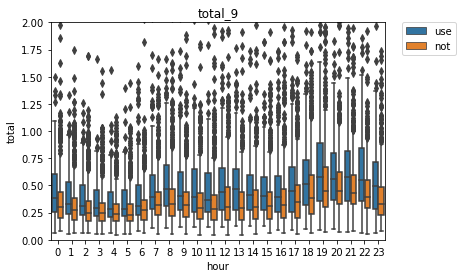

In [89]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_9')
plt.show()

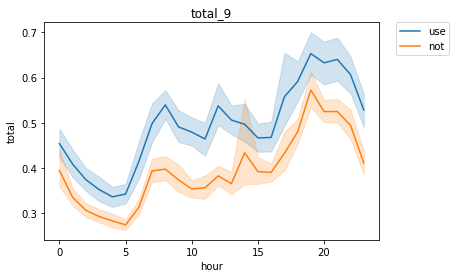

In [90]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_9')
plt.show()

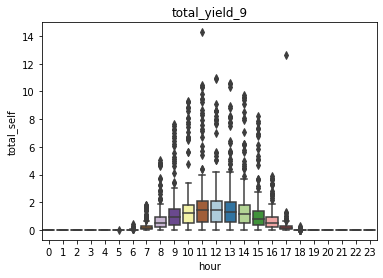

In [91]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_9, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_9')
plt.show()

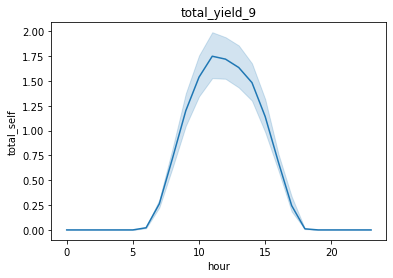

In [92]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_9)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_9')
plt.show()

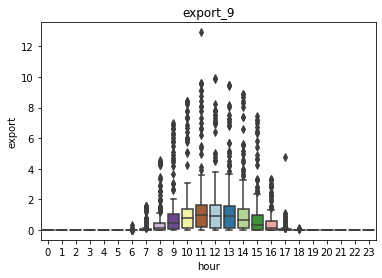

In [93]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_9, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_9')
plt.show()

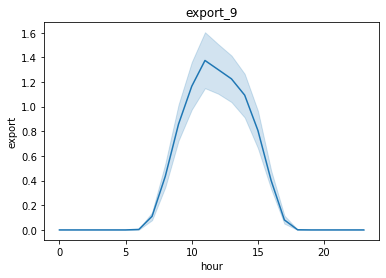

In [94]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_9)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_9')
plt.show()

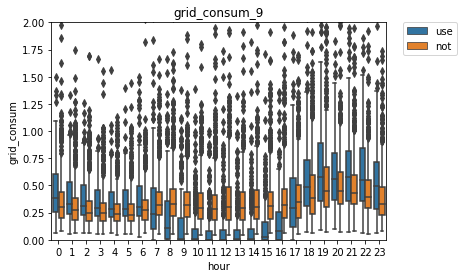

In [95]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_9')
plt.show()

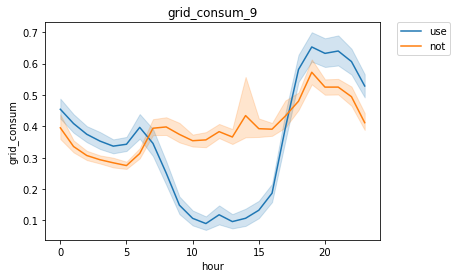

In [96]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_9')
plt.show()

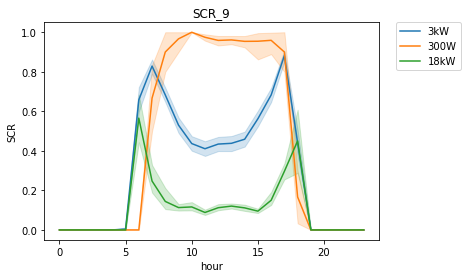

In [97]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_9')
plt.show()

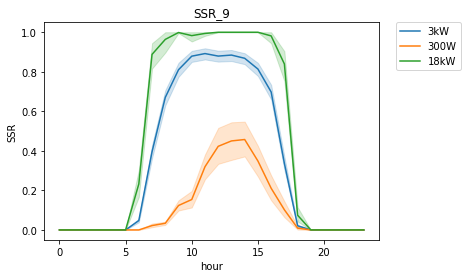

In [98]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_9')
plt.show()

<hr>

### 2021.10

In [99]:
df_all_hour_21_10 = df_all_hour[df_all_hour.ym == '2021/10']

In [100]:
# 총 전력 소비량
df_all_hour_21_10.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   723.0  0.348355  0.245854  0.029968  0.190063  0.280029  0.420044   
     1   724.0  0.325573  0.251771  0.049988  0.189941  0.264954  0.362488   
     2   723.0  0.297739  0.195884  0.040039  0.170044  0.260010  0.344971   
     3   726.0  0.296413  0.263738  0.039978  0.169922  0.239990  0.330078   
     4   718.0  0.281982  0.361342  0.030029  0.160034  0.229980  0.320068   
     5   721.0  0.287685  0.383386  0.039978  0.159912  0.229980  0.329956   
     6   727.0  0.308763  0.324596  0.029968  0.170044  0.250000  0.359985   
     7   724.0  0.388781  0.622641  0.039978  0.219971  0.310059  0.442627   
     8   734.0  0.339001  0.275944  0.039917  0.190063  0.299866  0.410034   
     9   724.0  0.313154  0.256185  0.029968  0.170029  0.270020  0.380127   
     10  730.0  0.312407  0.220125  0.039917  0.160034  0.250000  0.387451   
     11  718.0  0.320512  0.389260  0.030029  0.152588  0.250000  0.369995   
     12  723.0  0.317842  0.238658  0.029968  0.150146  0.260010  0.379944   
     13  726.0  0.349297  0.592237  0.039978  0.160034  0.260010  0.409912   
     14  719.0  0.321835  0.273677  0.039978  0.169922  0.260010  0.380005   
     15  717.0  0.330362  0.285931  0.039978  0.170044  0.270020  0.399902   
     16  717.0  0.363722  0.423139  0.039917  0.189941  0.290039  0.429932   
     17  717.0  0.384841  0.304632  0.029968  0.190186  0.319946  0.470215   
     18  718.0  0.476545  0.682143  0.039978  0.239990  0.379944  0.559937   
     19  714.0  0.499788  0.427131  0.029968  0.270020  0.400024  0.570068   
     20  716.0  0.480113  0.312026  0.059998  0.309937  0.419922  0.569977   
     21  718.0  0.487533  0.288788  0.039978  0.310059  0.430054  0.590088   
     22  720.0  0.436224  0.361931  0.039978  0.280029  0.369995  0.510010   
     23  716.0  0.380658  0.296407  0.050049  0.220016  0.319946  0.470123   
use  0   307.0  0.481301  0.310934  0.050018  0.240021  0.429932  0.649902   
     1   302.0  0.432645  0.268131  0.049988  0.229980  0.389954  0.573730   
     2   303.0  0.401011  0.300587  0.049988  0.209991  0.349976  0.540039   
     3   301.0  0.375847  0.237781  0.049988  0.209961  0.339966  0.500000   
     4   302.0  0.366375  0.261139  0.040009  0.209961  0.329956  0.479980   
     5   303.0  0.365905  0.224224  0.050018  0.209961  0.339966  0.480042   
     6   301.0  0.392424  0.232931  0.050018  0.220032  0.349976  0.520020   
     7   302.0  0.494649  0.416664  0.078796  0.269806  0.409912  0.580048   
     8   306.0  0.572257  0.338838  0.080078  0.322414  0.489929  0.739960   
     9   307.0  0.509795  0.337165  0.089844  0.269997  0.439911  0.640015   
     10  305.0  0.468774  0.298367  0.079956  0.239990  0.390137  0.610046   
     11  302.0  0.493433  0.366193  0.109863  0.240124  0.390015  0.679779   
     12  301.0  0.534968  0.358753  0.109985  0.269958  0.419922  0.740036   
     13  302.0  0.516999  0.334601  0.080078  0.269806  0.449890  0.679626   
     14  306.0  0.481914  0.331682  0.080200  0.249786  0.390198  0.590164   
     15  303.0  0.450268  0.298895  0.119873  0.250122  0.400024  0.564941   
     16  304.0  0.444151  0.290021  0.080078  0.230469  0.380005  0.559952   
     17  306.0  0.505902  0.371714  0.069275  0.240021  0.419800  0.667572   
     18  305.0  0.594798  0.362359  0.049988  0.330017  0.540039  0.760010   
     19  305.0  0.639818  0.405736  0.049988  0.340027  0.550049  0.830078   
     20  306.0  0.621784  0.403610  0.050018  0.319962  0.550049  0.767517   
     21  300.0  0.626401  0.415750  0.050018  0.320053  0.559875  0.862457   
     22  305.0  0.648212  0.545274  0.049988  0.310059  0.530029  0.820068   
     23  306.0  0.567693  0.405979  0.049988  0.262512  0.489990  0.762512   

               max  
type 시간             
not  0    2.340088  
     1    2.670166  
     2    1.969971  
   

In [101]:
# 총 전력 생산량
df_all_hour_21_10_use = df_all_hour_21_10[df_all_hour_21_10.type == 'use']
df_all_hour_21_10_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   307.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   302.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   303.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   301.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   302.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   303.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   301.0  0.002836  0.006778  0.000000  0.000000  0.000000  0.000000   
7   302.0  0.206123  0.275078  0.000000  0.060059  0.119873  0.237549   
8   306.0  0.788886  0.965104  0.000000  0.262451  0.550049  0.859863   
9   307.0  1.425616  1.675136  0.000000  0.494995  1.070068  1.550049   
10  305.0  1.859126  2.121013  0.009995  0.670166  1.500000  1.969971   
11  302.0  2.084796  2.355644  0.020004  0.812561  1.739990  2.187683   
12  301.0  2.137656  2.349818  0.009995  0.770020  1.819824  2.239990   
13  302.0  1.972061  2.216782  0.009995  0.710022  1.674927  2.110046   
14  306.0  1.686342  1.993576  0.000000  0.540039  1.344971  1.820068   
15  303.0  1.190819  1.455421  0.000000  0.309937  0.919922  1.380127   
16  304.0  0.453966  0.470982  0.000000  0.127441  0.305054  0.629883   
17  306.0  0.080018  0.283797  0.000000  0.010010  0.030014  0.069824   
18  305.0  0.000098  0.001280  0.000000  0.000000  0.000000  0.000000   
19  305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  306.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  300.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  306.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6    0.040039  
7    1.430664  
8    4.639648  
9    7.720703  
10   9.930664  
11  10.830078  
12  11.460938  
13  10.879883  
14  10.650146  
15   7.450195  
16   2.950195  
17   4.459961  
18   0.020020  
19   0.000000  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [102]:
# 총 전력 수출량
df_all_hour_21_10_use = df_all_hour_21_10[df_all_hour_21_10.type == 'use']
df_all_hour_21_10_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   307.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   302.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   301.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   302.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
6   301.0  0.000165  0.001526  0.0  0.000000  0.000000  0.000000   0.020508
7   302.0  0.088758  0.247732  0.0  0.000000  0.000000  0.020020   1.260742
8   306.0  0.488228  0.936165  0.0  0.000000  0.190033  0.440033   4.350586
9   307.0  1.061099  1.587696  0.0  0.095032  0.670044  1.149963   7.089844
10  305.0  1.482597  2.032539  0.0  0.220093  1.129883  1.629883   9.250000
11  302.0  1.693514  2.235080  0.0  0.400116  1.355011  1.770020  10.169922
12  301.0  1.693397  2.201873  0.0  0.290039  1.339966  1.829956  10.330078
13  302.0  1.555159  2.101684  0.0  0.269913  1.225037  1.667450  10.160156
14  306.0  1.314589  1.885240  0.0  0.142487  0.909973  1.410034   9.149902
15  303.0  0.866114  1.366492  0.0  0.030029  0.510010  1.000000   6.740234
16  304.0  0.251411  0.423854  0.0  0.000000  0.044983  0.359985   2.650391
17  306.0  0.031699  0.219035  0.0  0.000000  0.000000  0.000000   3.609985
18  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
19  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
20  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  300.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [103]:
# 총 그리드 소비량
df_all_hour_21_10.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   723.0  0.348355  0.245854  0.029968  0.190063  0.280029  0.420044   
     1   724.0  0.325573  0.251771  0.049988  0.189941  0.264954  0.362488   
     2   723.0  0.297739  0.195884  0.040039  0.170044  0.260010  0.344971   
     3   726.0  0.296413  0.263738  0.039978  0.169922  0.239990  0.330078   
     4   718.0  0.281982  0.361342  0.030029  0.160034  0.229980  0.320068   
     5   721.0  0.287685  0.383386  0.039978  0.159912  0.229980  0.329956   
     6   727.0  0.308763  0.324596  0.029968  0.170044  0.250000  0.359985   
     7   724.0  0.388781  0.622641  0.039978  0.219971  0.310059  0.442627   
     8   734.0  0.339001  0.275944  0.039917  0.190063  0.299866  0.410034   
     9   724.0  0.313154  0.256185  0.029968  0.170029  0.270020  0.380127   
     10  730.0  0.312407  0.220125  0.039917  0.160034  0.250000  0.387451   
     11  718.0  0.320512  0.389260  0.030029  0.152588  0.250000  0.369995   
     12  723.0  0.317842  0.238658  0.029968  0.150146  0.260010  0.379944   
     13  726.0  0.349297  0.592237  0.039978  0.160034  0.260010  0.409912   
     14  719.0  0.321835  0.273677  0.039978  0.169922  0.260010  0.380005   
     15  717.0  0.330362  0.285931  0.039978  0.170044  0.270020  0.399902   
     16  717.0  0.363722  0.423139  0.039917  0.189941  0.290039  0.429932   
     17  717.0  0.384841  0.304632  0.029968  0.190186  0.319946  0.470215   
     18  718.0  0.476545  0.682143  0.039978  0.239990  0.379944  0.559937   
     19  714.0  0.499788  0.427131  0.029968  0.270020  0.400024  0.570068   
     20  716.0  0.480113  0.312026  0.059998  0.309937  0.419922  0.569977   
     21  718.0  0.487533  0.288788  0.039978  0.310059  0.430054  0.590088   
     22  720.0  0.436224  0.361931  0.039978  0.280029  0.369995  0.510010   
     23  716.0  0.380658  0.296407  0.050049  0.220016  0.319946  0.470123   
use  0   307.0  0.481301  0.310934  0.050018  0.240021  0.429932  0.649902   
     1   302.0  0.432645  0.268131  0.049988  0.229980  0.389954  0.573730   
     2   303.0  0.401011  0.300587  0.049988  0.209991  0.349976  0.540039   
     3   301.0  0.375847  0.237781  0.049988  0.209961  0.339966  0.500000   
     4   302.0  0.366375  0.261139  0.040009  0.209961  0.329956  0.479980   
     5   303.0  0.365905  0.224224  0.050018  0.209961  0.339966  0.480042   
     6   301.0  0.389754  0.233159  0.050018  0.219971  0.349976  0.519775   
     7   302.0  0.377284  0.419379  0.000000  0.160034  0.274963  0.479980   
     8   306.0  0.271599  0.341768  0.000000  0.010010  0.140015  0.427460   
     9   307.0  0.145277  0.299007  0.000000  0.000000  0.010010  0.169922   
     10  305.0  0.092245  0.211820  0.000000  0.000000  0.000000  0.070068   
     11  302.0  0.102151  0.292958  0.000000  0.000000  0.000000  0.050018   
     12  301.0  0.090709  0.213697  0.000000  0.000000  0.000000  0.050049   
     13  302.0  0.100097  0.228174  0.000000  0.000000  0.000000  0.080078   
     14  306.0  0.110160  0.269083  0.000000  0.000000  0.000000  0.069916   
     15  303.0  0.125563  0.236145  0.000000  0.000000  0.010010  0.170044   
     16  304.0  0.241596  0.293467  0.000000  0.029907  0.144958  0.362457   
     17  306.0  0.457583  0.374259  0.010010  0.190018  0.365051  0.617493   
     18  305.0  0.594699  0.362246  0.049988  0.330017  0.540039  0.760010   
     19  305.0  0.639818  0.405736  0.049988  0.340027  0.550049  0.830078   
     20  306.0  0.621784  0.403610  0.050018  0.319962  0.550049  0.767517   
     21  300.0  0.626401  0.415750  0.050018  0.320053  0.559875  0.862457   
     22  305.0  0.648212  0.545274  0.049988  0.310059  0.530029  0.820068   
     23  306.0  0.567693  0.405979  0.049988  0.262512  0.489990  0.762512   

               max  
type 시간             
not  0    2.340088  
     1    2.670166  
     2    1.969971  
   

In [104]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.384559  0.472020  0.000000  0.000000  0.000000   
         7    31.0  0.163374  0.080822  0.082966  0.113824  0.149231   
         8    31.0  0.096836  0.055761  0.056933  0.067953  0.087278   
         9    31.0  0.098246  0.042803  0.036874  0.085449  0.093730   
         10   31.0  0.079023  0.028233  0.042635  0.065285  0.071002   
         11   31.0  0.086050  0.033743  0.051621  0.078302  0.081979   
         12   31.0  0.096167  0.020295  0.070641  0.084397  0.094704   
         13   31.0  0.091587  0.032463  0.054996  0.071493  0.082120   
         14   31.0  0.092050  0.039778  0.040873  0.074506  0.087024   
         15   31.0  0.114983  0.061560  0.070516  0.090408  0.098619   
         16   31.0  0.136543  0.057442  0.000000  0.103097  0.124206   
         17   31.0  0.476322  0.348834  0.000000  0.252607  0.299020   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.290323  0.461414  0.000000  0.000000  0.000000   
         8    31.0  0.870968  0.340777  0.000000  1.000000  1.000000   
         9    31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  0.967681  0.069716  0.699996  0.974999  1.000000   
         13   31.0  0.977026  0.064568  0.714294  1.000000  1.000000   
         14   31.0  0.946793  0.184011  0.000000  1.000000  1.000000   
         15   31.0  0.926747  0.250051  0.000000  1.000000  1.000000   
         16   31.0  0.834677  0.372753  0.000000  1.000000  1.000000   
         17   31.0  0.193548  0.401610  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   241.0  0.000000  0.000000  0.000000  0.0

In [105]:
# SSR(자가공급률)
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.056186  0.077148  0.000000  0.000000  0.000000   
         7    31.0  0.897365  0.205932  0.111541  0.904358  1.000000   
         8    31.0  0.994129  0.032687  0.818005  1.000000  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   31.0  0.998215  0.009938  0.944669  1.000000  1.000000   
         16   31.0  0.953129  0.181837  0.000000  1.000000  1.000000   
         17   31.0  0.322248  0.270464  0.000000  0.100086  0.222373   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.006471  0.010854  0.000000  0.000000  0.000000   
         8    31.0  0.026101  0.021239  0.000000  0.011395  0.022719   
         9    31.0  0.083398  0.055420  0.000000  0.036039  0.071403   
         10   31.0  0.123513  0.075223  0.020839  0.057179  0.117658   
         11   31.0  0.182858  0.112100  0.024590  0.080127  0.178593   
         12   31.0  0.378488  0.253835  0.013877  0.219183  0.315778   
         13   31.0  0.346815  0.257423  0.028177  0.139602  0.318299   
         14   31.0  0.282770  0.244988  0.000000  0.107837  0.165145   
         15   31.0  0.249144  0.198389  0.000000  0.132858  0.258663   
         16   31.0  0.136609  0.147057  0.000000  0.043037  0.079944   
         17   31.0  0.010235  0.023318  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   241.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   240.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   241.0  0.000000  0.000000  0.000000  0.0

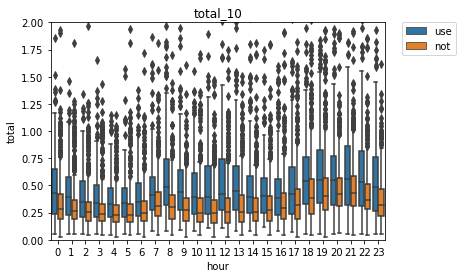

In [106]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_10')
plt.show()

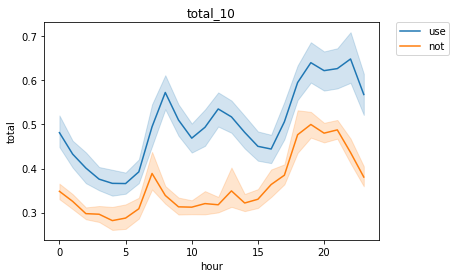

In [107]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_10')
plt.show()

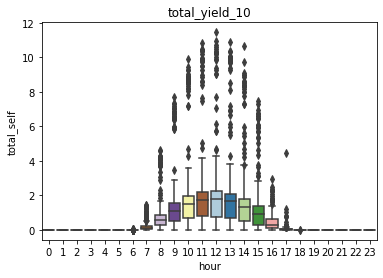

In [108]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_10, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_10')
plt.show()

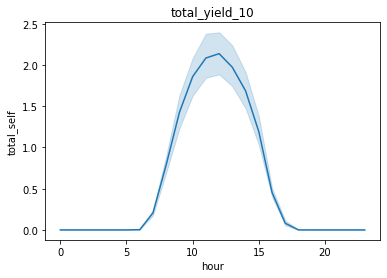

In [109]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_10)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_10')
plt.show()

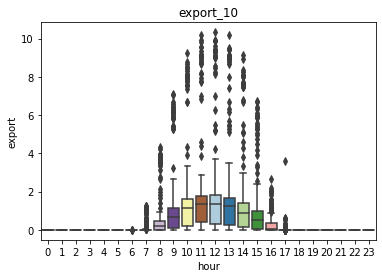

In [110]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_10, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_10')
plt.show()

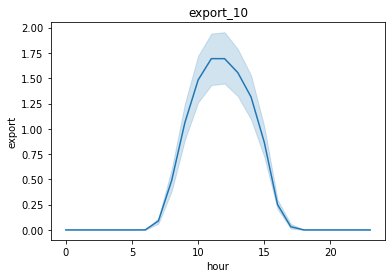

In [111]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_10)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_10')
plt.show()

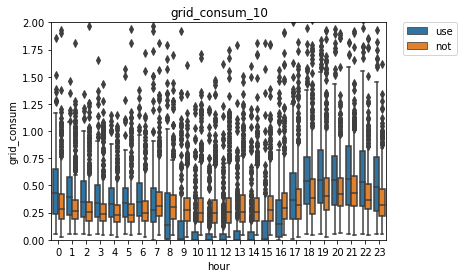

In [112]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_10')
plt.show()

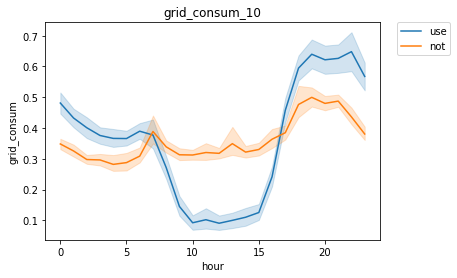

In [113]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_10')
plt.show()

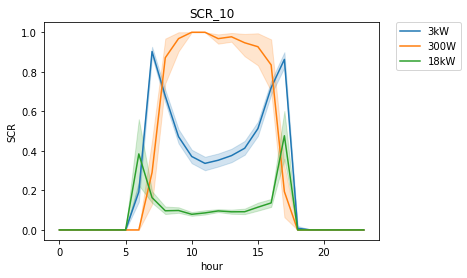

In [114]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_10')
plt.show()

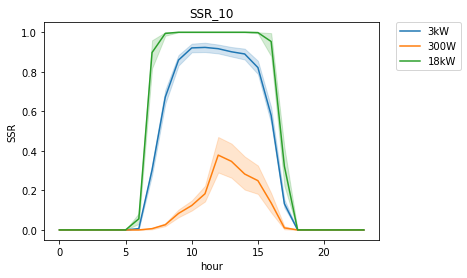

In [115]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_10')
plt.show()

<hr>

### 2021.11

In [116]:
df_all_hour_21_11 = df_all_hour[df_all_hour.ym == '2021/11']

In [117]:
# 총 전력 소비량
df_all_hour_21_11.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   728.0  0.360823  0.207287  0.049988  0.219971  0.319824  0.449951   
     1   729.0  0.337115  0.195222  0.039978  0.200012  0.299927  0.410034   
     2   725.0  0.318924  0.178782  0.030029  0.199951  0.280029  0.389893   
     3   724.0  0.306684  0.180047  0.049988  0.189941  0.264771  0.379913   
     4   726.0  0.299987  0.177572  0.039978  0.180054  0.260010  0.379883   
     5   721.0  0.298486  0.187959  0.030029  0.170166  0.250000  0.370117   
     6   719.0  0.322779  0.192813  0.029968  0.190186  0.270020  0.400024   
     7   718.0  0.385535  0.279317  0.020020  0.229980  0.340088  0.469971   
     8   724.0  0.380768  0.501672  0.019958  0.210175  0.320068  0.439941   
     9   720.0  0.330736  0.229166  0.019958  0.190063  0.290039  0.399902   
     10  722.0  0.323170  0.444701  0.029968  0.180084  0.279785  0.380066   
     11  717.0  0.309746  0.214698  0.030029  0.169922  0.260010  0.369873   
     12  719.0  0.341392  0.306200  0.020020  0.170105  0.260254  0.400146   
     13  718.0  0.396683  1.487877  0.020020  0.170044  0.270020  0.390137   
     14  720.0  0.324542  0.297172  0.019958  0.170105  0.260010  0.379883   
     15  724.0  0.355480  0.682070  0.019958  0.179932  0.279785  0.390015   
     16  723.0  0.352684  0.311665  0.020020  0.190125  0.290039  0.415039   
     17  727.0  0.426004  0.375030  0.029968  0.229980  0.350098  0.495117   
     18  721.0  0.503745  0.437910  0.030029  0.270020  0.409912  0.589966   
     19  725.0  0.526136  0.466181  0.019958  0.300049  0.419922  0.569824   
     20  713.0  0.499120  0.292744  0.049927  0.329834  0.439941  0.580078   
     21  725.0  0.504763  0.367315  0.039978  0.339966  0.430176  0.590088   
     22  726.0  0.465377  0.492056  0.020020  0.300049  0.399902  0.550049   
     23  726.0  0.403377  0.223328  0.030029  0.242584  0.359985  0.507507   
use  0   294.0  0.530812  0.311660  0.059998  0.302551  0.510010  0.707458   
     1   295.0  0.472240  0.286647  0.059998  0.270020  0.440186  0.625000   
     2   297.0  0.424377  0.238041  0.059998  0.250000  0.409912  0.564941   
     3   295.0  0.400878  0.204610  0.059998  0.260010  0.389893  0.540039   
     4   295.0  0.409524  0.224084  0.059998  0.250000  0.390015  0.539917   
     5   296.0  0.410405  0.232050  0.059998  0.250000  0.404968  0.530029   
     6   295.0  0.471979  0.346153  0.069977  0.250000  0.410034  0.580017   
     7   292.0  0.553132  0.448809  0.080261  0.317474  0.475037  0.662506   
     8   292.0  0.601749  0.352009  0.120117  0.330383  0.539856  0.752563   
     9   298.0  0.509572  0.309080  0.109863  0.269829  0.459961  0.680145   
     10  299.0  0.476972  0.307129  0.079834  0.220032  0.440063  0.640259   
     11  295.0  0.501223  0.360008  0.079956  0.219810  0.449951  0.680054   
     12  293.0  0.501192  0.324386  0.109344  0.220072  0.440063  0.679901   
     13  295.0  0.500492  0.336095  0.090088  0.254883  0.450073  0.649902   
     14  295.0  0.471741  0.265857  0.100098  0.244995  0.440186  0.629395   
     15  296.0  0.444823  0.266213  0.089966  0.230164  0.390625  0.579987   
     16  299.0  0.482046  0.603680  0.070557  0.209953  0.400024  0.594971   
     17  296.0  0.572147  0.392555  0.070007  0.300018  0.500000  0.739990   
     18  294.0  0.721704  0.433105  0.070007  0.439941  0.669922  0.897430   
     19  295.0  0.740667  0.460656  0.089996  0.410034  0.650024  0.934937   
     20  297.0  0.709884  0.503678  0.089996  0.409912  0.609985  0.919922   
     21  295.0  0.696253  0.411125  0.079987  0.394958  0.629883  0.969971   
     22  295.0  0.662791  0.390850  0.059998  0.355042  0.629883  0.895081   
     23  293.0  0.607603  0.383845  0.059998  0.329956  0.560059  0.794922   

               max  
type 시간             
not  0    1.609863  
     1    1.149902  
     2    1.179932  
   

In [118]:
# 총 전력 생산량
df_all_hour_21_11_use = df_all_hour_21_11[df_all_hour_21_11.type == 'use']
df_all_hour_21_11_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   294.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   297.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   296.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   292.0  0.074674  0.125920  0.000000  0.010010  0.040039  0.080078   
8   292.0  0.564790  0.738332  0.000000  0.140137  0.370117  0.580078   
9   298.0  1.224140  1.381588  0.000000  0.372620  0.950073  1.419922   
10  299.0  1.684810  1.883096  0.000000  0.615112  1.399902  1.809937   
11  295.0  1.942517  2.228144  0.020004  0.709961  1.610107  2.024902   
12  293.0  1.967245  2.230713  0.010010  0.690186  1.689941  2.080078   
13  295.0  1.805101  2.113137  0.019989  0.530029  1.510010  1.939941   
14  295.0  1.430976  1.725977  0.000000  0.364868  1.120117  1.559937   
15  296.0  0.834853  1.046154  0.000000  0.229980  0.600098  0.919922   
16  299.0  0.221278  0.462795  0.000000  0.060059  0.120117  0.300049   
17  296.0  0.003329  0.007121  0.000000  0.000000  0.000000  0.000000   
18  294.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19  295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  297.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  295.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  293.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6    0.000000  
7    0.740234  
8    3.410156  
9    6.389648  
10   8.339844  
11   9.530273  
12  10.009766  
13   9.370117  
14   8.109375  
15   5.479492  
16   7.390137  
17   0.050049  
18   0.000000  
19   0.000000  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [119]:
# 총 전력 수출량
df_all_hour_21_11_use = df_all_hour_21_11[df_all_hour_21_11.type == 'use']
df_all_hour_21_11_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%       max
시간                                                                        
0   294.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
1   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
2   297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
3   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
4   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
5   296.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
6   295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
7   292.0  0.030268  0.107807  0.0  0.000000  0.000000  0.000000  0.640625
8   292.0  0.308383  0.701329  0.0  0.000000  0.059937  0.199951  3.160156
9   298.0  0.877118  1.305017  0.0  0.059937  0.550049  0.939941  5.759766
10  299.0  1.325547  1.789532  0.0  0.260010  0.979980  1.389893  7.809570
11  295.0  1.550412  2.078351  0.0  0.344971  1.170044  1.635010  8.790039
12  293.0  1.566561  2.114829  0.0  0.309937  1.140015  1.640015  9.260742
13  295.0  1.418745  2.007674  0.0  0.150024  1.010010  1.500000  8.629883
14  295.0  1.070844  1.616888  0.0  0.089905  0.660034  1.169922  7.410156
15  296.0  0.564965  0.994842  0.0  0.010010  0.220123  0.622589  4.929688
16  299.0  0.094110  0.217311  0.0  0.000000  0.000000  0.100098  2.790039
17  296.0  0.000066  0.000801  0.0  0.000000  0.000000  0.000000  0.009766
18  294.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
19  295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
20  297.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
21  295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
22  295.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
23  293.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000

In [120]:
# 총 그리드 소비량
df_all_hour_21_11.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   728.0  0.360823  0.207287  0.049988  0.219971  0.319824  0.449951   
     1   729.0  0.337115  0.195222  0.039978  0.200012  0.299927  0.410034   
     2   725.0  0.318924  0.178782  0.030029  0.199951  0.280029  0.389893   
     3   724.0  0.306684  0.180047  0.049988  0.189941  0.264771  0.379913   
     4   726.0  0.299987  0.177572  0.039978  0.180054  0.260010  0.379883   
     5   721.0  0.298486  0.187959  0.030029  0.170166  0.250000  0.370117   
     6   719.0  0.322779  0.192813  0.029968  0.190186  0.270020  0.400024   
     7   718.0  0.385535  0.279317  0.020020  0.229980  0.340088  0.469971   
     8   724.0  0.380768  0.501672  0.019958  0.210175  0.320068  0.439941   
     9   720.0  0.330736  0.229166  0.019958  0.190063  0.290039  0.399902   
     10  722.0  0.323170  0.444701  0.029968  0.180084  0.279785  0.380066   
     11  717.0  0.309746  0.214698  0.030029  0.169922  0.260010  0.369873   
     12  719.0  0.341392  0.306200  0.020020  0.170105  0.260254  0.400146   
     13  718.0  0.396683  1.487877  0.020020  0.170044  0.270020  0.390137   
     14  720.0  0.324542  0.297172  0.019958  0.170105  0.260010  0.379883   
     15  724.0  0.355480  0.682070  0.019958  0.179932  0.279785  0.390015   
     16  723.0  0.352684  0.311665  0.020020  0.190125  0.290039  0.415039   
     17  727.0  0.426004  0.375030  0.029968  0.229980  0.350098  0.495117   
     18  721.0  0.503745  0.437910  0.030029  0.270020  0.409912  0.589966   
     19  725.0  0.526136  0.466181  0.019958  0.300049  0.419922  0.569824   
     20  713.0  0.499120  0.292744  0.049927  0.329834  0.439941  0.580078   
     21  725.0  0.504763  0.367315  0.039978  0.339966  0.430176  0.590088   
     22  726.0  0.465377  0.492056  0.020020  0.300049  0.399902  0.550049   
     23  726.0  0.403377  0.223328  0.030029  0.242584  0.359985  0.507507   
use  0   294.0  0.530812  0.311660  0.059998  0.302551  0.510010  0.707458   
     1   295.0  0.472240  0.286647  0.059998  0.270020  0.440186  0.625000   
     2   297.0  0.424377  0.238041  0.059998  0.250000  0.409912  0.564941   
     3   295.0  0.400878  0.204610  0.059998  0.260010  0.389893  0.540039   
     4   295.0  0.409524  0.224084  0.059998  0.250000  0.390015  0.539917   
     5   296.0  0.410405  0.232050  0.059998  0.250000  0.404968  0.530029   
     6   295.0  0.471979  0.346153  0.069977  0.250000  0.410034  0.580017   
     7   292.0  0.508726  0.449399  0.020020  0.280029  0.440002  0.612457   
     8   292.0  0.345341  0.357920  0.000000  0.079926  0.239990  0.489990   
     9   298.0  0.162551  0.277526  0.000000  0.000000  0.010010  0.220062   
     10  299.0  0.117709  0.257757  0.000000  0.000000  0.000000  0.109985   
     11  295.0  0.109118  0.248861  0.000000  0.000000  0.000000  0.094971   
     12  293.0  0.100508  0.217652  0.000000  0.000000  0.000000  0.070068   
     13  295.0  0.114136  0.253283  0.000000  0.000000  0.000000  0.085022   
     14  295.0  0.111610  0.200683  0.000000  0.000000  0.010010  0.145020   
     15  296.0  0.174935  0.230565  0.000000  0.000000  0.070068  0.262451   
     16  299.0  0.354879  0.405918  0.000000  0.089966  0.270020  0.524963   
     17  296.0  0.568884  0.393608  0.069977  0.290009  0.500000  0.732483   
     18  294.0  0.721704  0.433105  0.070007  0.439941  0.669922  0.897430   
     19  295.0  0.740667  0.460656  0.089996  0.410034  0.650024  0.934937   
     20  297.0  0.709884  0.503678  0.089996  0.409912  0.609985  0.919922   
     21  295.0  0.696253  0.411125  0.079987  0.394958  0.629883  0.969971   
     22  295.0  0.662791  0.390850  0.059998  0.355042  0.629883  0.895081   
     23  293.0  0.607603  0.383845  0.059998  0.329956  0.560059  0.794922   

               max  
type 시간             
not  0    1.609863  
     1    1.149902  
     2    1.179932  
   

In [121]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.244033  0.221876  0.000000  0.141273  0.182910   
         8    30.0  0.103534  0.056276  0.000000  0.077903  0.089379   
         9    30.0  0.122824  0.167681  0.044960  0.077661  0.089191   
         10   30.0  0.128416  0.193399  0.059814  0.070044  0.077230   
         11   30.0  0.131592  0.153901  0.077672  0.083494  0.094561   
         12   30.0  0.107467  0.105282  0.059879  0.073991  0.083025   
         13   30.0  0.127761  0.189639  0.062877  0.074863  0.079528   
         14   30.0  0.137525  0.155242  0.066434  0.089003  0.095181   
         15   30.0  0.133289  0.111934  0.066715  0.081173  0.097976   
         16   30.0  0.252882  0.118027  0.121635  0.188223  0.211292   
         17   30.0  0.217460  0.409192  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    30.0  0.766667  0.430183  0.000000  1.000000  1.000000   
         9    30.0  0.933333  0.253708  0.000000  1.000000  1.000000   
         10   30.0  0.966667  0.182574  0.000000  1.000000  1.000000   
         11   30.0  0.991071  0.034062  0.857123  1.000000  1.000000   
         12   30.0  0.966903  0.077059  0.642854  1.000000  1.000000   
         13   30.0  0.961998  0.084363  0.588230  0.946427  1.000000   
         14   30.0  0.934897  0.193436  0.000000  1.000000  1.000000   
         15   30.0  0.949311  0.183789  0.000000  1.000000  1.000000   
         16   30.0  0.866667  0.345746  0.000000  1.000000  1.000000   
         17   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.000000  0.000000  0.000000  0.0

In [122]:
# SSR(자가공급률)
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.478086  0.225569  0.000000  0.286113  0.521408   
         8    30.0  0.964437  0.182561  0.000000  1.000000  1.000000   
         9    30.0  0.967685  0.176998  0.030540  1.000000  1.000000   
         10   30.0  0.963281  0.147074  0.274564  1.000000  1.000000   
         11   30.0  0.970213  0.120265  0.400244  1.000000  1.000000   
         12   30.0  0.977172  0.087095  0.634105  1.000000  1.000000   
         13   30.0  0.957267  0.179659  0.068244  1.000000  1.000000   
         14   30.0  0.967970  0.128112  0.369408  1.000000  1.000000   
         15   30.0  0.962300  0.138011  0.274564  1.000000  1.000000   
         16   30.0  0.897701  0.175346  0.363838  0.892885  0.970418   
         17   30.0  0.022607  0.047646  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    30.0  0.021735  0.020058  0.000000  0.006073  0.020454   
         9    30.0  0.088939  0.065304  0.000000  0.017064  0.098007   
         10   30.0  0.146160  0.109185  0.000000  0.049339  0.120203   
         11   30.0  0.262963  0.158642  0.020202  0.094691  0.314362   
         12   30.0  0.409384  0.263159  0.044122  0.202580  0.339353   
         13   30.0  0.374024  0.265060  0.023127  0.108982  0.367573   
         14   30.0  0.353129  0.259902  0.000000  0.154525  0.267175   
         15   30.0  0.238607  0.195728  0.000000  0.072759  0.183464   
         16   30.0  0.047418  0.038196  0.000000  0.017093  0.041968   
         17   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         18   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   234.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   237.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   235.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.000000  0.000000  0.000000  0.0

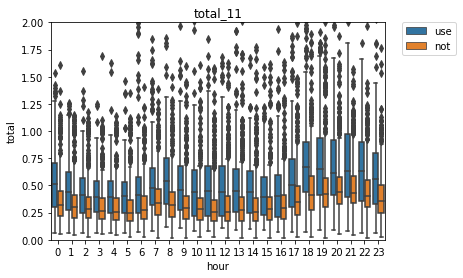

In [123]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_11')
plt.show()

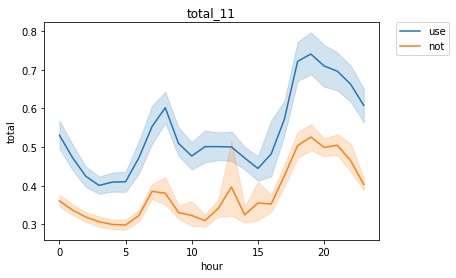

In [124]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_11')
plt.show()

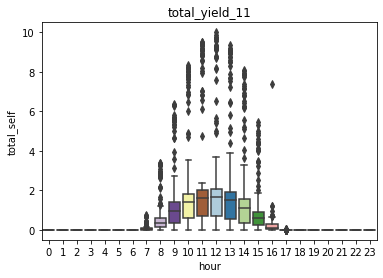

In [125]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_11, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_11')
plt.show()

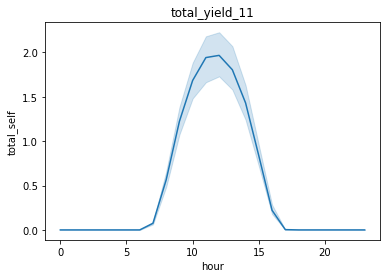

In [126]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_11)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_11')
plt.show()

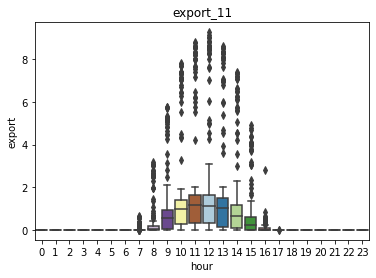

In [127]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_11, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_11')
plt.show()

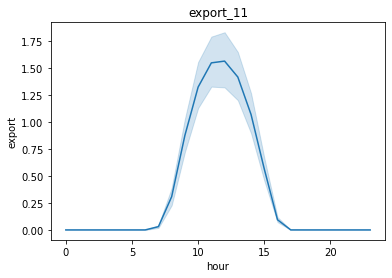

In [128]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_11)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_11')
plt.show()

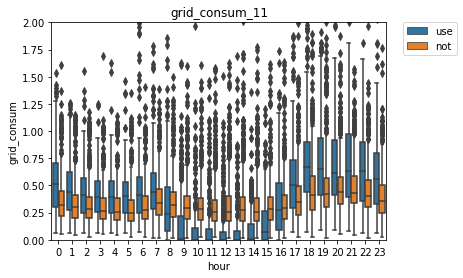

In [129]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_11')
plt.show()

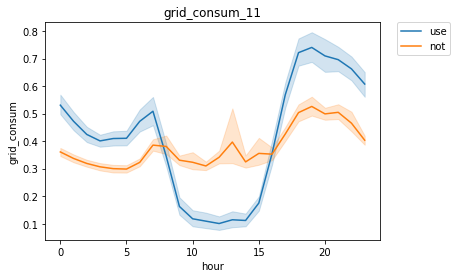

In [130]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_11')
plt.show()

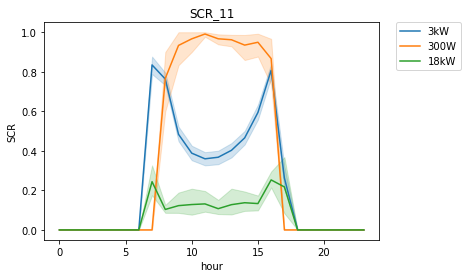

In [131]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_11')
plt.show()

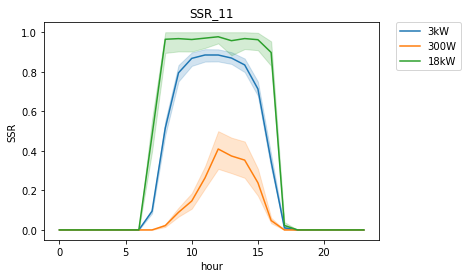

In [132]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_11')
plt.show()

<hr>

### 2021.12

In [133]:
df_all_hour_21_12 = df_all_hour[df_all_hour.ym == '2021/12']

In [134]:
# 총 전력 소비량
df_all_hour_21_12.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   742.0  0.399962  0.352619  0.019897  0.219971  0.349854  0.489990   
     1   742.0  0.362970  0.329766  0.019897  0.209961  0.329834  0.439941   
     2   745.0  0.347946  0.243076  0.040039  0.200195  0.300049  0.419922   
     3   742.0  0.329258  0.190914  0.020020  0.199951  0.290039  0.400330   
     4   744.0  0.325442  0.193653  0.020020  0.200073  0.290039  0.400146   
     5   740.0  0.339537  0.462997  0.049927  0.190002  0.279785  0.400024   
     6   744.0  0.352639  0.283539  0.020020  0.209961  0.299988  0.429932   
     7   739.0  0.402559  0.247796  0.010010  0.239990  0.350098  0.489990   
     8   742.0  0.382692  0.250705  0.019958  0.229980  0.320068  0.459961   
     9   743.0  0.368533  0.593280  0.030029  0.199951  0.300049  0.415039   
     10  743.0  0.353132  0.416695  0.010010  0.189941  0.280029  0.409912   
     11  745.0  0.352618  0.518798  0.020020  0.170166  0.269775  0.390137   
     12  742.0  0.339959  0.246706  0.020020  0.179932  0.279907  0.410156   
     13  737.0  0.464331  3.139120  0.019958  0.179932  0.280029  0.419922   
     14  744.0  0.349784  0.314435  0.019958  0.170044  0.280029  0.429932   
     15  745.0  0.381263  0.773260  0.020020  0.179932  0.290039  0.420166   
     16  749.0  0.435030  0.591566  0.019958  0.209961  0.329956  0.479980   
     17  743.0  0.472070  0.385908  0.029968  0.245117  0.379883  0.569946   
     18  736.0  0.544295  0.471638  0.020020  0.280029  0.429932  0.619873   
     19  744.0  0.559549  0.723974  0.030029  0.319946  0.440186  0.600098   
     20  736.0  0.529264  0.559350  0.020020  0.320068  0.459961  0.609863   
     21  730.0  0.531033  0.399785  0.049927  0.340088  0.469971  0.620117   
     22  740.0  0.501132  0.420835  0.020020  0.310028  0.439941  0.600006   
     23  743.0  0.428267  0.270366  0.020020  0.259888  0.389893  0.529968   
use  0   305.0  0.532841  0.310400  0.049988  0.319946  0.530029  0.729980   
     1   304.0  0.489865  0.427453  0.049988  0.280029  0.450012  0.659912   
     2   306.0  0.437957  0.239440  0.049988  0.262512  0.410034  0.609863   
     3   305.0  0.414387  0.213027  0.049988  0.260010  0.400146  0.560059   
     4   305.0  0.420107  0.222342  0.049988  0.259766  0.409912  0.570068   
     5   306.0  0.420078  0.248984  0.049988  0.250000  0.399902  0.550049   
     6   305.0  0.491225  0.368995  0.070007  0.250000  0.410156  0.589844   
     7   305.0  0.589248  0.697322  0.070007  0.270020  0.479980  0.699951   
     8   304.0  0.678036  0.442042  0.071472  0.340088  0.600159  0.879883   
     9   305.0  0.617870  0.473516  0.081055  0.300049  0.520020  0.820068   
     10  305.0  0.595718  0.784196  0.079834  0.289795  0.500000  0.689819   
     11  304.0  0.541475  0.348250  0.090088  0.249985  0.490112  0.710205   
     12  306.0  0.561190  0.409652  0.080078  0.272663  0.504944  0.710693   
     13  304.0  0.536797  0.338648  0.079834  0.269806  0.495056  0.699982   
     14  300.0  0.525872  0.336658  0.080078  0.269978  0.469971  0.672699   
     15  306.0  0.479390  0.320492  0.090088  0.250000  0.419922  0.619873   
     16  306.0  0.502775  0.385953  0.060547  0.239979  0.430107  0.650146   
     17  303.0  0.638094  0.415717  0.070007  0.340027  0.580078  0.860107   
     18  304.0  0.721532  0.420586  0.080017  0.452362  0.659912  1.019836   
     19  304.0  0.738129  0.452452  0.079987  0.420044  0.669922  1.019928   
     20  303.0  0.740731  0.472977  0.070007  0.409973  0.659912  1.045044   
     21  300.0  0.703164  0.428601  0.069977  0.390015  0.649963  0.889954   
     22  304.0  0.656493  0.373197  0.059998  0.367432  0.640015  0.879883   
     23  304.0  0.602968  0.352181  0.049988  0.339966  0.610046  0.800049   

               max  
type 시간             
not  0    5.169922  
     1    7.229980  
     2    3.040039  
   

In [135]:
# 총 전력 생산량
df_all_hour_21_12_use = df_all_hour_21_12[df_all_hour_21_12.type == 'use']
df_all_hour_21_12_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   306.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   306.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   305.0  0.008410  0.020948  0.000000  0.000000  0.000000  0.010010   
8   304.0  0.354216  0.535819  0.000000  0.059998  0.175049  0.360107   
9   305.0  1.032351  1.238219  0.000000  0.239990  0.699951  1.290039   
10  305.0  1.567472  1.806548  0.000000  0.519775  1.199951  1.780029   
11  304.0  1.950025  2.177832  0.009995  0.700134  1.630005  2.010010   
12  306.0  2.031314  2.274035  0.019989  0.689941  1.685059  2.130066   
13  304.0  1.841200  2.147567  0.000000  0.530029  1.524902  2.000000   
14  300.0  1.589951  2.083496  0.010010  0.380066  1.170044  1.692627   
15  306.0  0.967348  1.242934  0.000000  0.209961  0.659912  1.110107   
16  306.0  0.156144  0.173212  0.000000  0.032471  0.080078  0.217468   
17  303.0  0.008420  0.102173  0.000000  0.000000  0.000000  0.000000   
18  304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19  304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  303.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  300.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6    0.000000  
7    0.180664  
8    2.679688  
9    5.490234  
10   7.959961  
11   9.720703  
12  10.250000  
13  10.089844  
14  18.259766  
15   6.468750  
16   0.880127  
17   1.711426  
18   0.000000  
19   0.000000  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [136]:
# 총 전력 수출량
df_all_hour_21_12_use = df_all_hour_21_12[df_all_hour_21_12.type == 'use']
df_all_hour_21_12_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
6   305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
7   305.0  0.002561  0.015492  0.0  0.000000  0.000000  0.000000   0.150391
8   304.0  0.182070  0.496427  0.0  0.000000  0.000000  0.059814   2.429688
9   305.0  0.673106  1.207419  0.0  0.010010  0.239990  0.649902   5.229492
10  305.0  1.144487  1.713703  0.0  0.140137  0.729980  1.199951   7.429688
11  304.0  1.502196  2.068296  0.0  0.315063  1.079834  1.522491   9.019531
12  306.0  1.572150  2.191584  0.0  0.234985  1.140015  1.587433   9.509766
13  304.0  1.408645  2.039521  0.0  0.197479  0.945068  1.492493   9.229492
14  300.0  1.194880  1.984746  0.0  0.090027  0.625000  1.250000  16.799805
15  306.0  0.675375  1.181433  0.0  0.010010  0.239990  0.750000   5.970703
16  306.0  0.067255  0.128301  0.0  0.000000  0.000000  0.067383   0.650391
17  303.0  0.000529  0.009201  0.0  0.000000  0.000000  0.000000   0.160156
18  304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
19  304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
20  303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  300.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [137]:
# 총 그리드 소비량
df_all_hour_21_12.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   742.0  0.399962  0.352619  0.019897  0.219971  0.349854  0.489990   
     1   742.0  0.362970  0.329766  0.019897  0.209961  0.329834  0.439941   
     2   745.0  0.347946  0.243076  0.040039  0.200195  0.300049  0.419922   
     3   742.0  0.329258  0.190914  0.020020  0.199951  0.290039  0.400330   
     4   744.0  0.325442  0.193653  0.020020  0.200073  0.290039  0.400146   
     5   740.0  0.339537  0.462997  0.049927  0.190002  0.279785  0.400024   
     6   744.0  0.352639  0.283539  0.020020  0.209961  0.299988  0.429932   
     7   739.0  0.402559  0.247796  0.010010  0.239990  0.350098  0.489990   
     8   742.0  0.382692  0.250705  0.019958  0.229980  0.320068  0.459961   
     9   743.0  0.368533  0.593280  0.030029  0.199951  0.300049  0.415039   
     10  743.0  0.353132  0.416695  0.010010  0.189941  0.280029  0.409912   
     11  745.0  0.352618  0.518798  0.020020  0.170166  0.269775  0.390137   
     12  742.0  0.339959  0.246706  0.020020  0.179932  0.279907  0.410156   
     13  737.0  0.464331  3.139120  0.019958  0.179932  0.280029  0.419922   
     14  744.0  0.349784  0.314435  0.019958  0.170044  0.280029  0.429932   
     15  745.0  0.381263  0.773260  0.020020  0.179932  0.290039  0.420166   
     16  749.0  0.435030  0.591566  0.019958  0.209961  0.329956  0.479980   
     17  743.0  0.472070  0.385908  0.029968  0.245117  0.379883  0.569946   
     18  736.0  0.544295  0.471638  0.020020  0.280029  0.429932  0.619873   
     19  744.0  0.559549  0.723974  0.030029  0.319946  0.440186  0.600098   
     20  736.0  0.529264  0.559350  0.020020  0.320068  0.459961  0.609863   
     21  730.0  0.531033  0.399785  0.049927  0.340088  0.469971  0.620117   
     22  740.0  0.501132  0.420835  0.020020  0.310028  0.439941  0.600006   
     23  743.0  0.428267  0.270366  0.020020  0.259888  0.389893  0.529968   
use  0   305.0  0.532841  0.310400  0.049988  0.319946  0.530029  0.729980   
     1   304.0  0.489865  0.427453  0.049988  0.280029  0.450012  0.659912   
     2   306.0  0.437957  0.239440  0.049988  0.262512  0.410034  0.609863   
     3   305.0  0.414387  0.213027  0.049988  0.260010  0.400146  0.560059   
     4   305.0  0.420107  0.222342  0.049988  0.259766  0.409912  0.570068   
     5   306.0  0.420078  0.248984  0.049988  0.250000  0.399902  0.550049   
     6   305.0  0.491225  0.368995  0.070007  0.250000  0.410156  0.589844   
     7   305.0  0.583400  0.697260  0.059998  0.260010  0.469971  0.680176   
     8   304.0  0.505890  0.447590  0.000000  0.177307  0.415039  0.689941   
     9   305.0  0.258625  0.439840  0.000000  0.010010  0.099854  0.349854   
     10  305.0  0.172733  0.664776  0.000000  0.000000  0.010010  0.159912   
     11  304.0  0.093647  0.205078  0.000000  0.000000  0.000000  0.102356   
     12  306.0  0.102026  0.257755  0.000000  0.000000  0.000000  0.077393   
     13  304.0  0.104242  0.218575  0.000000  0.000000  0.000000  0.109863   
     14  300.0  0.130801  0.255485  0.000000  0.000000  0.020020  0.142639   
     15  306.0  0.187417  0.289804  0.000000  0.000000  0.090088  0.260010   
     16  306.0  0.413886  0.383915  0.000000  0.130035  0.344849  0.607422   
     17  303.0  0.630202  0.400406  0.070007  0.340027  0.570068  0.859863   
     18  304.0  0.721532  0.420586  0.080017  0.452362  0.659912  1.019836   
     19  304.0  0.738129  0.452452  0.079987  0.420044  0.669922  1.019928   
     20  303.0  0.740731  0.472977  0.070007  0.409973  0.659912  1.045044   
     21  300.0  0.703164  0.428601  0.069977  0.390015  0.649963  0.889954   
     22  304.0  0.656493  0.373197  0.059998  0.367432  0.640015  0.879883   
     23  304.0  0.602968  0.352181  0.049988  0.339966  0.610046  0.800049   

               max  
type 시간             
not  0    5.169922  
     1    7.229980  
     2    3.040039  
   

In [138]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.492010  0.383385  0.000000  0.167117  0.450000   
         8    31.0  0.142944  0.160519  0.074219  0.100407  0.113254   
         9    31.0  0.068771  0.035979  0.029958  0.049181  0.057965   
         10   31.0  0.084674  0.019371  0.053496  0.071628  0.083685   
         11   31.0  0.084112  0.014216  0.056876  0.074101  0.080618   
         12   31.0  0.075434  0.020754  0.051652  0.059978  0.073171   
         13   30.0  0.085946  0.016789  0.036973  0.076320  0.087941   
         14   31.0  0.080798  0.012992  0.054870  0.073999  0.079318   
         15   31.0  0.086354  0.014180  0.058339  0.076986  0.083063   
         16   31.0  0.249920  0.105089  0.121094  0.174606  0.218321   
         17   30.0  0.033333  0.182574  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    30.0  0.133333  0.345746  0.000000  0.000000  0.000000   
         9    30.0  0.733333  0.449776  0.000000  0.250000  1.000000   
         10   31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  0.979182  0.049910  0.785712  1.000000  1.000000   
         13   31.0  0.949010  0.183293  0.000000  1.000000  1.000000   
         14   31.0  0.968844  0.068716  0.764704  1.000000  1.000000   
         15   31.0  0.961290  0.181985  0.000000  1.000000  1.000000   
         16   31.0  0.612903  0.495138  0.000000  0.000000  1.000000   
         17   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   244.0  0.000000  0.000000  0.000000  0.0

In [139]:
# SSR(자가공급률)
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.115457  0.101300  0.000000  0.050309  0.088963   
         8    31.0  0.975910  0.125621  0.300598  1.000000  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   31.0  0.865604  0.133713  0.571678  0.803310  0.899756   
         17   30.0  0.002038  0.011160  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    30.0  0.002212  0.007279  0.000000  0.000000  0.000000   
         9    30.0  0.040582  0.041857  0.000000  0.003519  0.031282   
         10   31.0  0.091108  0.074540  0.000000  0.043493  0.071440   
         11   31.0  0.243399  0.123672  0.007996  0.144369  0.240049   
         12   31.0  0.411077  0.243931  0.060607  0.192546  0.382957   
         13   31.0  0.408794  0.261229  0.000000  0.150781  0.425018   
         14   31.0  0.355506  0.284814  0.040039  0.118072  0.196122   
         15   31.0  0.243287  0.185792  0.000000  0.105507  0.200000   
         16   31.0  0.023582  0.022076  0.000000  0.000000  0.027774   
         17   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   244.0  0.000000  0.000000  0.000000  0.0

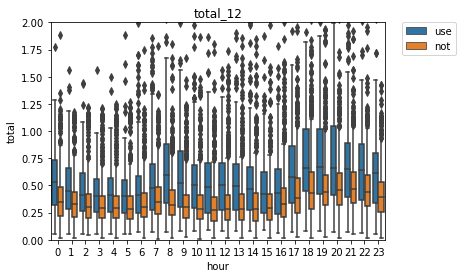

In [140]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_12')
plt.show()

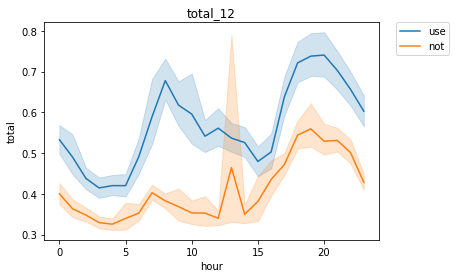

In [141]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_12')
plt.show()

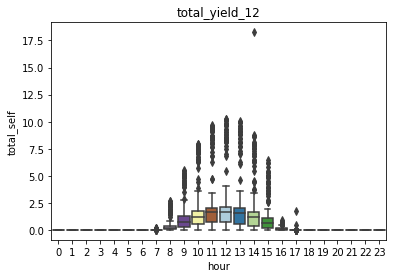

In [142]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_12, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_12')
plt.show()

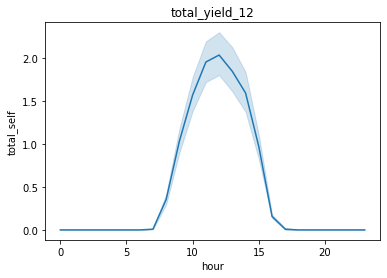

In [143]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_12)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_12')
plt.show()

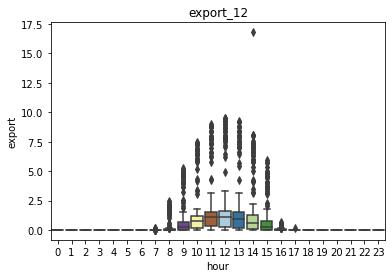

In [144]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_12, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_12')
plt.show()

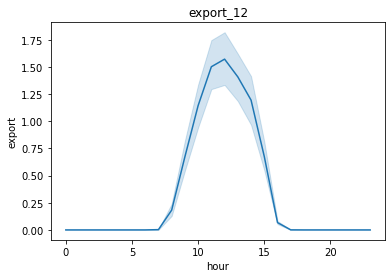

In [145]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_12)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_12')
plt.show()

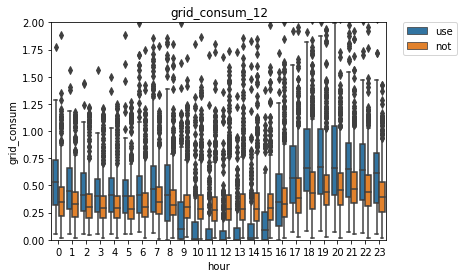

In [146]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_12')
plt.show()

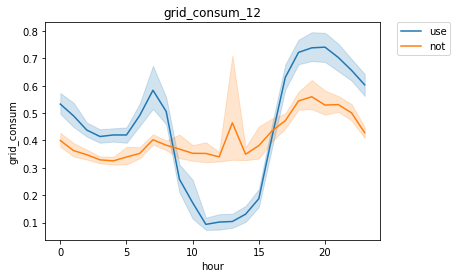

In [147]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_12')
plt.show()

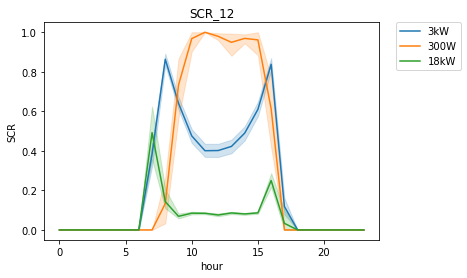

In [148]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_12')
plt.show()

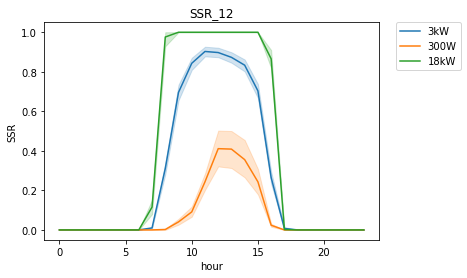

In [149]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_12')
plt.show()

<hr>

### 2022.01

In [150]:
df_all_hour_22_1 = df_all_hour[df_all_hour.ym == '2022/1']

In [151]:
# 총 전력 소비량
df_all_hour_22_1.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   756.0  0.414504  0.263971  0.069946  0.229980  0.359985  0.520020   
     1   755.0  0.376131  0.240441  0.059937  0.219971  0.329834  0.459961   
     2   755.0  0.354783  0.261279  0.059937  0.200073  0.300049  0.419922   
     3   756.0  0.333096  0.203809  0.030029  0.199951  0.290039  0.410156   
     4   752.0  0.325057  0.198975  0.050049  0.199951  0.280029  0.392578   
     5   747.0  0.317129  0.204661  0.040039  0.179932  0.279785  0.390015   
     6   753.0  0.354402  0.359412  0.039917  0.209961  0.290039  0.410156   
     7   753.0  0.418470  0.255300  0.029907  0.250000  0.360107  0.520020   
     8   752.0  0.406543  0.295291  0.020020  0.229980  0.339905  0.479980   
     9   750.0  0.402093  0.529109  0.020020  0.209961  0.310059  0.449951   
     10  753.0  0.408074  0.692066  0.010010  0.199951  0.309937  0.469971   
     11  751.0  0.367441  0.292423  0.020020  0.189941  0.299805  0.440063   
     12  751.0  0.398459  0.548162  0.010010  0.189941  0.290039  0.469971   
     13  750.0  0.376629  0.296780  0.010010  0.200195  0.300049  0.459961   
     14  747.0  0.400751  0.594561  0.019897  0.199951  0.300049  0.440063   
     15  749.0  0.374338  0.307956  0.020020  0.199951  0.310059  0.449951   
     16  750.0  0.427975  0.551558  0.040039  0.219971  0.339844  0.479980   
     17  754.0  0.488340  0.486566  0.020020  0.250000  0.390076  0.550049   
     18  742.0  0.547116  0.429033  0.019897  0.299927  0.449951  0.647461   
     19  747.0  0.566604  0.461502  0.059937  0.320068  0.459961  0.625000   
     20  749.0  0.550824  0.403554  0.099976  0.330078  0.470215  0.630127   
     21  745.0  0.557684  0.577201  0.060059  0.349976  0.470215  0.649902   
     22  753.0  0.511476  0.361081  0.060059  0.300049  0.449951  0.610107   
     23  753.0  0.462081  0.677499  0.079956  0.250000  0.389893  0.550049   
use  0   307.0  0.603613  0.312509  0.050049  0.399902  0.609863  0.805054   
     1   308.0  0.527895  0.246146  0.059998  0.359985  0.540039  0.699768   
     2   307.0  0.511203  0.252428  0.049988  0.350037  0.489990  0.659912   
     3   308.0  0.489431  0.245242  0.059998  0.337402  0.459961  0.639648   
     4   307.0  0.496108  0.364904  0.049988  0.334961  0.460205  0.625000   
     5   308.0  0.479278  0.265589  0.059998  0.309814  0.445190  0.620117   
     6   303.0  0.527288  0.304411  0.059998  0.320068  0.479980  0.705078   
     7   303.0  0.625294  0.408720  0.079773  0.359863  0.530029  0.839966   
     8   303.0  0.739619  0.426720  0.090302  0.430054  0.669922  1.004883   
     9   303.0  0.693769  0.447502  0.089844  0.340027  0.630127  0.924927   
     10  299.0  0.659446  0.446660  0.090088  0.340027  0.590088  0.850037   
     11  303.0  0.662122  0.551219  0.100098  0.329956  0.579102  0.840210   
     12  299.0  0.665079  0.438647  0.079834  0.334930  0.570068  0.899902   
     13  300.0  0.641022  0.407209  0.090088  0.327637  0.565308  0.844910   
     14  300.0  0.603898  0.352070  0.094727  0.369965  0.564941  0.792328   
     15  302.0  0.619788  0.395536  0.070068  0.342556  0.528198  0.827576   
     16  304.0  0.637783  0.824562  0.080078  0.300045  0.510132  0.820068   
     17  302.0  0.716223  0.496379  0.057556  0.400146  0.640137  0.959900   
     18  305.0  0.855104  0.518245  0.079987  0.530029  0.790039  1.140137   
     19  305.0  0.907200  0.744430  0.089966  0.510010  0.810059  1.199951   
     20  305.0  0.826434  0.518768  0.089966  0.530029  0.789795  1.089844   
     21  301.0  0.800656  0.389952  0.070007  0.559814  0.800049  1.050049   
     22  303.0  0.752373  0.360860  0.059998  0.539978  0.770020  0.979980   
     23  305.0  0.706150  0.478295  0.049988  0.469971  0.689941  0.880127   

               max  
type 시간             
not  0    2.029785  
     1    1.959961  
     2    4.349609  
   

In [152]:
# 총 전력 생산량
df_all_hour_22_1_use = df_all_hour_22_1[df_all_hour_22_1.type == 'use']
df_all_hour_22_1_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   307.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   308.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   307.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   308.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   307.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   308.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   303.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   303.0  0.002794  0.006922  0.000000  0.000000  0.000000  0.000000   
8   303.0  0.268467  0.400789  0.000000  0.060059  0.139893  0.275024   
9   303.0  0.970164  1.131267  0.000000  0.295044  0.699951  1.174927   
10  299.0  1.588431  1.775870  0.000000  0.604858  1.260010  1.739990   
11  303.0  2.027617  2.168506  0.009995  0.880127  1.779785  2.069946   
12  299.0  2.207600  2.379907  0.000000  0.985107  1.860107  2.199951   
13  300.0  2.183918  2.378537  0.010010  0.855103  1.820068  2.159912   
14  300.0  1.878765  2.141964  0.009995  0.599854  1.550049  1.892578   
15  302.0  1.328563  1.617945  0.009766  0.342529  1.005005  1.417480   
16  304.0  0.411529  0.625140  0.000000  0.080078  0.229980  0.544983   
17  302.0  0.019572  0.031582  0.000000  0.000000  0.010010  0.020020   
18  305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19  305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  301.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  303.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6    0.000000  
7    0.070312  
8    2.031250  
9    5.210938  
10   7.900391  
11   9.611328  
12  10.541016  
13  10.310547  
14   9.429688  
15   7.310547  
16   7.850098  
17   0.230469  
18   0.000000  
19   0.000000  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [153]:
# 총 전력 수출량
df_all_hour_22_1_use = df_all_hour_22_1[df_all_hour_22_1.type == 'use']
df_all_hour_22_1_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%       max
시간                                                                        
0   307.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
1   308.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
2   307.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
3   308.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
4   307.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
5   308.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
6   303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
7   303.0  0.000289  0.002311  0.0  0.000000  0.000000  0.000000  0.029297
8   303.0  0.125239  0.367688  0.0  0.000000  0.000000  0.020020  1.871094
9   303.0  0.577762  1.106484  0.0  0.019897  0.170044  0.529907  4.750000
10  299.0  1.100566  1.713154  0.0  0.159912  0.609863  1.114868  7.269531
11  303.0  1.501163  2.106522  0.0  0.310059  1.040039  1.510010  9.040039
12  299.0  1.652017  2.305690  0.0  0.370056  1.119873  1.635132  9.730469
13  300.0  1.639044  2.293130  0.0  0.335083  1.174927  1.582550  9.548828
14  300.0  1.380634  2.081292  0.0  0.187500  0.880005  1.329987  8.759766
15  302.0  0.905270  1.556213  0.0  0.030029  0.424927  0.889984  6.750000
16  304.0  0.210169  0.426032  0.0  0.000000  0.019958  0.202454  2.470703
17  302.0  0.003202  0.014498  0.0  0.000000  0.000000  0.000000  0.169922
18  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
19  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
20  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
21  301.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
22  303.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000
23  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000

In [154]:
# 총 그리드 소비량
df_all_hour_22_1.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   756.0  0.414504  0.263971  0.069946  0.229980  0.359985  0.520020   
     1   755.0  0.376131  0.240441  0.059937  0.219971  0.329834  0.459961   
     2   755.0  0.354783  0.261279  0.059937  0.200073  0.300049  0.419922   
     3   756.0  0.333096  0.203809  0.030029  0.199951  0.290039  0.410156   
     4   752.0  0.325057  0.198975  0.050049  0.199951  0.280029  0.392578   
     5   747.0  0.317129  0.204661  0.040039  0.179932  0.279785  0.390015   
     6   753.0  0.354402  0.359412  0.039917  0.209961  0.290039  0.410156   
     7   753.0  0.418470  0.255300  0.029907  0.250000  0.360107  0.520020   
     8   752.0  0.406543  0.295291  0.020020  0.229980  0.339905  0.479980   
     9   750.0  0.402093  0.529109  0.020020  0.209961  0.310059  0.449951   
     10  753.0  0.408074  0.692066  0.010010  0.199951  0.309937  0.469971   
     11  751.0  0.367441  0.292423  0.020020  0.189941  0.299805  0.440063   
     12  751.0  0.398459  0.548162  0.010010  0.189941  0.290039  0.469971   
     13  750.0  0.376629  0.296780  0.010010  0.200195  0.300049  0.459961   
     14  747.0  0.400751  0.594561  0.019897  0.199951  0.300049  0.440063   
     15  749.0  0.374338  0.307956  0.020020  0.199951  0.310059  0.449951   
     16  750.0  0.427975  0.551558  0.040039  0.219971  0.339844  0.479980   
     17  754.0  0.488340  0.486566  0.020020  0.250000  0.390076  0.550049   
     18  742.0  0.547116  0.429033  0.019897  0.299927  0.449951  0.647461   
     19  747.0  0.566604  0.461502  0.059937  0.320068  0.459961  0.625000   
     20  749.0  0.550824  0.403554  0.099976  0.330078  0.470215  0.630127   
     21  745.0  0.557684  0.577201  0.060059  0.349976  0.470215  0.649902   
     22  753.0  0.511476  0.361081  0.060059  0.300049  0.449951  0.610107   
     23  753.0  0.462081  0.677499  0.079956  0.250000  0.389893  0.550049   
use  0   307.0  0.603613  0.312509  0.050049  0.399902  0.609863  0.805054   
     1   308.0  0.527895  0.246146  0.059998  0.359985  0.540039  0.699768   
     2   307.0  0.511203  0.252428  0.049988  0.350037  0.489990  0.659912   
     3   308.0  0.489431  0.245242  0.059998  0.337402  0.459961  0.639648   
     4   307.0  0.496108  0.364904  0.049988  0.334961  0.460205  0.625000   
     5   308.0  0.479278  0.265589  0.059998  0.309814  0.445190  0.620117   
     6   303.0  0.527288  0.304411  0.059998  0.320068  0.479980  0.705078   
     7   303.0  0.622789  0.409751  0.059998  0.354919  0.530029  0.839844   
     8   303.0  0.596391  0.435088  0.000000  0.290039  0.540039  0.830078   
     9   303.0  0.301367  0.395586  0.000000  0.029785  0.149902  0.419922   
     10  299.0  0.171581  0.321467  0.000000  0.000000  0.010254  0.199951   
     11  303.0  0.135669  0.313781  0.000000  0.000000  0.000000  0.140015   
     12  299.0  0.109496  0.238923  0.000000  0.000000  0.000000  0.075195   
     13  300.0  0.096149  0.220816  0.000000  0.000000  0.000000  0.072510   
     14  300.0  0.105766  0.213770  0.000000  0.000000  0.000000  0.099915   
     15  302.0  0.196494  0.306956  0.000000  0.000000  0.039917  0.270020   
     16  304.0  0.436423  0.577851  0.000000  0.070068  0.354980  0.609924   
     17  302.0  0.699854  0.499343  0.039978  0.369873  0.639893  0.949951   
     18  305.0  0.855155  0.518268  0.079987  0.530029  0.790039  1.140137   
     19  305.0  0.876267  0.503090  0.089966  0.510010  0.810059  1.199951   
     20  305.0  0.826459  0.518761  0.089966  0.530029  0.789795  1.089844   
     21  301.0  0.800389  0.389726  0.070007  0.559814  0.800049  1.050049   
     22  303.0  0.752288  0.360777  0.059998  0.539978  0.770020  0.979980   
     23  305.0  0.706150  0.478295  0.049988  0.469971  0.689941  0.880127   

               max  
type 시간             
not  0    2.029785  
     1    1.959961  
     2    4.349609  
   

In [155]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.613911  0.456601  0.000000  0.000000  1.000000   
         8    31.0  0.143809  0.048378  0.073501  0.112433  0.133846   
         9    31.0  0.072188  0.024755  0.040772  0.057132  0.067612   
         10   31.0  0.081409  0.012802  0.053649  0.074635  0.079882   
         11   31.0  0.071317  0.015121  0.038317  0.061378  0.073969   
         12   31.0  0.078302  0.021635  0.046961  0.067234  0.075594   
         13   31.0  0.078464  0.013072  0.053211  0.073656  0.077092   
         14   31.0  0.075450  0.015290  0.043091  0.064261  0.076428   
         15   31.0  0.083847  0.034088  0.045598  0.065549  0.078894   
         16   31.0  0.151258  0.073136  0.073152  0.112375  0.133826   
         17   31.0  0.572646  0.380876  0.000000  0.315821  0.450000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    31.0  0.129032  0.340777  0.000000  0.000000  0.000000   
         9    31.0  0.870968  0.340777  0.000000  1.000000  1.000000   
         10   31.0  0.967742  0.179605  0.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  0.948873  0.182971  0.000000  1.000000  1.000000   
         13   31.0  0.941340  0.099593  0.642815  0.944274  1.000000   
         14   31.0  0.959135  0.086097  0.722213  1.000000  1.000000   
         15   31.0  0.979700  0.047678  0.800014  1.000000  1.000000   
         16   31.0  0.866358  0.339939  0.000000  1.000000  1.000000   
         17   31.0  0.096774  0.300537  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.0

In [156]:
# SSR(자가공급률)
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.081611  0.085278  0.000000  0.000000  0.075259   
         8    31.0  0.939335  0.116640  0.458402  0.948794  1.000000   
         9    31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   31.0  0.952950  0.142758  0.286775  1.000000  1.000000   
         17   31.0  0.182337  0.133551  0.000000  0.088140  0.189911   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    31.0  0.002442  0.006544  0.000000  0.000000  0.000000   
         9    31.0  0.030287  0.024997  0.000000  0.012816  0.024405   
         10   31.0  0.073812  0.060939  0.000000  0.029590  0.057142   
         11   31.0  0.124366  0.073474  0.011231  0.070041  0.115389   
         12   31.0  0.430544  0.265898  0.000000  0.214262  0.444510   
         13   31.0  0.509933  0.276069  0.010577  0.361861  0.529158   
         14   31.0  0.479537  0.303623  0.020855  0.258402  0.464889   
         15   31.0  0.382888  0.258725  0.017397  0.142476  0.371441   
         16   31.0  0.099148  0.121516  0.000000  0.030328  0.061227   
         17   31.0  0.001760  0.006056  0.000000  0.000000  0.000000   
         18   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.0

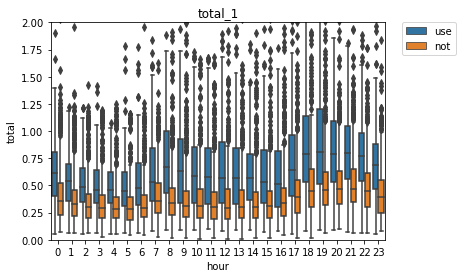

In [157]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_1')
plt.show()

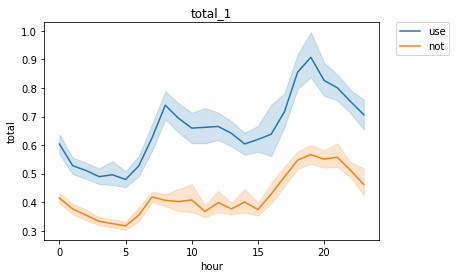

In [158]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_1')
plt.show()

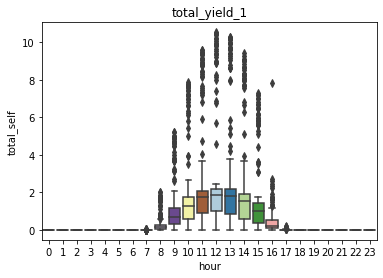

In [159]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_1, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_1')
plt.show()

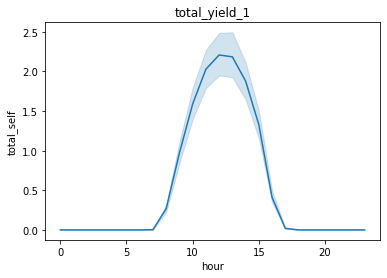

In [160]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_1)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_1')
plt.show()

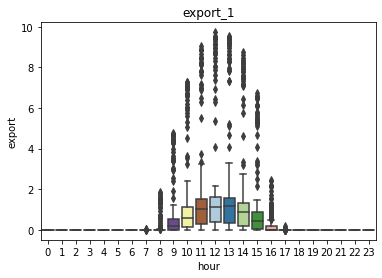

In [161]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_1, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_1')
plt.show()

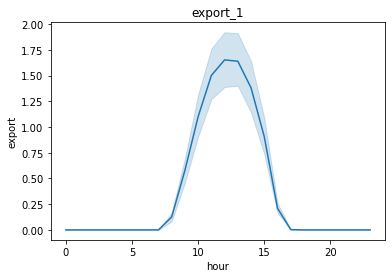

In [162]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_1)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_1')
plt.show()

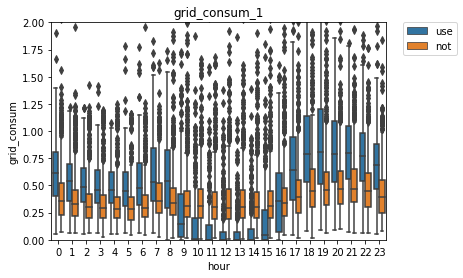

In [163]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_1')
plt.show()

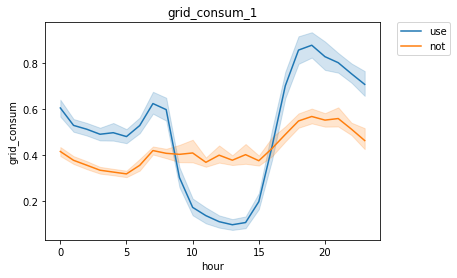

In [164]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_1')
plt.show()

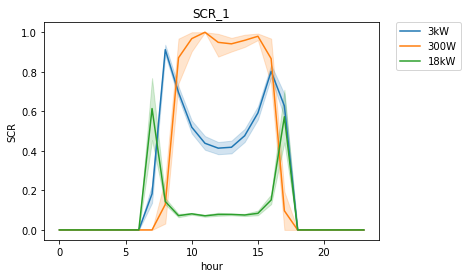

In [165]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_1')
plt.show()

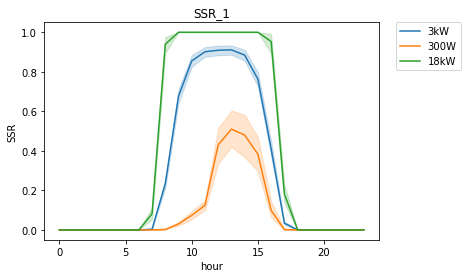

In [166]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_1')
plt.show()

<hr>

### 2022.02

In [167]:
df_all_hour_22_2 = df_all_hour[df_all_hour.ym == '2022/2']

In [168]:
# 총 전력 소비량
df_all_hour_22_2.groupby(['type', '시간']).describe()['전력소비량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   681.0  0.410838  0.232518  0.069946  0.239990  0.369873  0.510010   
     1   680.0  0.376561  0.226907  0.069824  0.219971  0.330078  0.452637   
     2   679.0  0.349611  0.213632  0.069946  0.200012  0.310059  0.420166   
     3   683.0  0.341092  0.227013  0.039917  0.199951  0.310059  0.410156   
     4   683.0  0.343583  0.378434  0.069946  0.199951  0.289917  0.409912   
     5   682.0  0.332505  0.220718  0.029907  0.190063  0.285034  0.409912   
     6   684.0  0.353601  0.236628  0.020020  0.209961  0.300049  0.429932   
     7   684.0  0.455700  0.553221  0.020020  0.259949  0.360107  0.529785   
     8   681.0  0.460897  0.735356  0.060059  0.239990  0.350098  0.489990   
     9   684.0  0.416508  0.400114  0.020020  0.219971  0.320068  0.469971   
     10  688.0  0.422123  0.592760  0.049927  0.209961  0.309814  0.449951   
     11  687.0  0.391242  0.360461  0.020020  0.190186  0.310059  0.459961   
     12  684.0  0.406670  0.365087  0.020020  0.190186  0.319824  0.469971   
     13  685.0  0.394619  0.323716  0.049927  0.190186  0.310059  0.459961   
     14  679.0  0.381097  0.316004  0.049927  0.204956  0.319824  0.449951   
     15  684.0  0.386976  0.308565  0.030029  0.209961  0.320068  0.459961   
     16  682.0  0.460921  1.495915  0.039917  0.210022  0.330078  0.489990   
     17  680.0  0.495590  0.464619  0.019897  0.229980  0.379883  0.562500   
     18  676.0  0.568569  0.506840  0.020020  0.279999  0.439941  0.650146   
     19  677.0  0.628833  0.697122  0.060059  0.320068  0.470215  0.699951   
     20  684.0  0.599794  0.443921  0.099976  0.349976  0.479980  0.682617   
     21  673.0  0.584648  0.413702  0.060059  0.359863  0.489990  0.659912   
     22  685.0  0.529176  0.375323  0.099976  0.320068  0.459961  0.629883   
     23  686.0  0.464177  0.266686  0.069824  0.272461  0.410156  0.570068   
use  0   274.0  0.557925  0.268074  0.029968  0.392487  0.549805  0.757324   
     1   276.0  0.507890  0.246742  0.050049  0.349854  0.500000  0.669922   
     2   277.0  0.469911  0.232014  0.039978  0.320068  0.450195  0.609863   
     3   276.0  0.439371  0.200827  0.030029  0.320068  0.439941  0.550049   
     4   278.0  0.444101  0.204742  0.049988  0.329834  0.440308  0.550232   
     5   277.0  0.439329  0.218075  0.029968  0.320068  0.429932  0.549805   
     6   273.0  0.455854  0.229308  0.049988  0.300049  0.439941  0.569824   
     7   271.0  0.600693  0.769591  0.049561  0.349976  0.489990  0.714966   
     8   277.0  0.681816  0.383184  0.078125  0.410034  0.580078  0.879883   
     9   274.0  0.713734  0.508217  0.090088  0.390114  0.609787  0.957520   
     10  274.0  0.632501  0.400476  0.109863  0.332520  0.579819  0.850098   
     11  271.0  0.601324  0.352681  0.090088  0.305023  0.569946  0.800110   
     12  275.0  0.580655  0.312829  0.090088  0.330078  0.559723  0.804688   
     13  274.0  0.597073  0.335063  0.100342  0.359886  0.529968  0.810150   
     14  275.0  0.580604  0.362769  0.109863  0.360001  0.520020  0.735229   
     15  277.0  0.556906  0.288159  0.070068  0.340088  0.509766  0.739746   
     16  277.0  0.561210  0.381347  0.099609  0.300049  0.479980  0.709839   
     17  278.0  0.618548  0.401228  0.078308  0.369904  0.550049  0.829834   
     18  276.0  0.750577  0.400116  0.080017  0.500000  0.694946  0.962463   
     19  276.0  0.773482  0.419631  0.069946  0.477539  0.709961  1.080078   
     20  278.0  0.715975  0.397675  0.070007  0.452637  0.674927  0.937500   
     21  276.0  0.687695  0.353167  0.039978  0.459961  0.650085  0.919922   
     22  278.0  0.660709  0.347912  0.040039  0.439941  0.634888  0.875183   
     23  275.0  0.615197  0.299324  0.039978  0.429993  0.620117  0.810059   

               max  
type 시간             
not  0    1.399902  
     1    2.080078  
     2    2.120117  
   

In [169]:
# 총 전력 생산량
df_all_hour_22_2_use = df_all_hour_22_2[df_all_hour_22_2.type == 'use']
df_all_hour_22_2_use.groupby(['시간']).describe()['발전량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std      min       25%       50%       75%  \
시간                                                                     
0   274.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1   276.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
2   277.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
3   276.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
4   278.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
5   277.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
6   273.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
7   271.0  0.046030  0.081201  0.00000  0.000000  0.020020  0.040039   
8   277.0  0.494789  0.616180  0.00000  0.160156  0.300049  0.530029   
9   274.0  1.251374  1.359097  0.00000  0.529846  0.920044  1.357544   
10  274.0  1.868279  1.933924  0.00000  0.939941  1.479980  1.924805   
11  271.0  2.318816  2.447076  0.00000  1.179932  1.870117  2.259888   
12  275.0  2.502682  2.664243  0.00000  1.265137  2.020020  2.394897   
13  274.0  2.438544  2.645031  0.01001  1.142578  1.989990  2.299988   
14  275.0  2.170463  2.423424  0.01001  0.870239  1.719971  2.080078   
15  277.0  1.628179  1.972984  0.00000  0.590088  1.250000  1.639893   
16  277.0  0.779442  0.916720  0.00000  0.210205  0.479980  0.929932   
17  278.0  0.152140  0.474380  0.00000  0.040039  0.080078  0.169922   
18  276.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
19  276.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
20  278.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
21  276.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
22  278.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
23  275.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6    0.000000  
7    0.509766  
8    3.048828  
9    6.359375  
10   9.169922  
11  10.759766  
12  11.900391  
13  11.861328  
14  10.718750  
15  10.969971  
16   4.468750  
17   7.679932  
18   0.000000  
19   0.000000  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [170]:
# 총 전력 수출량
df_all_hour_22_2_use = df_all_hour_22_2[df_all_hour_22_2.type == 'use']
df_all_hour_22_2_use.groupby(['시간']).describe()['잉여전력량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   278.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   277.0  0.000236  0.003931  0.0  0.000000  0.000000  0.000000   0.065430
6   273.0  0.000240  0.003960  0.0  0.000000  0.000000  0.000000   0.065430
7   271.0  0.014707  0.053429  0.0  0.000000  0.000000  0.000000   0.390625
8   277.0  0.244425  0.594977  0.0  0.000000  0.010010  0.109863   2.759766
9   274.0  0.801263  1.335753  0.0  0.070068  0.350037  0.770020   5.781250
10  274.0  1.365229  1.904916  0.0  0.309967  0.859924  1.390076   8.511719
11  271.0  1.813836  2.358867  0.0  0.655029  1.260010  1.699951  10.150391
12  275.0  1.992713  2.554787  0.0  0.699951  1.440063  1.880005  11.201172
13  274.0  1.904757  2.547401  0.0  0.570068  1.345032  1.767517  11.068359
14  275.0  1.657959  2.321583  0.0  0.359985  1.120117  1.550049  10.078125
15  277.0  1.185256  1.897545  0.0  0.140137  0.649902  1.120117   9.610107
16  277.0  0.479960  0.879600  0.0  0.000000  0.119873  0.510010   4.019531
17  278.0  0.057634  0.318990  0.0  0.000000  0.000000  0.020020   5.099976
18  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
19  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
20  278.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  278.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [171]:
# 총 그리드 소비량
df_all_hour_22_2.groupby(['type', '시간']).describe()['수전전력량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   681.0  0.410838  0.232518  0.069946  0.239990  0.369873  0.510010   
     1   680.0  0.376561  0.226907  0.069824  0.219971  0.330078  0.452637   
     2   679.0  0.349611  0.213632  0.069946  0.200012  0.310059  0.420166   
     3   683.0  0.341092  0.227013  0.039917  0.199951  0.310059  0.410156   
     4   683.0  0.343583  0.378434  0.069946  0.199951  0.289917  0.409912   
     5   682.0  0.332505  0.220718  0.029907  0.190063  0.285034  0.409912   
     6   684.0  0.353601  0.236628  0.020020  0.209961  0.300049  0.429932   
     7   684.0  0.455700  0.553221  0.020020  0.259949  0.360107  0.529785   
     8   681.0  0.460897  0.735356  0.060059  0.239990  0.350098  0.489990   
     9   684.0  0.416508  0.400114  0.020020  0.219971  0.320068  0.469971   
     10  688.0  0.422123  0.592760  0.049927  0.209961  0.309814  0.449951   
     11  687.0  0.391242  0.360461  0.020020  0.190186  0.310059  0.459961   
     12  684.0  0.406670  0.365087  0.020020  0.190186  0.319824  0.469971   
     13  685.0  0.394619  0.323716  0.049927  0.190186  0.310059  0.459961   
     14  679.0  0.381097  0.316004  0.049927  0.204956  0.319824  0.449951   
     15  684.0  0.386976  0.308565  0.030029  0.209961  0.320068  0.459961   
     16  682.0  0.460921  1.495915  0.039917  0.210022  0.330078  0.489990   
     17  680.0  0.495590  0.464619  0.019897  0.229980  0.379883  0.562500   
     18  676.0  0.568569  0.506840  0.020020  0.279999  0.439941  0.650146   
     19  677.0  0.628833  0.697122  0.060059  0.320068  0.470215  0.699951   
     20  684.0  0.599794  0.443921  0.099976  0.349976  0.479980  0.682617   
     21  673.0  0.584648  0.413702  0.060059  0.359863  0.489990  0.659912   
     22  685.0  0.529176  0.375323  0.099976  0.320068  0.459961  0.629883   
     23  686.0  0.464177  0.266686  0.069824  0.272461  0.410156  0.570068   
use  0   274.0  0.558163  0.267749  0.029968  0.392487  0.549805  0.757324   
     1   276.0  0.508127  0.246438  0.050049  0.349854  0.500000  0.669922   
     2   277.0  0.470147  0.231731  0.039978  0.320068  0.450195  0.609863   
     3   276.0  0.439608  0.200535  0.030029  0.320068  0.439941  0.550049   
     4   278.0  0.444337  0.204453  0.049988  0.329834  0.440308  0.550232   
     5   277.0  0.439565  0.217808  0.029968  0.320068  0.429932  0.549805   
     6   273.0  0.456094  0.229032  0.049988  0.300049  0.439941  0.569824   
     7   271.0  0.569370  0.772855  0.010010  0.320068  0.459961  0.679932   
     8   277.0  0.431453  0.392252  0.000000  0.129883  0.350098  0.600098   
     9   274.0  0.263623  0.462276  0.000000  0.000000  0.080017  0.377441   
     10  274.0  0.129450  0.244752  0.000000  0.000000  0.009766  0.145020   
     11  271.0  0.096344  0.220285  0.000000  0.000000  0.000000  0.050293   
     12  275.0  0.070686  0.174346  0.000000  0.000000  0.000000  0.030151   
     13  274.0  0.063285  0.178834  0.000000  0.000000  0.000000  0.040039   
     14  275.0  0.068100  0.157564  0.000000  0.000000  0.000000  0.040039   
     15  277.0  0.113983  0.221543  0.000000  0.000000  0.010010  0.129883   
     16  277.0  0.261728  0.373445  0.000000  0.000000  0.129883  0.350098   
     17  278.0  0.524042  0.385686  0.000000  0.250000  0.464966  0.739929   
     18  276.0  0.750577  0.400116  0.080017  0.500000  0.694946  0.962463   
     19  276.0  0.773482  0.419631  0.069946  0.477539  0.709961  1.080078   
     20  278.0  0.715975  0.397675  0.070007  0.452637  0.674927  0.937500   
     21  276.0  0.687695  0.353167  0.039978  0.459961  0.650085  0.919922   
     22  278.0  0.660937  0.347608  0.040039  0.439941  0.634888  0.875183   
     23  275.0  0.615435  0.298987  0.039978  0.429993  0.620117  0.810059   

               max  
type 시간             
not  0    1.399902  
     1    2.080078  
     2    2.120117  
   

In [172]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    28.0  0.464714  0.212160  0.219512  0.284205  0.406889   
         8    28.0  0.101560  0.052138  0.047676  0.069442  0.088419   
         9    28.0  0.078475  0.017167  0.051625  0.067875  0.073990   
         10   28.0  0.065265  0.016405  0.030218  0.054808  0.064727   
         11   28.0  0.075195  0.014014  0.048691  0.066701  0.076099   
         12   28.0  0.077787  0.014693  0.049559  0.067300  0.075201   
         13   28.0  0.076944  0.013449  0.052540  0.066834  0.074973   
         14   28.0  0.076096  0.015466  0.035074  0.071225  0.081668   
         15   28.0  0.082257  0.016246  0.058930  0.072914  0.077506   
         16   28.0  0.094823  0.027720  0.049465  0.076526  0.093970   
         17   28.0  0.322714  0.130793  0.188192  0.230140  0.278447   
         18   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    28.0  0.428571  0.503953  0.000000  0.000000  0.000000   
         9    28.0  0.964286  0.188982  0.000000  1.000000  1.000000   
         10   28.0  0.964286  0.188982  0.000000  1.000000  1.000000   
         11   28.0  0.964286  0.188982  0.000000  1.000000  1.000000   
         12   28.0  0.922927  0.202536  0.000000  0.930766  1.000000   
         13   28.0  0.927812  0.119709  0.565181  0.893275  1.000000   
         14   28.0  0.959854  0.086840  0.666707  0.952380  1.000000   
         15   28.0  0.943474  0.201126  0.000000  1.000000  1.000000   
         16   28.0  0.997619  0.012599  0.933332  1.000000  1.000000   
         17   28.0  0.678571  0.475595  0.000000  0.000000  1.000000   
         18   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   218.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   221.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   221.0  0.000000  0.000000  0.000000  0.0

In [173]:
# SSR(자가공급률)
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    28.0  0.436851  0.212771  0.054320  0.273247  0.432006   
         8    28.0  0.994825  0.020387  0.900405  1.000000  1.000000   
         9    28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   28.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   28.0  0.997596  0.012723  0.932677  1.000000  1.000000   
         17   28.0  0.688624  0.216162  0.274564  0.488492  0.766623   
         18   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    28.0  0.007548  0.010264  0.000000  0.000000  0.000000   
         9    28.0  0.046608  0.027231  0.000000  0.031281  0.040016   
         10   28.0  0.096696  0.065377  0.000000  0.050520  0.081753   
         11   28.0  0.136448  0.098569  0.000000  0.070460  0.107917   
         12   28.0  0.379845  0.217727  0.000000  0.220612  0.351711   
         13   28.0  0.525388  0.247223  0.004980  0.369320  0.529245   
         14   28.0  0.428587  0.240242  0.055564  0.282275  0.406537   
         15   28.0  0.332933  0.228518  0.000000  0.163281  0.273407   
         16   28.0  0.205932  0.168849  0.030258  0.083619  0.158751   
         17   28.0  0.032791  0.033005  0.000000  0.000000  0.027082   
         18   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   28.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   218.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   221.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   220.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   222.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   221.0  0.000000  0.000000  0.000000  0.0

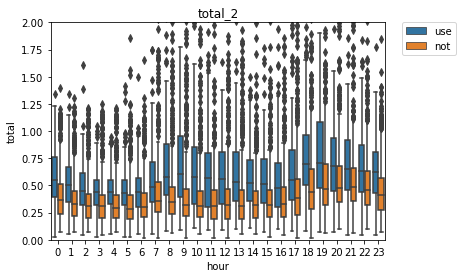

In [174]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_2')
plt.show()

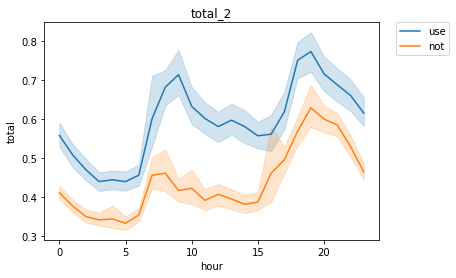

In [175]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_2')
plt.show()

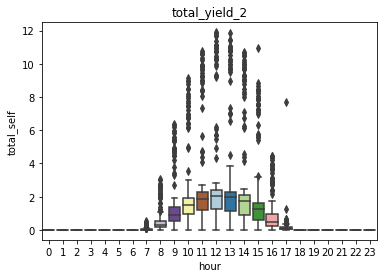

In [176]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_2, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_2')
plt.show()

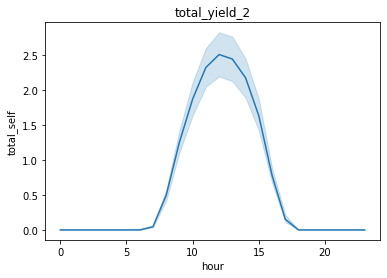

In [177]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_2)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_2')
plt.show()

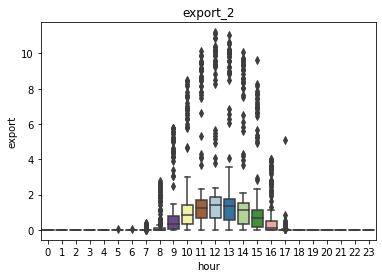

In [178]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_2, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_2')
plt.show()

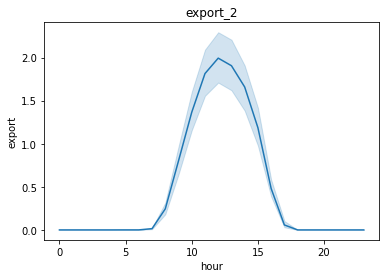

In [179]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_2)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_2')
plt.show()

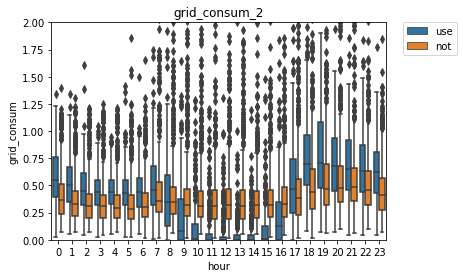

In [180]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_2')
plt.show()

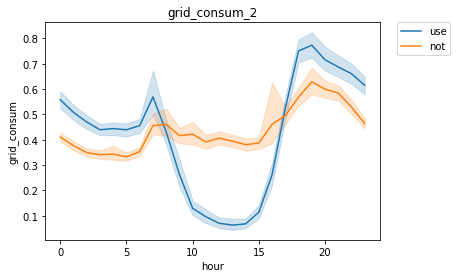

In [181]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_2')
plt.show()

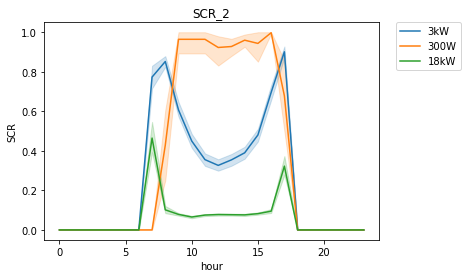

In [182]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_2')
plt.show()

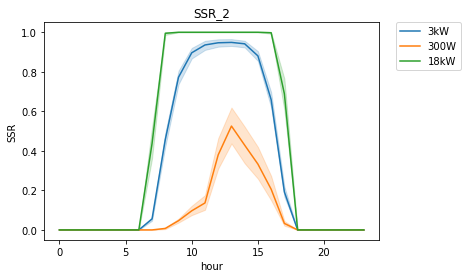

In [183]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_2')
plt.show()

<hr>

### 2022.03

In [184]:
df_all_hour_22_3 = df_all_hour[df_all_hour.ym == '2022/3']

In [185]:
# 총 전력 소비량
df_all_hour_22_3.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   720.0  0.380555  0.335471  0.079834  0.209961  0.330078  0.450195   
     1   723.0  0.341907  0.227192  0.059937  0.189941  0.290039  0.419922   
     2   723.0  0.326698  0.272155  0.059937  0.185059  0.270020  0.400146   
     3   726.0  0.309314  0.206356  0.020020  0.179932  0.260010  0.390137   
     4   727.0  0.303168  0.200928  0.069946  0.169922  0.250000  0.384888   
     5   721.0  0.310453  0.237556  0.040039  0.169922  0.260254  0.389893   
     6   725.0  0.363748  0.564074  0.020020  0.199951  0.299805  0.420166   
     7   730.0  0.416232  0.366067  0.010010  0.259766  0.359863  0.489990   
     8   735.0  0.359538  0.231772  0.010010  0.209961  0.310059  0.444946   
     9   735.0  0.349318  0.552096  0.020020  0.180176  0.280029  0.409912   
     10  735.0  0.329614  0.231391  0.020020  0.180054  0.280029  0.409912   
     11  735.0  0.331677  0.285802  0.020020  0.160156  0.260010  0.409912   
     12  732.0  0.345167  0.429479  0.029907  0.169922  0.270020  0.399902   
     13  735.0  0.326033  0.254955  0.039917  0.170166  0.260254  0.400146   
     14  729.0  0.325847  0.259480  0.020020  0.179932  0.260254  0.399902   
     15  729.0  0.330762  0.303285  0.019897  0.179932  0.279785  0.389893   
     16  724.0  0.347353  0.282216  0.020020  0.190033  0.280029  0.412598   
     17  722.0  0.480755  1.829007  0.020020  0.209961  0.310059  0.500000   
     18  726.0  0.482800  0.384612  0.020020  0.250000  0.389893  0.587402   
     19  726.0  0.564991  1.052754  0.040039  0.300049  0.420166  0.600037   
     20  724.0  0.533465  0.393566  0.040039  0.320068  0.449951  0.580078   
     21  720.0  0.526124  0.402011  0.109985  0.339844  0.459961  0.609863   
     22  724.0  0.473005  0.284440  0.080078  0.300049  0.429932  0.562500   
     23  722.0  0.418032  0.257609  0.050049  0.239990  0.379883  0.500000   
use  0   307.0  0.497953  0.348891  0.049988  0.300049  0.459961  0.649902   
     1   305.0  0.451510  0.260346  0.049988  0.290039  0.439941  0.589844   
     2   308.0  0.417080  0.218007  0.040039  0.277344  0.420166  0.549805   
     3   306.0  0.392123  0.183568  0.049988  0.270020  0.399902  0.527344   
     4   304.0  0.389996  0.193260  0.039978  0.260010  0.390137  0.520020   
     5   308.0  0.381390  0.191286  0.049988  0.250000  0.380127  0.500000   
     6   304.0  0.420098  0.259232  0.059998  0.239990  0.399902  0.539856   
     7   306.0  0.571929  0.386461  0.049500  0.320068  0.489990  0.689697   
     8   305.0  0.606671  0.332906  0.080078  0.359863  0.550293  0.769531   
     9   305.0  0.523378  0.300103  0.080078  0.309784  0.470215  0.680420   
     10  303.0  0.471716  0.277155  0.079834  0.239990  0.420166  0.634766   
     11  304.0  0.468047  0.305942  0.070068  0.240234  0.390137  0.630127   
     12  305.0  0.528203  0.585522  0.109991  0.260254  0.429932  0.669678   
     13  305.0  0.470194  0.273168  0.060059  0.260010  0.410156  0.629639   
     14  307.0  0.465884  0.258366  0.089844  0.260132  0.410156  0.619888   
     15  303.0  0.442946  0.252769  0.070312  0.249878  0.389648  0.565186   
     16  303.0  0.458155  0.259406  0.079041  0.271484  0.400146  0.580185   
     17  305.0  0.509326  0.308057  0.060791  0.290161  0.440186  0.650391   
     18  305.0  0.656118  0.352354  0.069336  0.409912  0.609619  0.850098   
     19  305.0  0.676948  0.386686  0.079956  0.380005  0.640137  0.890137   
     20  306.0  0.660500  0.376159  0.049988  0.389709  0.615112  0.899902   
     21  305.0  0.638519  0.374816  0.049988  0.379883  0.590088  0.850098   
     22  304.0  0.601991  0.339448  0.049988  0.359985  0.579834  0.779846   
     23  306.0  0.540945  0.315846  0.049988  0.319977  0.510010  0.700195   

               max  
type 시간             
not  0    6.800049  
     1    2.089844  
     2    5.060059  
   

In [186]:
# 총 전력 생산량
df_all_hour_22_3_use = df_all_hour_22_3[df_all_hour_22_3.type == 'use']
df_all_hour_22_3_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   307.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   308.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   306.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   308.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   304.0  0.005341  0.016678  0.000000  0.000000  0.000000  0.000000   
7   306.0  0.175314  0.282373  0.000000  0.019531  0.080078  0.180176   
8   305.0  0.640479  0.851867  0.000000  0.120117  0.419922  0.739746   
9   305.0  1.217109  1.507598  0.000000  0.270020  0.920166  1.510010   
10  303.0  1.711864  2.092627  0.000000  0.449951  1.279785  1.984863   
11  304.0  1.998471  2.370278  0.000000  0.527344  1.664795  2.274658   
12  305.0  2.151756  2.472689  0.000000  0.590332  1.850098  2.350098   
13  305.0  2.038282  2.433441  0.000000  0.530273  1.780029  2.300049   
14  307.0  1.810141  2.181305  0.000000  0.490112  1.530029  2.070190   
15  303.0  1.395145  1.725315  0.000000  0.350098  1.110352  1.644897   
16  303.0  0.874151  1.061318  0.009766  0.184967  0.589844  1.069824   
17  305.0  0.236866  0.237034  0.000000  0.060059  0.169922  0.339844   
18  305.0  0.012739  0.021724  0.000000  0.000000  0.009766  0.019531   
19  305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  306.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  305.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  304.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  306.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6    0.121094  
7    1.720703  
8    4.648438  
9    7.699219  
10   9.849609  
11  11.371094  
12  12.320312  
13  12.140625  
14  11.279297  
15   9.271484  
16   5.490234  
17   1.169922  
18   0.218750  
19   0.000000  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [187]:
# 총 전력 수출량
df_all_hour_22_3_use = df_all_hour_22_3[df_all_hour_22_3.type == 'use']
df_all_hour_22_3_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   307.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   308.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   308.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
6   304.0  0.000990  0.007508  0.0  0.000000  0.000000  0.000000   0.080078
7   306.0  0.067054  0.225076  0.0  0.000000  0.000000  0.010010   1.410156
8   305.0  0.362348  0.812994  0.0  0.000000  0.050049  0.309814   4.359375
9   305.0  0.862022  1.420336  0.0  0.010010  0.410034  1.000000   7.021484
10  303.0  1.347429  1.987140  0.0  0.104980  0.819946  1.574951   9.111328
11  304.0  1.625297  2.246077  0.0  0.194946  1.124878  1.912659  10.529297
12  305.0  1.734907  2.317499  0.0  0.200195  1.310059  1.979980  11.199219
13  305.0  1.650962  2.337428  0.0  0.169922  1.239990  1.880127  11.378906
14  307.0  1.425848  2.052566  0.0  0.140015  1.030029  1.714966  10.238281
15  303.0  1.055761  1.656001  0.0  0.050049  0.619873  1.285034   8.410156
16  303.0  0.582630  1.000997  0.0  0.000000  0.200073  0.694946   4.750000
17  305.0  0.090667  0.193925  0.0  0.000000  0.000000  0.080078   1.060547
18  305.0  0.001757  0.011369  0.0  0.000000  0.000000  0.000000   0.138672
19  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
20  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  305.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  304.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  306.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [188]:
# 총 그리드 소비량
df_all_hour_22_3.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   720.0  0.380555  0.335471  0.079834  0.209961  0.330078  0.450195   
     1   723.0  0.341907  0.227192  0.059937  0.189941  0.290039  0.419922   
     2   723.0  0.326698  0.272155  0.059937  0.185059  0.270020  0.400146   
     3   726.0  0.309314  0.206356  0.020020  0.179932  0.260010  0.390137   
     4   727.0  0.303168  0.200928  0.069946  0.169922  0.250000  0.384888   
     5   721.0  0.310453  0.237556  0.040039  0.169922  0.260254  0.389893   
     6   725.0  0.363748  0.564074  0.020020  0.199951  0.299805  0.420166   
     7   730.0  0.416232  0.366067  0.010010  0.259766  0.359863  0.489990   
     8   735.0  0.359538  0.231772  0.010010  0.209961  0.310059  0.444946   
     9   735.0  0.349318  0.552096  0.020020  0.180176  0.280029  0.409912   
     10  735.0  0.329614  0.231391  0.020020  0.180054  0.280029  0.409912   
     11  735.0  0.331677  0.285802  0.020020  0.160156  0.260010  0.409912   
     12  732.0  0.345167  0.429479  0.029907  0.169922  0.270020  0.399902   
     13  735.0  0.326033  0.254955  0.039917  0.170166  0.260254  0.400146   
     14  729.0  0.325847  0.259480  0.020020  0.179932  0.260254  0.399902   
     15  729.0  0.330762  0.303285  0.019897  0.179932  0.279785  0.389893   
     16  724.0  0.347353  0.282216  0.020020  0.190033  0.280029  0.412598   
     17  722.0  0.480755  1.829007  0.020020  0.209961  0.310059  0.500000   
     18  726.0  0.482800  0.384612  0.020020  0.250000  0.389893  0.587402   
     19  726.0  0.564991  1.052754  0.040039  0.300049  0.420166  0.600037   
     20  724.0  0.533465  0.393566  0.040039  0.320068  0.449951  0.580078   
     21  720.0  0.526124  0.402011  0.109985  0.339844  0.459961  0.609863   
     22  724.0  0.473005  0.284440  0.080078  0.300049  0.429932  0.562500   
     23  722.0  0.418032  0.257609  0.050049  0.239990  0.379883  0.500000   
use  0   307.0  0.497953  0.348891  0.049988  0.300049  0.459961  0.649902   
     1   305.0  0.451510  0.260346  0.049988  0.290039  0.439941  0.589844   
     2   308.0  0.417080  0.218007  0.040039  0.277344  0.420166  0.549805   
     3   306.0  0.392123  0.183568  0.049988  0.270020  0.399902  0.527344   
     4   304.0  0.389996  0.193260  0.039978  0.260010  0.390137  0.520020   
     5   308.0  0.381390  0.191286  0.049988  0.250000  0.380127  0.500000   
     6   304.0  0.415748  0.259354  0.029968  0.239990  0.395020  0.530029   
     7   306.0  0.463669  0.396857  0.000000  0.209961  0.390137  0.570007   
     8   305.0  0.328539  0.350769  0.000000  0.040039  0.229980  0.489746   
     9   305.0  0.168291  0.284881  0.000000  0.000000  0.029907  0.209961   
     10  303.0  0.107281  0.219013  0.000000  0.000000  0.000000  0.109863   
     11  304.0  0.094872  0.236813  0.000000  0.000000  0.000000  0.050049   
     12  305.0  0.111354  0.483224  0.000000  0.000000  0.000000  0.060059   
     13  305.0  0.082873  0.194366  0.000000  0.000000  0.000000  0.059570   
     14  307.0  0.081590  0.166181  0.000000  0.000000  0.000000  0.064941   
     15  303.0  0.103562  0.195550  0.000000  0.000000  0.009766  0.120117   
     16  303.0  0.166633  0.237326  0.000000  0.000000  0.050049  0.265015   
     17  305.0  0.363126  0.313859  0.000000  0.110107  0.299805  0.530029   
     18  305.0  0.645136  0.354713  0.040039  0.399902  0.589844  0.830078   
     19  305.0  0.676948  0.386686  0.079956  0.380005  0.640137  0.890137   
     20  306.0  0.660500  0.376159  0.049988  0.389709  0.615112  0.899902   
     21  305.0  0.638519  0.374816  0.049988  0.379883  0.590088  0.850098   
     22  304.0  0.601991  0.339448  0.049988  0.359985  0.579834  0.779846   
     23  306.0  0.540945  0.315846  0.049988  0.319977  0.510010  0.700195   

               max  
type 시간             
not  0    6.800049  
     1    2.089844  
     2    5.060059  
   

In [189]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.187636  0.332344  0.000000  0.000000  0.000000   
         7    31.0  0.323279  0.228197  0.000000  0.173685  0.279297   
         8    31.0  0.142371  0.190054  0.038627  0.069160  0.083993   
         9    31.0  0.108776  0.050967  0.073323  0.082899  0.090020   
         10   31.0  0.080404  0.020086  0.056452  0.074643  0.076494   
         11   31.0  0.082609  0.031714  0.053059  0.070613  0.076115   
         12   31.0  0.102888  0.044834  0.074203  0.082565  0.092553   
         13   31.0  0.078876  0.053857  0.038025  0.062827  0.066002   
         14   31.0  0.104629  0.055844  0.066949  0.078760  0.093041   
         15   31.0  0.095925  0.066769  0.045956  0.066524  0.077439   
         16   31.0  0.127467  0.094842  0.064272  0.085991  0.101674   
         17   31.0  0.279186  0.198286  0.093489  0.150061  0.203187   
         18   31.0  0.362266  0.404840  0.000000  0.000000  0.268293   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.258065  0.444803  0.000000  0.000000  0.000000   
         8    31.0  0.774194  0.425024  0.000000  1.000000  1.000000   
         9    31.0  0.991937  0.044893  0.750048  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  0.973657  0.076501  0.692247  1.000000  1.000000   
         12   31.0  0.906277  0.213359  0.000000  0.918062  1.000000   
         13   31.0  0.905658  0.214131  0.000000  0.937974  1.000000   
         14   31.0  0.906541  0.218214  0.000000  0.955537  1.000000   
         15   31.0  0.907238  0.214398  0.000000  0.904549  1.000000   
         16   31.0  0.965454  0.108532  0.526321  1.000000  1.000000   
         17   31.0  0.895928  0.299533  0.000000  1.000000  1.000000   
         18   31.0  0.161290  0.373878  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.0

In [190]:
# SSR(자가공급률)
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.078359  0.148354  0.000000  0.000000  0.000000   
         7    31.0  0.706653  0.334282  0.000000  0.478642  0.806976   
         8    31.0  0.957278  0.166032  0.124393  1.000000  1.000000   
         9    31.0  0.996416  0.019956  0.888889  1.000000  1.000000   
         10   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   31.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   31.0  0.996609  0.018878  0.894889  1.000000  1.000000   
         14   31.0  0.993346  0.027819  0.856140  1.000000  1.000000   
         15   31.0  0.990530  0.052724  0.706444  1.000000  1.000000   
         16   31.0  0.975228  0.096893  0.494208  1.000000  1.000000   
         17   31.0  0.856652  0.249822  0.055876  0.787196  1.000000   
         18   31.0  0.102378  0.141323  0.000000  0.000000  0.044432   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    31.0  0.007845  0.018076  0.000000  0.000000  0.000000   
         8    31.0  0.033189  0.044199  0.000000  0.011007  0.023851   
         9    31.0  0.121614  0.104208  0.011771  0.038242  0.111036   
         10   31.0  0.194084  0.138430  0.015396  0.069117  0.172428   
         11   31.0  0.249692  0.210598  0.013326  0.078924  0.216165   
         12   31.0  0.430837  0.294309  0.000000  0.168446  0.395134   
         13   31.0  0.447246  0.329378  0.000000  0.187322  0.333461   
         14   31.0  0.425750  0.319393  0.000000  0.140724  0.354896   
         15   31.0  0.401358  0.328519  0.000000  0.129042  0.257499   
         16   31.0  0.318705  0.276857  0.015168  0.104200  0.222158   
         17   31.0  0.139290  0.176548  0.000000  0.028384  0.065190   
         18   31.0  0.008963  0.022279  0.000000  0.000000  0.000000   
         19   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   31.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   243.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   244.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   242.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   246.0  0.000000  0.000000  0.000000  0.0

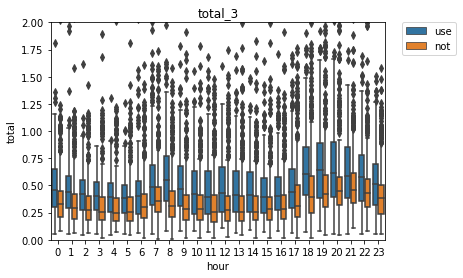

In [191]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_3')
plt.show()

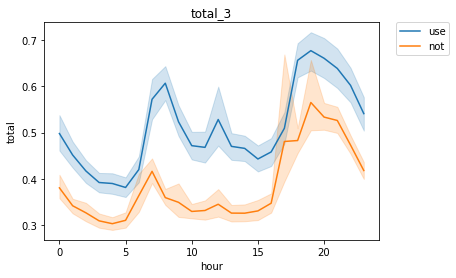

In [192]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_3')
plt.show()

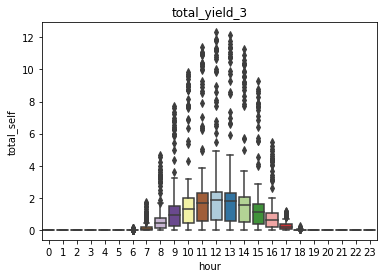

In [193]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_3, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_3')
plt.show()

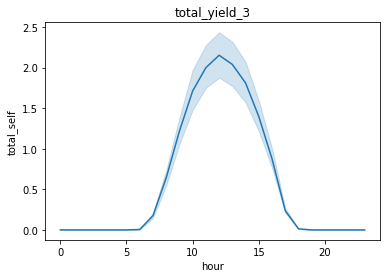

In [194]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_3)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_3')
plt.show()

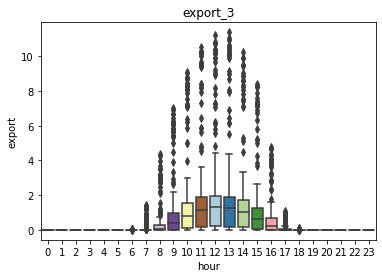

In [195]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_3, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_3')
plt.show()

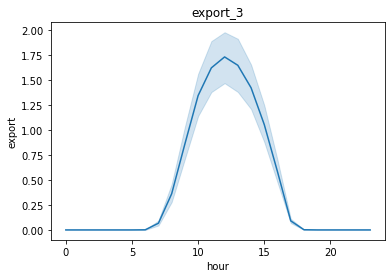

In [196]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_3)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_3')
plt.show()

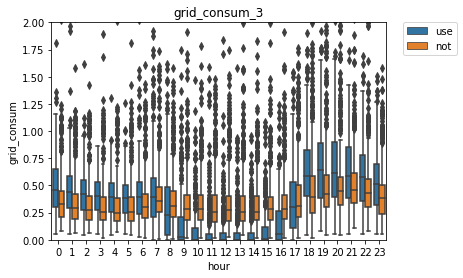

In [197]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_3')
plt.show()

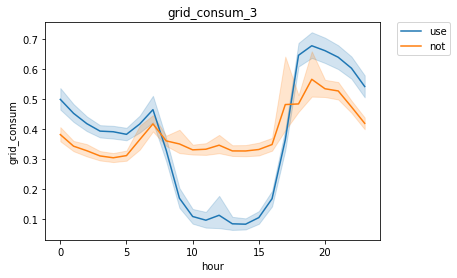

In [198]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_3')
plt.show()

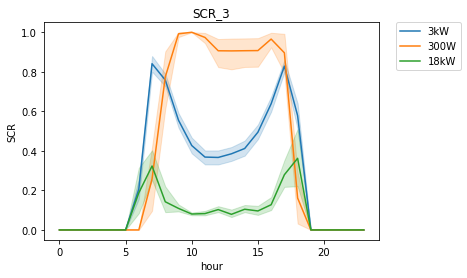

In [199]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_3')
plt.show()

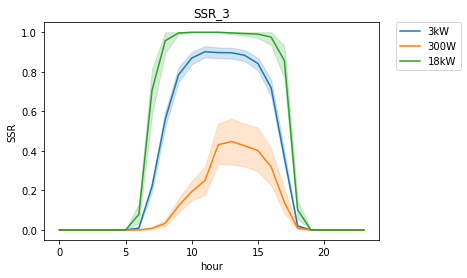

In [200]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_3')
plt.show()

<hr>

### 2022.04

In [201]:
df_all_hour_22_4 = df_all_hour[df_all_hour.ym == '2022/4']

In [202]:
# 총 전력 소비량
df_all_hour_22_4.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   693.0  0.345524  0.219421  0.040039  0.189941  0.280029  0.439941   
     1   699.0  0.349208  0.476430  0.049927  0.180176  0.260010  0.390137   
     2   699.0  0.301900  0.195198  0.050049  0.179932  0.260010  0.369995   
     3   693.0  0.289770  0.195193  0.030029  0.170410  0.250000  0.359863   
     4   698.0  0.287298  0.206463  0.039917  0.169922  0.239990  0.350098   
     5   698.0  0.294055  0.260155  0.040039  0.169922  0.250000  0.359863   
     6   695.0  0.324748  0.193291  0.020020  0.200195  0.280029  0.399902   
     7   695.0  0.375707  0.262161  0.029907  0.229980  0.329834  0.449951   
     8   699.0  0.343651  0.322693  0.039917  0.189941  0.299805  0.409912   
     9   697.0  0.334198  0.564265  0.020020  0.169922  0.270020  0.379883   
     10  692.0  0.331879  0.496199  0.039795  0.160156  0.270020  0.379883   
     11  698.0  0.308884  0.339109  0.029907  0.150146  0.250000  0.350098   
     12  697.0  0.309692  0.275569  0.049927  0.159912  0.250000  0.360107   
     13  699.0  0.299871  0.234224  0.050049  0.159912  0.250000  0.349731   
     14  700.0  0.284769  0.192122  0.049805  0.160156  0.250000  0.343079   
     15  700.0  0.297236  0.293464  0.049927  0.169922  0.250000  0.342651   
     16  691.0  0.308163  0.219773  0.040039  0.179932  0.260010  0.370117   
     17  698.0  0.362032  0.353405  0.029907  0.180176  0.270020  0.410095   
     18  692.0  0.406647  0.318843  0.040039  0.209961  0.339844  0.500000   
     19  690.0  0.453638  0.326443  0.050049  0.270020  0.379883  0.540039   
     20  696.0  0.496929  0.421454  0.059937  0.299805  0.409912  0.569824   
     21  680.0  0.480972  0.440869  0.050049  0.300049  0.399902  0.549805   
     22  690.0  0.420047  0.232882  0.049927  0.260010  0.369873  0.510010   
     23  693.0  0.377911  0.243340  0.030029  0.209961  0.320068  0.479980   
use  0   289.0  0.448436  0.300756  0.039978  0.280029  0.420166  0.600098   
     1   291.0  0.413125  0.214409  0.030029  0.260010  0.409912  0.540039   
     2   290.0  0.395030  0.202905  0.039978  0.250000  0.380127  0.527344   
     3   292.0  0.395542  0.233583  0.039978  0.250000  0.379883  0.510254   
     4   292.0  0.384113  0.194623  0.039978  0.250000  0.385010  0.509766   
     5   289.0  0.385248  0.209995  0.049988  0.250000  0.370117  0.500000   
     6   290.0  0.450627  0.328318  0.049805  0.260422  0.399780  0.539795   
     7   290.0  0.567046  0.351963  0.109863  0.319824  0.479980  0.719910   
     8   289.0  0.578131  0.339449  0.100098  0.349854  0.510010  0.739502   
     9   289.0  0.502070  0.283027  0.099854  0.280029  0.460205  0.671875   
     10  289.0  0.458674  0.263427  0.070312  0.250244  0.399902  0.629761   
     11  287.0  0.476321  0.334920  0.050537  0.250000  0.389648  0.609985   
     12  289.0  0.501981  0.337141  0.080078  0.250244  0.379883  0.699219   
     13  289.0  0.479609  0.339076  0.089844  0.260010  0.408203  0.610352   
     14  288.0  0.455088  0.270697  0.079834  0.259766  0.390381  0.582520   
     15  289.0  0.442655  0.296805  0.088806  0.250000  0.389893  0.560303   
     16  288.0  0.443344  0.283670  0.079773  0.240173  0.400146  0.549995   
     17  290.0  0.460342  0.311634  0.109863  0.230225  0.385010  0.580261   
     18  290.0  0.556270  0.371078  0.069763  0.299866  0.470093  0.757385   
     19  291.0  0.687464  0.422927  0.080017  0.390076  0.640137  0.915039   
     20  288.0  0.655556  0.431621  0.070007  0.370117  0.580078  0.870117   
     21  289.0  0.593916  0.328822  0.049988  0.360107  0.560059  0.790039   
     22  287.0  0.542134  0.285446  0.040039  0.349976  0.529785  0.739746   
     23  288.0  0.497890  0.280487  0.040039  0.290039  0.489990  0.662598   

               max  
type 시간             
not  0    2.229492  
     1    6.220703  
     2    2.060547  
   

In [203]:
# 총 전력 생산량
df_all_hour_22_4_use = df_all_hour_22_4[df_all_hour_22_4.type == 'use']
df_all_hour_22_4_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   289.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   291.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   290.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   292.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   292.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   289.0  0.000076  0.000914  0.000000  0.000000  0.000000  0.000000   
6   290.0  0.074505  0.110219  0.000000  0.010010  0.040039  0.080078   
7   290.0  0.437472  0.554795  0.000000  0.122559  0.270020  0.430176   
8   289.0  1.057557  1.200325  0.000000  0.399902  0.720703  1.130371   
9   289.0  1.677882  1.821300  0.000000  0.810059  1.290039  1.709961   
10  289.0  2.184954  2.233706  0.020020  1.189941  1.890137  2.189941   
11  287.0  2.496521  2.569546  0.019989  1.459961  2.080078  2.430176   
12  289.0  2.557201  2.633749  0.010010  1.390137  2.200195  2.500000   
13  289.0  2.487179  2.552662  0.019989  1.350098  2.140137  2.389648   
14  288.0  2.191312  2.346615  0.029999  1.130127  1.899902  2.129883   
15  289.0  1.778278  1.911457  0.029785  0.859863  1.479980  1.719971   
16  288.0  1.204656  1.336755  0.009766  0.579956  0.944824  1.200195   
17  290.0  0.438561  0.344887  0.000000  0.199768  0.409790  0.549805   
18  290.0  0.068845  0.072375  0.000000  0.029785  0.060059  0.089844   
19  291.0  0.000447  0.004569  0.000000  0.000000  0.000000  0.000000   
20  288.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  289.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  287.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  288.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.011719  
6    0.708984  
7    2.761719  
8    5.570312  
9    8.179688  
10  10.359375  
11  11.849609  
12  12.759766  
13  11.859375  
14  11.000000  
15   9.335205  
16   6.808594  
17   2.000000  
18   0.599854  
19   0.060059  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [204]:
# 총 전력 수출량
df_all_hour_22_4_use = df_all_hour_22_4[df_all_hour_22_4.type == 'use']
df_all_hour_22_4_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   289.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   291.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   290.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   292.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   292.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   289.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
6   290.0  0.021736  0.073658  0.0  0.000000  0.000000  0.000000   0.531250
7   290.0  0.214602  0.496401  0.0  0.000000  0.020020  0.100098   2.449219
8   289.0  0.694440  1.165287  0.0  0.030029  0.290039  0.689941   5.109375
9   289.0  1.272906  1.739885  0.0  0.299927  0.889893  1.369873   7.638672
10  289.0  1.785690  2.119398  0.0  0.729980  1.439941  1.919922   9.429688
11  287.0  2.071792  2.443933  0.0  0.914978  1.589844  2.099854  10.968750
12  289.0  2.103108  2.468512  0.0  0.949951  1.689941  2.119873  11.601562
13  289.0  2.060579  2.443030  0.0  0.940186  1.639893  2.039795  10.949219
14  288.0  1.783195  2.217269  0.0  0.670135  1.380066  1.772522  10.050781
15  289.0  1.395523  1.809595  0.0  0.399902  1.000000  1.400146   8.468750
16  288.0  0.856790  1.288435  0.0  0.157471  0.484985  0.932434   6.199219
17  290.0  0.207962  0.321008  0.0  0.000000  0.070068  0.290039   1.718750
18  290.0  0.014488  0.049422  0.0  0.000000  0.000000  0.000000   0.451172
19  291.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
20  288.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  289.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  287.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  288.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [205]:
# 총 그리드 소비량
df_all_hour_22_4.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   693.0  0.345524  0.219421  0.040039  0.189941  0.280029  0.439941   
     1   699.0  0.349208  0.476430  0.049927  0.180176  0.260010  0.390137   
     2   699.0  0.301900  0.195198  0.050049  0.179932  0.260010  0.369995   
     3   693.0  0.289770  0.195193  0.030029  0.170410  0.250000  0.359863   
     4   698.0  0.287298  0.206463  0.039917  0.169922  0.239990  0.350098   
     5   698.0  0.294055  0.260155  0.040039  0.169922  0.250000  0.359863   
     6   695.0  0.324748  0.193291  0.020020  0.200195  0.280029  0.399902   
     7   695.0  0.375707  0.262161  0.029907  0.229980  0.329834  0.449951   
     8   699.0  0.343651  0.322693  0.039917  0.189941  0.299805  0.409912   
     9   697.0  0.334198  0.564265  0.020020  0.169922  0.270020  0.379883   
     10  692.0  0.331879  0.496199  0.039795  0.160156  0.270020  0.379883   
     11  698.0  0.308884  0.339109  0.029907  0.150146  0.250000  0.350098   
     12  697.0  0.309692  0.275569  0.049927  0.159912  0.250000  0.360107   
     13  699.0  0.299871  0.234224  0.050049  0.159912  0.250000  0.349731   
     14  700.0  0.284769  0.192122  0.049805  0.160156  0.250000  0.343079   
     15  700.0  0.297236  0.293464  0.049927  0.169922  0.250000  0.342651   
     16  691.0  0.308163  0.219773  0.040039  0.179932  0.260010  0.370117   
     17  698.0  0.362032  0.353405  0.029907  0.180176  0.270020  0.410095   
     18  692.0  0.406647  0.318843  0.040039  0.209961  0.339844  0.500000   
     19  690.0  0.453638  0.326443  0.050049  0.270020  0.379883  0.540039   
     20  696.0  0.496929  0.421454  0.059937  0.299805  0.409912  0.569824   
     21  680.0  0.480972  0.440869  0.050049  0.300049  0.399902  0.549805   
     22  690.0  0.420047  0.232882  0.049927  0.260010  0.369873  0.510010   
     23  693.0  0.377911  0.243340  0.030029  0.209961  0.320068  0.479980   
use  0   289.0  0.448436  0.300756  0.039978  0.280029  0.420166  0.600098   
     1   291.0  0.413125  0.214409  0.030029  0.260010  0.409912  0.540039   
     2   290.0  0.395030  0.202905  0.039978  0.250000  0.380127  0.527344   
     3   292.0  0.395542  0.233583  0.039978  0.250000  0.379883  0.510254   
     4   292.0  0.384113  0.194623  0.039978  0.250000  0.385010  0.509766   
     5   289.0  0.385172  0.210033  0.049988  0.250000  0.370117  0.500000   
     6   290.0  0.397858  0.334318  0.000000  0.219971  0.339844  0.479980   
     7   290.0  0.344176  0.374019  0.000000  0.050049  0.219971  0.520020   
     8   289.0  0.215014  0.358610  0.000000  0.000000  0.050049  0.270020   
     9   289.0  0.097094  0.218991  0.000000  0.000000  0.000000  0.080078   
     10  289.0  0.059410  0.168564  0.000000  0.000000  0.000000  0.010010   
     11  287.0  0.051593  0.156002  0.000000  0.000000  0.000000  0.010010   
     12  289.0  0.047887  0.147189  0.000000  0.000000  0.000000  0.010254   
     13  289.0  0.053008  0.185725  0.000000  0.000000  0.000000  0.009766   
     14  288.0  0.046972  0.122624  0.000000  0.000000  0.000000  0.010071   
     15  289.0  0.059900  0.150565  0.000000  0.000000  0.000000  0.020020   
     16  288.0  0.095478  0.201248  0.000000  0.000000  0.010010  0.080078   
     17  290.0  0.229743  0.287711  0.000000  0.020020  0.140137  0.350098   
     18  290.0  0.501912  0.377349  0.010010  0.239990  0.419922  0.717285   
     19  291.0  0.687017  0.422512  0.080017  0.390076  0.640137  0.915039   
     20  288.0  0.655556  0.431621  0.070007  0.370117  0.580078  0.870117   
     21  289.0  0.593916  0.328822  0.049988  0.360107  0.560059  0.790039   
     22  287.0  0.542134  0.285446  0.040039  0.349976  0.529785  0.739746   
     23  288.0  0.497890  0.280487  0.040039  0.290039  0.489990  0.662598   

               max  
type 시간             
not  0    2.229492  
     1    6.220703  
     2    2.060547  
   

In [206]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.033333  0.182574  0.000000  0.000000  0.000000   
         6    30.0  0.368339  0.242586  0.000000  0.223485  0.347981   
         7    30.0  0.249193  0.246484  0.109811  0.130898  0.157745   
         8    30.0  0.099209  0.059225  0.061613  0.070087  0.082141   
         9    30.0  0.090145  0.019352  0.058044  0.079579  0.088009   
         10   30.0  0.083203  0.014978  0.058357  0.075414  0.078605   
         11   30.0  0.079843  0.018804  0.056178  0.071299  0.077491   
         12   30.0  0.097239  0.028689  0.057789  0.087386  0.093138   
         13   30.0  0.084930  0.064607  0.037172  0.061681  0.075681   
         14   30.0  0.092368  0.024147  0.056853  0.080997  0.090904   
         15   30.0  0.094172  0.061612  0.056360  0.077194  0.080658   
         16   30.0  0.126214  0.166583  0.062908  0.082841  0.088766   
         17   30.0  0.215019  0.194605  0.086189  0.128477  0.158701   
         18   30.0  0.359451  0.186901  0.000000  0.237537  0.345025   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    22.0  0.909091  0.294245  0.000000  1.000000  1.000000   
         8    23.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         9    23.0  0.956522  0.208514  0.000000  1.000000  1.000000   
         10   23.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   23.0  0.994204  0.027798  0.866685  1.000000  1.000000   
         12   23.0  0.982557  0.050451  0.772732  1.000000  1.000000   
         13   23.0  0.977991  0.053229  0.750020  0.959999  1.000000   
         14   23.0  0.960411  0.079702  0.695668  0.957426  1.000000   
         15   23.0  0.983701  0.048994  0.772728  1.000000  1.000000   
         16   23.0  0.997283  0.013032  0.937500  1.000000  1.000000   
         17   23.0  0.956522  0.208514  0.000000  1.000000  1.000000   
         18   23.0  0.869565  0.344350  0.000000  1.000000  1.000000   
         19   23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.004237  0.065094  0.000000  0.0

In [207]:
# SSR(자가공급률)
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    30.0  0.003842  0.021041  0.000000  0.000000  0.000000   
         6    30.0  0.585540  0.284050  0.000000  0.421753  0.606891   
         7    30.0  0.912374  0.216928  0.195267  1.000000  1.000000   
         8    30.0  0.990031  0.054600  0.700943  1.000000  1.000000   
         9    30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   30.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   30.0  0.984994  0.082190  0.549828  1.000000  1.000000   
         16   30.0  0.970747  0.160224  0.122418  1.000000  1.000000   
         17   30.0  0.949502  0.198429  0.054329  1.000000  1.000000   
         18   30.0  0.475008  0.231899  0.000000  0.282700  0.530207   
         19   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   29.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   30.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    22.0  0.022424  0.018111  0.000000  0.012195  0.018020   
         8    23.0  0.031074  0.016528  0.011609  0.018770  0.025999   
         9    23.0  0.125871  0.056875  0.000000  0.103583  0.130516   
         10   23.0  0.134489  0.065483  0.025646  0.094082  0.131594   
         11   23.0  0.363427  0.171898  0.051240  0.280556  0.375038   
         12   23.0  0.506880  0.237416  0.029433  0.438727  0.529158   
         13   23.0  0.522672  0.247982  0.057101  0.406408  0.549771   
         14   23.0  0.536106  0.221945  0.093735  0.385505  0.567318   
         15   23.0  0.452767  0.241760  0.093735  0.273523  0.389209   
         16   23.0  0.363708  0.223809  0.029433  0.232508  0.313670   
         17   23.0  0.181538  0.122737  0.000000  0.096773  0.151358   
         18   23.0  0.035280  0.032555  0.000000  0.017104  0.025641   
         19   23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   23.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   22.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   236.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   238.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   239.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   236.0  0.000087  0.001334  0.000000  0.0

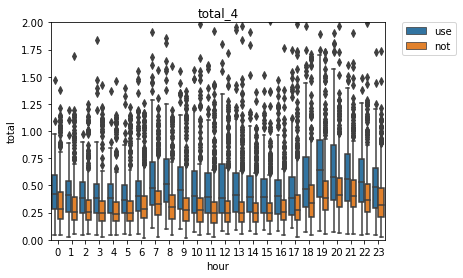

In [208]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_4')
plt.show()

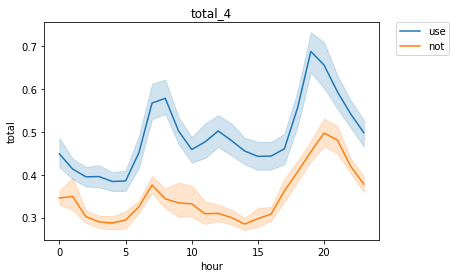

In [209]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_4')
plt.show()

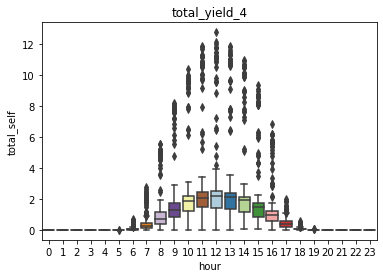

In [210]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_4, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_4')
plt.show()

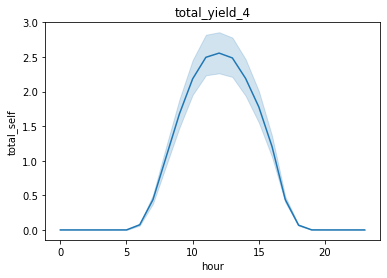

In [211]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_4)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_4')
plt.show()

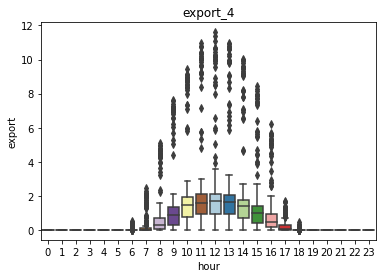

In [212]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_4, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_4')
plt.show()

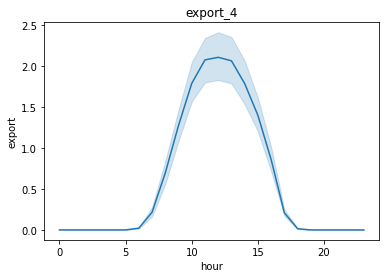

In [213]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_4)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_4')
plt.show()

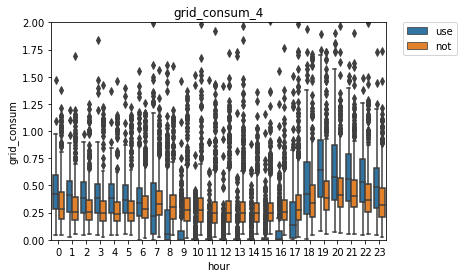

In [214]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_4')
plt.show()

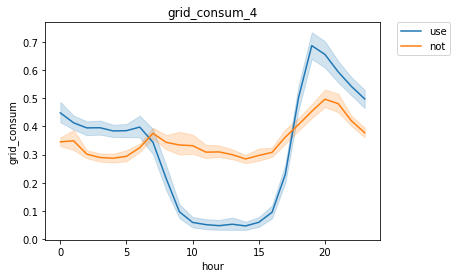

In [215]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_4')
plt.show()

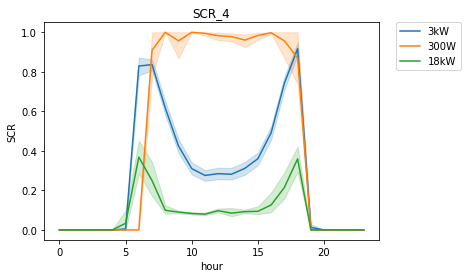

In [216]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_4')
plt.show()

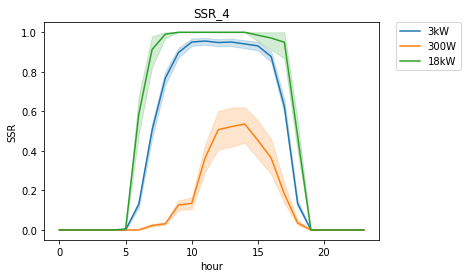

In [217]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_4')
plt.show()

<hr>

## **<계절>**

### 봄(Spring)

In [218]:
df_all_hour_spring = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [219]:
# 총 전력 소비량
df_all_hour_spring.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   2122.0  0.367082  0.387162  0.040039  0.199951  0.300049  0.440002   
     1   2130.0  0.338534  0.394481  0.049927  0.180176  0.270020  0.399902   
     2   2131.0  0.304453  0.222373  0.050003  0.170166  0.259766  0.379883   
     3   2134.0  0.289545  0.192580  0.020020  0.169922  0.250000  0.360107   
     4   2142.0  0.284845  0.196768  0.039917  0.169922  0.239990  0.350098   
     5   2133.0  0.295231  0.316951  0.040009  0.169922  0.240021  0.350098   
     6   2134.0  0.329961  0.385674  0.020020  0.190002  0.279785  0.390137   
     7   2130.0  0.387787  0.313120  0.010010  0.230087  0.330078  0.460022   
     8   2143.0  0.353277  0.322309  0.010010  0.200012  0.300049  0.420410   
     9   2133.0  0.339646  0.484229  0.020020  0.179993  0.280029  0.399902   
     10  2133.0  0.341583  0.418959  0.020020  0.170013  0.270020  0.399902   
     11  2126.0  0.335491  0.620039  0.020020  0.160004  0.259979  0.380127   
     12  2129.0  0.339153  0.408125  0.020004  0.169922  0.260254  0.390137   
     13  2129.0  0.318203  0.286545  0.039917  0.169922  0.260010  0.370117   
     14  2128.0  0.307289  0.238978  0.020020  0.169983  0.259979  0.370117   
     15  2126.0  0.317855  0.296697  0.019897  0.172607  0.260010  0.370117   
     16  2112.0  0.336181  0.404700  0.020020  0.187500  0.279785  0.392578   
     17  2115.0  0.407614  1.100638  0.020020  0.199951  0.290039  0.459961   
     18  2114.0  0.437007  0.349308  0.020020  0.229980  0.350098  0.530212   
     19  2118.0  0.499558  0.772891  0.039993  0.279999  0.390137  0.560059   
     20  2118.0  0.502886  0.374696  0.040039  0.309814  0.420166  0.579979   
     21  2109.0  0.521892  0.676788  0.049988  0.310059  0.429932  0.589844   
     22  2123.0  0.443429  0.250245  0.049927  0.280029  0.399994  0.540009   
     23  2128.0  0.397797  0.292116  0.030029  0.220032  0.339996  0.489990   
use  0    903.0  0.462052  0.306796  0.039978  0.260010  0.439941  0.619934   
     1    898.0  0.423313  0.342783  0.030029  0.250000  0.400085  0.559952   
     2    901.0  0.390753  0.206069  0.039978  0.239990  0.380127  0.519958   
     3    904.0  0.379666  0.215439  0.039978  0.229980  0.369995  0.490234   
     4    897.0  0.368279  0.187448  0.039978  0.229980  0.360107  0.500000   
     5    902.0  0.375346  0.198885  0.049988  0.230019  0.369751  0.489990   
     6    898.0  0.422434  0.284495  0.049805  0.230042  0.379883  0.529953   
     7    896.0  0.547153  0.355865  0.049500  0.309967  0.459839  0.689941   
     8    896.0  0.595089  0.450834  0.080078  0.340088  0.529785  0.739777   
     9    896.0  0.503881  0.307024  0.080078  0.280273  0.450134  0.669724   
     10   896.0  0.454377  0.267042  0.070312  0.239922  0.390106  0.619324   
     11   893.0  0.459934  0.303682  0.050537  0.239990  0.380127  0.600098   
     12   898.0  0.494237  0.426846  0.079956  0.250000  0.390137  0.640121   
     13   897.0  0.465556  0.294844  0.060059  0.250000  0.399902  0.610352   
     14   897.0  0.446497  0.253842  0.026428  0.250000  0.390137  0.580078   
     15   895.0  0.443686  0.372494  0.070312  0.240204  0.370605  0.550293   
     16   899.0  0.456322  0.400387  0.079041  0.240234  0.389893  0.567444   
     17   902.0  0.470091  0.301549  0.060791  0.250000  0.400101  0.600007   
     18   902.0  0.578783  0.357391  0.069336  0.310059  0.510254  0.759949   
     19   903.0  0.653800  0.402322  0.079956  0.365112  0.579987  0.870117   
     20   896.0  0.640539  0.392967  0.049988  0.370117  0.580017  0.859863   
     21   898.0  0.610017  0.345883  0.049988  0.350029  0.579834  0.820312   
     22   895.0  0.569221  0.321390  0.040039  0.349976  0.540039  0.760010   
     23   898.0  0.519802  0.307419  0.040039  0.299835  0.489990  0.699951   

               max  
type 시간             
not  0    9.00000

In [220]:
# 총 전력 생산량
df_all_hour_spring_use = df_all_hour_spring[df_all_hour_spring.type == 'use']
df_all_hour_spring_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   903.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   898.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   901.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   904.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   897.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   902.0  0.001900  0.008022  0.0  0.000000  0.000000  0.000000   0.149902
6   898.0  0.074593  0.150514  0.0  0.000000  0.020020  0.080078   1.330078
7   896.0  0.363267  0.543179  0.0  0.060059  0.179993  0.420044   3.500000
8   896.0  0.887962  1.130564  0.0  0.209961  0.580048  1.042480   6.370117
9   896.0  1.440354  1.735093  0.0  0.380310  1.100098  1.662598   8.669922
10  896.0  1.895196  2.160211  0.0  0.547729  1.580078  2.100098  10.740234
11  893.0  2.181699  2.492910  0.0  0.649902  1.820007  2.350098  11.939941
12  898.0  2.275835  2.541103  0.0  0.792480  1.989990  2.430176  12.759766
13  897.0  2.188680  2.491728  0.0  0.679688  1.919983  2.330078  12.140625
14  897.0  1.954266  2.271200  0.0  0.589844  1.719971  2.070068  11.279297
15  895.0  1.560032  1.839307  0.0  0.470215  1.300293  1.685059   9.430176
16  899.0  1.048236  1.310565  0.0  0.305145  0.750000  1.169922  11.000000
17  902.0  0.372686  0.361757  0.0  0.120117  0.279968  0.519958   2.579590
18  902.0  0.066114  0.104095  0.0  0.009979  0.030273  0.089844   1.336487
19  903.0  0.001315  0.008668  0.0  0.000000  0.000000  0.000000   0.226501
20  896.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  898.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  895.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  898.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [221]:
# 총 전력 수출량
df_all_hour_spring_use = df_all_hour_spring[df_all_hour_spring.type == 'use']
df_all_hour_spring_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   903.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   898.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   901.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   904.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   897.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   902.0  0.000233  0.003745  0.0  0.000000  0.000000  0.000000   0.100098
6   898.0  0.027155  0.110892  0.0  0.000000  0.000000  0.000000   1.180176
7   896.0  0.183853  0.481852  0.0  0.000000  0.000000  0.090027   3.189941
8   896.0  0.565834  1.073878  0.0  0.000000  0.170013  0.550003   5.779785
9   896.0  1.075912  1.643801  0.0  0.049988  0.669952  1.229980   7.910156
10  896.0  1.529415  2.044819  0.0  0.180054  1.145020  1.770020   9.840332
11  893.0  1.799366  2.360473  0.0  0.310059  1.409912  1.989990  10.968750
12  898.0  1.861311  2.383445  0.0  0.382385  1.505005  2.047363  11.601562
13  897.0  1.793365  2.374374  0.0  0.309937  1.430054  1.930176  11.378906
14  897.0  1.572603  2.142424  0.0  0.229980  1.219971  1.719971  10.289551
15  895.0  1.206894  1.742561  0.0  0.139282  0.839844  1.370117   8.780273
16  899.0  0.726961  1.201768  0.0  0.040039  0.349854  0.809937   6.940002
17  902.0  0.172869  0.323398  0.0  0.000000  0.029968  0.210022   2.310059
18  902.0  0.015257  0.063525  0.0  0.000000  0.000000  0.000000   0.649902
19  903.0  0.000007  0.000198  0.0  0.000000  0.000000  0.000000   0.005951
20  896.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  898.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  895.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  898.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [222]:
# 총 그리드 소비량
df_all_hour_spring.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   2122.0  0.367082  0.387162  0.040039  0.199951  0.300049  0.440002   
     1   2130.0  0.338534  0.394481  0.049927  0.180176  0.270020  0.399902   
     2   2131.0  0.304453  0.222373  0.050003  0.170166  0.259766  0.379883   
     3   2134.0  0.289545  0.192580  0.020020  0.169922  0.250000  0.360107   
     4   2142.0  0.284845  0.196768  0.039917  0.169922  0.239990  0.350098   
     5   2133.0  0.295231  0.316951  0.040009  0.169922  0.240021  0.350098   
     6   2134.0  0.329961  0.385674  0.020020  0.190002  0.279785  0.390137   
     7   2130.0  0.387787  0.313120  0.010010  0.230087  0.330078  0.460022   
     8   2143.0  0.353277  0.322309  0.010010  0.200012  0.300049  0.420410   
     9   2133.0  0.339646  0.484229  0.020020  0.179993  0.280029  0.399902   
     10  2133.0  0.341583  0.418959  0.020020  0.170013  0.270020  0.399902   
     11  2126.0  0.335491  0.620039  0.020020  0.160004  0.259979  0.380127   
     12  2129.0  0.339153  0.408125  0.020004  0.169922  0.260254  0.390137   
     13  2129.0  0.318203  0.286545  0.039917  0.169922  0.260010  0.370117   
     14  2128.0  0.307289  0.238978  0.020020  0.169983  0.259979  0.370117   
     15  2126.0  0.317855  0.296697  0.019897  0.172607  0.260010  0.370117   
     16  2112.0  0.336181  0.404700  0.020020  0.187500  0.279785  0.392578   
     17  2115.0  0.407614  1.100638  0.020020  0.199951  0.290039  0.459961   
     18  2114.0  0.437007  0.349308  0.020020  0.229980  0.350098  0.530212   
     19  2118.0  0.499558  0.772891  0.039993  0.279999  0.390137  0.560059   
     20  2118.0  0.502886  0.374696  0.040039  0.309814  0.420166  0.579979   
     21  2109.0  0.521892  0.676788  0.049988  0.310059  0.429932  0.589844   
     22  2123.0  0.443429  0.250245  0.049927  0.280029  0.399994  0.540009   
     23  2128.0  0.397797  0.292116  0.030029  0.220032  0.339996  0.489990   
use  0    903.0  0.462052  0.306796  0.039978  0.260010  0.439941  0.619934   
     1    898.0  0.420484  0.285666  0.030029  0.250000  0.400085  0.559952   
     2    901.0  0.390753  0.206069  0.039978  0.239990  0.380127  0.519958   
     3    904.0  0.379666  0.215439  0.039978  0.229980  0.369995  0.490234   
     4    897.0  0.368278  0.187445  0.039978  0.229980  0.360107  0.500000   
     5    902.0  0.373678  0.199086  0.029999  0.230011  0.360107  0.489990   
     6    898.0  0.374996  0.293507  0.000000  0.190002  0.330078  0.489990   
     7    896.0  0.367739  0.377315  0.000000  0.099854  0.270020  0.512505   
     8    896.0  0.272961  0.452028  0.000000  0.010010  0.119934  0.399963   
     9    896.0  0.139440  0.269605  0.000000  0.000000  0.010010  0.169922   
     10   896.0  0.088597  0.198212  0.000000  0.000000  0.000000  0.050049   
     11   893.0  0.077601  0.202086  0.000000  0.000000  0.000000  0.039795   
     12   898.0  0.079713  0.312488  0.000000  0.000000  0.000000  0.040039   
     13   897.0  0.070241  0.180338  0.000000  0.000000  0.000000  0.040039   
     14   897.0  0.064833  0.143124  0.000000  0.000000  0.000000  0.040039   
     15   895.0  0.090548  0.245421  0.000000  0.000000  0.000000  0.070068   
     16   899.0  0.135047  0.262131  0.000000  0.000000  0.020020  0.165039   
     17   902.0  0.270274  0.297156  0.000000  0.039978  0.189941  0.400116   
     18   902.0  0.527926  0.370305  0.000000  0.260010  0.479980  0.727539   
     19   903.0  0.652491  0.402642  0.079956  0.360016  0.579956  0.870117   
     20   896.0  0.640539  0.392967  0.049988  0.370117  0.580017  0.859863   
     21   898.0  0.610017  0.345883  0.049988  0.350029  0.579834  0.820312   
     22   895.0  0.569221  0.321390  0.040039  0.349976  0.540039  0.760010   
     23   898.0  0.519802  0.307419  0.040039  0.299835  0.489990  0.699951   

               max  
type 시간             
not  0    9.00000

In [223]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    92.0  0.153005  0.346252  0.000000  0.000000  0.000000   
         6    92.0  0.287007  0.288061  0.000000  0.000000  0.221360   
         7    92.0  0.252467  0.225854  0.000000  0.122700  0.163615   
         8    92.0  0.121439  0.124356  0.038627  0.073239  0.089706   
         9    92.0  0.099600  0.043642  0.058044  0.079011  0.088260   
         10   92.0  0.083607  0.018938  0.056452  0.075240  0.079575   
         11   92.0  0.084938  0.031041  0.049481  0.071095  0.078158   
         12   92.0  0.096081  0.033328  0.047008  0.083153  0.092432   
         13   92.0  0.084357  0.049177  0.037172  0.063088  0.078363   
         14   92.0  0.098055  0.043892  0.043606  0.079984  0.091727   
         15   92.0  0.097405  0.061261  0.045956  0.069248  0.080658   
         16   92.0  0.127234  0.122220  0.062908  0.083996  0.094765   
         17   92.0  0.235459  0.199344  0.086189  0.128422  0.160848   
         18   92.0  0.370596  0.288167  0.000000  0.189229  0.322257   
         19   92.0  0.065217  0.248262  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    85.0  0.129412  0.337647  0.000000  0.000000  0.000000   
         7    84.0  0.619048  0.488538  0.000000  0.000000  1.000000   
         8    85.0  0.894118  0.309513  0.000000  1.000000  1.000000   
         9    85.0  0.973530  0.154416  0.000000  1.000000  1.000000   
         10   85.0  0.999020  0.009039  0.916666  1.000000  1.000000   
         11   85.0  0.986471  0.053374  0.692247  1.000000  1.000000   
         12   85.0  0.950621  0.140829  0.000000  0.954546  1.000000   
         13   85.0  0.947105  0.141845  0.000000  0.958331  1.000000   
         14   85.0  0.930530  0.180142  0.000000  0.954549  1.000000   
         15   85.0  0.941177  0.174706  0.000000  0.956521  1.000000   
         16   85.0  0.972940  0.127233  0.000000  1.000000  1.000000   
         17   85.0  0.903221  0.293404  0.000000  1.000000  1.000000   
         18   85.0  0.576471  0.497050  0.000000  0.000000  1.000000   
         19   85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   726.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   725.0  0.110345  0.313535  0.000000  0.0

In [224]:
# SSR(자가공급률)
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    92.0  0.036134  0.102652  0.000000  0.000000  0.000000   
         6    92.0  0.483633  0.405685  0.000000  0.000000  0.444718   
         7    92.0  0.857900  0.261946  0.000000  0.811021  1.000000   
         8    92.0  0.976022  0.107588  0.124393  1.000000  1.000000   
         9    92.0  0.997885  0.014410  0.888889  1.000000  1.000000   
         10   92.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   92.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   92.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   92.0  0.998857  0.010959  0.894889  1.000000  1.000000   
         14   92.0  0.997758  0.016283  0.856140  1.000000  1.000000   
         15   92.0  0.981466  0.095273  0.288398  1.000000  1.000000   
         16   92.0  0.973975  0.117769  0.122418  1.000000  1.000000   
         17   92.0  0.910795  0.218597  0.054329  1.000000  1.000000   
         18   92.0  0.428529  0.349027  0.000000  0.067686  0.410329   
         19   92.0  0.004815  0.018698  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   92.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    85.0  0.004955  0.014462  0.000000  0.000000  0.000000   
         7    84.0  0.021443  0.026726  0.000000  0.000000  0.013378   
         8    85.0  0.035511  0.034193  0.000000  0.016637  0.026481   
         9    85.0  0.127908  0.093754  0.000000  0.055578  0.123073   
         10   85.0  0.198185  0.138228  0.015396  0.086950  0.170547   
         11   85.0  0.309770  0.205741  0.013326  0.108691  0.304163   
         12   85.0  0.458692  0.275971  0.000000  0.217396  0.437232   
         13   85.0  0.481145  0.303398  0.000000  0.200026  0.437953   
         14   85.0  0.476152  0.290372  0.000000  0.234536  0.468086   
         15   85.0  0.411496  0.297109  0.000000  0.148133  0.349206   
         16   85.0  0.324209  0.260180  0.000000  0.093012  0.258085   
         17   85.0  0.165856  0.163627  0.000000  0.047605  0.120002   
         18   85.0  0.036435  0.050131  0.000000  0.000000  0.017506   
         19   85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   85.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   84.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   726.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   725.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   727.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   720.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   725.0  0.004335  0.014917  0.000000  0.0

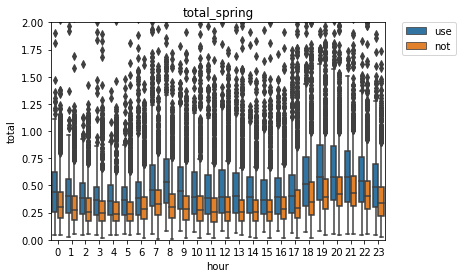

In [225]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_spring')
plt.show()

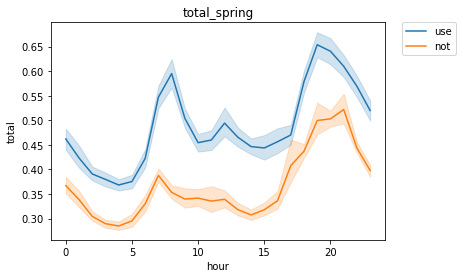

In [226]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_spring')
plt.show()

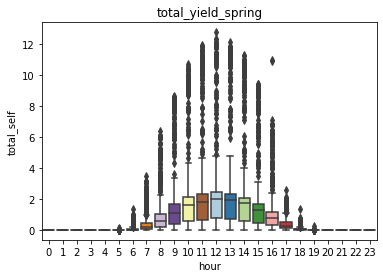

In [227]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_spring, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_spring')
plt.show()

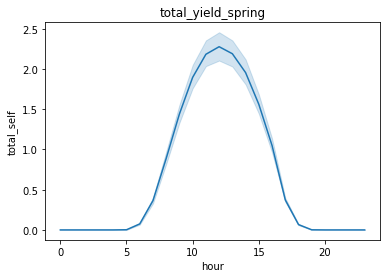

In [228]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_spring)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_spring')
plt.show()

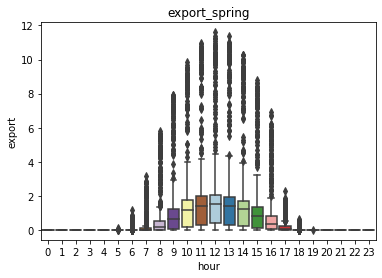

In [229]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_spring, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_spring')
plt.show()

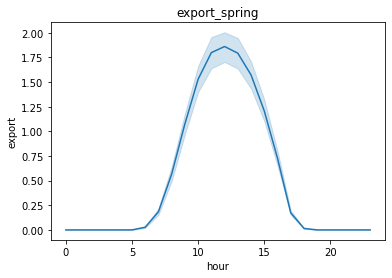

In [230]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_spring)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_spring')
plt.show()

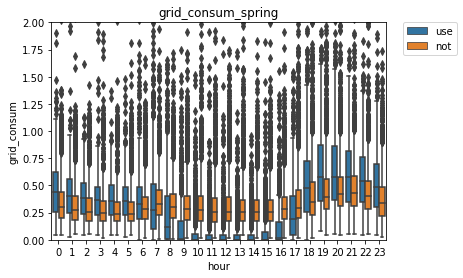

In [231]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_spring')
plt.show()

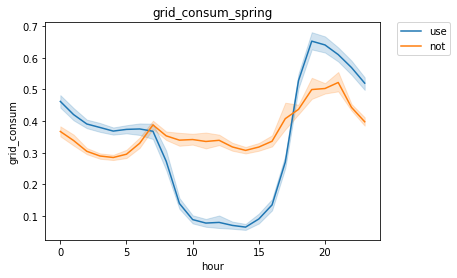

In [232]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_spring')
plt.show()

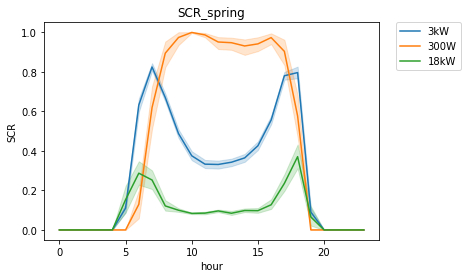

In [233]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_spring')
plt.show()

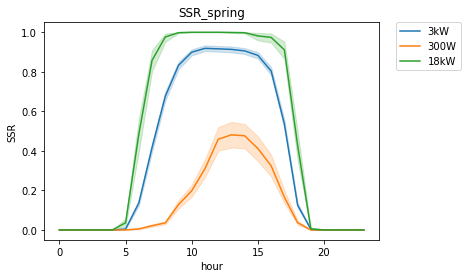

In [234]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_spring')
plt.show()

<hr>

### 여름(Summer)

In [235]:
df_all_hour_summer = df_all_hour[(df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') | (df_all_hour.ym == '2021/8')]

In [236]:
# 총 전력 소비량
df_all_hour_summer.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   2159.0  0.434052  0.470728  0.049988  0.219971  0.329956  0.549957   
     1   2167.0  0.384482  0.312847  0.049988  0.200012  0.299988  0.500000   
     2   2164.0  0.343255  0.222714  0.059998  0.190002  0.279984  0.440002   
     3   2161.0  0.322482  0.251068  0.059998  0.179993  0.260010  0.400024   
     4   2161.0  0.299366  0.188732  0.059998  0.170044  0.250000  0.369995   
     5   2143.0  0.293323  0.217881  0.049988  0.170044  0.239990  0.350098   
     6   2137.0  0.358034  1.186048  0.049988  0.190002  0.279907  0.400024   
     7   2143.0  0.412976  0.401175  0.059998  0.239990  0.339966  0.480011   
     8   2151.0  0.401943  0.331955  0.049988  0.220032  0.330078  0.480042   
     9   2153.0  0.399767  0.318873  0.040039  0.210022  0.339966  0.479980   
     10  2147.0  0.445654  0.994334  0.049988  0.200073  0.330017  0.500000   
     11  2166.0  0.492968  1.422212  0.049988  0.190002  0.329956  0.519981   
     12  2150.0  0.446126  0.440154  0.039978  0.190063  0.330017  0.530029   
     13  2160.0  0.655227  8.272812  0.039978  0.199951  0.340027  0.549942   
     14  2158.0  0.475587  0.969370  0.039978  0.200012  0.330048  0.529877   
     15  2154.0  0.452177  0.425760  0.049988  0.210022  0.339966  0.520020   
     16  2154.0  0.501327  0.939988  0.039978  0.220032  0.350098  0.559937   
     17  2152.0  0.516836  0.524833  0.059998  0.230011  0.380005  0.640015   
     18  2147.0  0.576283  0.554614  0.049988  0.250000  0.420044  0.709961   
     19  2162.0  0.619655  0.618959  0.059998  0.289978  0.460052  0.747513   
     20  2150.0  0.650138  0.609483  0.059998  0.349976  0.500000  0.760010   
     21  2162.0  0.631620  0.541343  0.059998  0.359985  0.509888  0.739990   
     22  2170.0  0.553101  0.405035  0.070007  0.309998  0.449951  0.679932   
     23  2150.0  0.473438  0.343875  0.059998  0.250000  0.380005  0.600037   
use  0    898.0  0.493898  0.323604  0.059998  0.260010  0.420044  0.630005   
     1    901.0  0.447725  0.305308  0.059998  0.250000  0.369995  0.559998   
     2    900.0  0.394997  0.225539  0.059998  0.239990  0.349976  0.500000   
     3    900.0  0.376651  0.220071  0.050003  0.229996  0.309998  0.489990   
     4    894.0  0.365329  0.210556  0.050018  0.220032  0.299995  0.479980   
     5    888.0  0.376533  0.218848  0.069794  0.230011  0.309998  0.470093   
     6    888.0  0.418200  0.351304  0.080017  0.240479  0.329983  0.529907   
     7    886.0  0.524174  0.468559  0.089844  0.289978  0.410126  0.659996   
     8    891.0  0.606707  0.536028  0.079559  0.349731  0.479980  0.710068   
     9    889.0  0.559422  0.434042  0.089996  0.319916  0.469971  0.669922   
     10   896.0  0.537904  0.374461  0.089783  0.280029  0.450073  0.669930   
     11   891.0  0.596010  0.545006  0.110046  0.289978  0.470024  0.745056   
     12   889.0  0.642896  0.500743  0.109985  0.299988  0.509888  0.800049   
     13   889.0  0.655719  0.529867  0.119934  0.320068  0.500122  0.780090   
     14   891.0  0.638013  0.544767  0.130005  0.309875  0.479980  0.750000   
     15   892.0  0.636750  0.694668  0.119324  0.290039  0.469986  0.739380   
     16   895.0  0.619787  0.522789  0.110245  0.300049  0.469971  0.699554   
     17   895.0  0.656177  0.518791  0.110001  0.314941  0.470093  0.799866   
     18   892.0  0.743555  0.560651  0.099762  0.357422  0.550018  0.942444   
     19   896.0  0.829777  0.638409  0.099792  0.387444  0.615021  1.070068   
     20   896.0  0.813200  0.575429  0.080002  0.419983  0.650024  1.050003   
     21   899.0  0.769416  0.517496  0.069977  0.410019  0.650024  0.989990   
     22   896.0  0.699036  0.485659  0.059998  0.387466  0.590057  0.879913   
     23   894.0  0.591050  0.411052  0.059998  0.309998  0.510010  0.739990   

                max  
type 시간              
not  0    10.59

In [237]:
# 총 전력 생산량
df_all_hour_summer_use = df_all_hour_summer[df_all_hour_summer.type == 'use']
df_all_hour_summer_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   898.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   901.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   900.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   900.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   894.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   888.0  0.006060  0.019034  0.0  0.000000  0.000000  0.010010   0.391602
6   888.0  0.132051  0.205258  0.0  0.010010  0.069885  0.149902   1.320312
7   886.0  0.445757  0.581527  0.0  0.109894  0.299927  0.469971   3.169922
8   891.0  0.893060  1.120131  0.0  0.264954  0.590088  1.000000   5.899902
9   889.0  1.336604  1.575702  0.0  0.399902  0.960022  1.540039   8.450195
10  896.0  1.686996  1.992740  0.0  0.590057  1.324951  1.829956  10.870117
11  891.0  1.863198  2.182907  0.0  0.684998  1.500000  2.010010  11.240234
12  889.0  1.957061  2.273185  0.0  0.750000  1.549927  2.109985  12.620117
13  889.0  1.919625  2.231699  0.0  0.689941  1.530029  2.020020  11.840332
14  891.0  1.687416  1.941551  0.0  0.619995  1.399902  1.840027  11.100037
15  892.0  1.375253  1.644690  0.0  0.447479  1.109985  1.510010  11.300049
16  895.0  0.966240  1.204837  0.0  0.300049  0.729980  1.089966   8.569946
17  895.0  0.476284  0.584109  0.0  0.165039  0.349976  0.599976   9.150024
18  892.0  0.140819  0.177667  0.0  0.039124  0.109924  0.170044   1.599243
19  896.0  0.009806  0.029233  0.0  0.000000  0.000000  0.010010   0.704712
20  896.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  899.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  896.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  894.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [238]:
# 총 전력 수출량
df_all_hour_summer_use = df_all_hour_summer[df_all_hour_summer.type == 'use']
df_all_hour_summer_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   898.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   901.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   900.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   900.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   894.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   888.0  0.000685  0.006649  0.0  0.000000  0.000000  0.000000   0.120117
6   888.0  0.048884  0.163430  0.0  0.000000  0.000000  0.000000   1.120117
7   886.0  0.228850  0.530681  0.0  0.000000  0.020020  0.140015   2.899902
8   891.0  0.564021  1.063069  0.0  0.000000  0.200073  0.540039   5.530273
9   889.0  0.950327  1.488983  0.0  0.040039  0.500000  1.089844   7.930176
10  896.0  1.269011  1.880214  0.0  0.130005  0.779999  1.392517   9.950195
11  891.0  1.402506  2.062496  0.0  0.195038  0.880005  1.535004  10.580078
12  889.0  1.464852  2.151137  0.0  0.219971  0.919922  1.599976  11.330078
13  889.0  1.421475  2.116551  0.0  0.199951  0.880005  1.539978  10.840332
14  891.0  1.215257  1.824251  0.0  0.140015  0.710083  1.390015   9.810059
15  892.0  0.934619  1.527489  0.0  0.050049  0.510010  1.060013   8.280273
16  895.0  0.589071  1.114320  0.0  0.010010  0.219971  0.590057   6.709961
17  895.0  0.205893  0.486766  0.0  0.000000  0.020020  0.169952   6.169922
18  892.0  0.030245  0.116690  0.0  0.000000  0.000000  0.000000   1.260254
19  896.0  0.000480  0.005743  0.0  0.000000  0.000000  0.000000   0.120148
20  896.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  899.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  896.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  894.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [239]:
# 총 그리드 소비량
df_all_hour_summer.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   2159.0  0.434052  0.470728  0.049988  0.219971  0.329956  0.549957   
     1   2167.0  0.384482  0.312847  0.049988  0.200012  0.299988  0.500000   
     2   2164.0  0.343255  0.222714  0.059998  0.190002  0.279984  0.440002   
     3   2161.0  0.322482  0.251068  0.059998  0.179993  0.260010  0.400024   
     4   2161.0  0.299366  0.188732  0.059998  0.170044  0.250000  0.369995   
     5   2143.0  0.293323  0.217881  0.049988  0.170044  0.239990  0.350098   
     6   2137.0  0.358034  1.186048  0.049988  0.190002  0.279907  0.400024   
     7   2143.0  0.412976  0.401175  0.059998  0.239990  0.339966  0.480011   
     8   2151.0  0.401943  0.331955  0.049988  0.220032  0.330078  0.480042   
     9   2153.0  0.399767  0.318873  0.040039  0.210022  0.339966  0.479980   
     10  2147.0  0.445654  0.994334  0.049988  0.200073  0.330017  0.500000   
     11  2166.0  0.492968  1.422212  0.049988  0.190002  0.329956  0.519981   
     12  2150.0  0.446126  0.440154  0.039978  0.190063  0.330017  0.530029   
     13  2160.0  0.655227  8.272812  0.039978  0.199951  0.340027  0.549942   
     14  2158.0  0.475587  0.969370  0.039978  0.200012  0.330048  0.529877   
     15  2154.0  0.452177  0.425760  0.049988  0.210022  0.339966  0.520020   
     16  2154.0  0.501327  0.939988  0.039978  0.220032  0.350098  0.559937   
     17  2152.0  0.516836  0.524833  0.059998  0.230011  0.380005  0.640015   
     18  2147.0  0.576283  0.554614  0.049988  0.250000  0.420044  0.709961   
     19  2162.0  0.619655  0.618959  0.059998  0.289978  0.460052  0.747513   
     20  2150.0  0.650138  0.609483  0.059998  0.349976  0.500000  0.760010   
     21  2162.0  0.631620  0.541343  0.059998  0.359985  0.509888  0.739990   
     22  2170.0  0.553101  0.405035  0.070007  0.309998  0.449951  0.679932   
     23  2150.0  0.473438  0.343875  0.059998  0.250000  0.380005  0.600037   
use  0    898.0  0.494289  0.324113  0.059998  0.260010  0.420044  0.630005   
     1    901.0  0.447859  0.305365  0.059998  0.250000  0.369995  0.559998   
     2    900.0  0.395073  0.225579  0.059998  0.239990  0.349976  0.500000   
     3    900.0  0.376651  0.220071  0.050003  0.229996  0.309998  0.489990   
     4    894.0  0.365329  0.210556  0.050018  0.220032  0.299995  0.479980   
     5    888.0  0.371158  0.218655  0.040009  0.229980  0.309998  0.469971   
     6    888.0  0.335033  0.359804  0.000000  0.160027  0.260010  0.440002   
     7    886.0  0.307266  0.477958  0.000000  0.042511  0.199951  0.430054   
     8    891.0  0.277669  0.537231  0.000000  0.000000  0.080078  0.365051   
     9    889.0  0.173145  0.373581  0.000000  0.000000  0.020020  0.209961   
     10   896.0  0.119919  0.267363  0.000000  0.000000  0.000000  0.109985   
     11   891.0  0.135318  0.390726  0.000000  0.000000  0.000000  0.119995   
     12   889.0  0.150687  0.338131  0.000000  0.000000  0.000000  0.139893   
     13   889.0  0.157569  0.353204  0.000000  0.000000  0.010010  0.140015   
     14   891.0  0.165854  0.362856  0.000000  0.000000  0.010010  0.170044   
     15   892.0  0.196116  0.454779  0.000000  0.000000  0.020020  0.229980   
     16   895.0  0.242618  0.413674  0.000000  0.000000  0.069946  0.309967   
     17   895.0  0.385786  0.482881  0.000000  0.049988  0.220001  0.540039   
     18   892.0  0.632981  0.567689  0.000000  0.230034  0.450073  0.850006   
     19   896.0  0.820451  0.639067  0.049988  0.369995  0.609985  1.060059   
     20   896.0  0.813335  0.575374  0.080002  0.419983  0.650024  1.050003   
     21   899.0  0.770393  0.518127  0.069977  0.410019  0.650024  0.989990   
     22   896.0  0.698609  0.480776  0.059998  0.387466  0.595032  0.880005   
     23   894.0  0.592196  0.416184  0.059998  0.309998  0.510010  0.739990   

                max  
type 시간              
not  0    10.59

In [240]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    92.0  0.342719  0.427507  0.000000  0.000000  0.000000   
         6    92.0  0.332523  0.238069  0.000000  0.151483  0.267888   
         7    91.0  0.183810  0.165563  0.000000  0.111557  0.140641   
         8    91.0  0.126349  0.096691  0.053010  0.084310  0.095811   
         9    92.0  0.110565  0.063567  0.000000  0.082012  0.096145   
         10   92.0  0.118218  0.120521  0.049898  0.082539  0.096618   
         11   92.0  0.114258  0.105608  0.053530  0.083025  0.097016   
         12   92.0  0.110245  0.101173  0.056732  0.078735  0.091760   
         13   92.0  0.106919  0.070932  0.046645  0.078530  0.093715   
         14   92.0  0.110260  0.057703  0.000000  0.084104  0.100241   
         15   92.0  0.146217  0.151763  0.039872  0.087355  0.109338   
         16   89.0  0.150632  0.104107  0.000000  0.096556  0.115980   
         17   89.0  0.256128  0.203364  0.000000  0.136049  0.178488   
         18   89.0  0.511820  0.294586  0.000000  0.259766  0.446078   
         19   89.0  0.368269  0.462093  0.000000  0.000000  0.000000   
         20   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.400000  0.492642  0.000000  0.000000  0.000000   
         7    90.0  0.822222  0.384467  0.000000  1.000000  1.000000   
         8    90.0  0.966667  0.180511  0.000000  1.000000  1.000000   
         9    90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   89.0  0.985683  0.106971  0.000000  1.000000  1.000000   
         11   89.0  0.983619  0.107197  0.000000  1.000000  1.000000   
         12   89.0  0.976064  0.110969  0.000000  1.000000  1.000000   
         13   90.0  0.979795  0.051932  0.739134  1.000000  1.000000   
         14   90.0  0.984313  0.045084  0.739134  1.000000  1.000000   
         15   90.0  0.969056  0.150955  0.000000  1.000000  1.000000   
         16   89.0  0.951622  0.208654  0.000000  1.000000  1.000000   
         17   89.0  0.953098  0.208333  0.000000  1.000000  1.000000   
         18   89.0  0.752809  0.433823  0.000000  1.000000  1.000000   
         19   89.0  0.089888  0.287641  0.000000  0.000000  0.000000   
         20   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   719.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   722.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   713.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   706.0  0.298630  0.457766  0.000000  0.0

In [241]:
# SSR(자가공급률)
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    92.0  0.088136  0.129328  0.000000  0.000000  0.000000   
         6    92.0  0.728972  0.311461  0.000000  0.567014  0.827135   
         7    91.0  0.938010  0.197095  0.000000  1.000000  1.000000   
         8    91.0  0.987573  0.050405  0.666893  1.000000  1.000000   
         9    92.0  0.988713  0.104290  0.000000  1.000000  1.000000   
         10   92.0  0.982687  0.117616  0.108770  1.000000  1.000000   
         11   92.0  0.979995  0.116739  0.072687  1.000000  1.000000   
         12   92.0  0.987683  0.095456  0.116316  1.000000  1.000000   
         13   92.0  0.994312  0.037049  0.665077  1.000000  1.000000   
         14   92.0  0.983826  0.109175  0.000000  1.000000  1.000000   
         15   92.0  0.968055  0.143348  0.027144  1.000000  1.000000   
         16   89.0  0.960577  0.160031  0.000000  1.000000  1.000000   
         17   89.0  0.938146  0.186117  0.000000  1.000000  1.000000   
         18   89.0  0.639896  0.347714  0.000000  0.353195  0.730731   
         19   89.0  0.043680  0.078678  0.000000  0.000000  0.000000   
         20   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.014093  0.019313  0.000000  0.000000  0.000000   
         7    90.0  0.033597  0.028771  0.000000  0.011901  0.024559   
         8    90.0  0.054022  0.048745  0.000000  0.019286  0.039412   
         9    90.0  0.137943  0.087415  0.006668  0.083326  0.124040   
         10   89.0  0.240982  0.151035  0.000000  0.131170  0.224994   
         11   89.0  0.272432  0.177972  0.000000  0.127669  0.250012   
         12   89.0  0.333875  0.227783  0.000000  0.140032  0.323075   
         13   90.0  0.368478  0.261700  0.014278  0.131079  0.359511   
         14   90.0  0.353870  0.240338  0.014711  0.156141  0.325230   
         15   90.0  0.306392  0.224487  0.000000  0.108150  0.273028   
         16   89.0  0.234890  0.185059  0.000000  0.080003  0.196425   
         17   89.0  0.139724  0.136484  0.000000  0.040010  0.093022   
         18   89.0  0.043434  0.055517  0.000000  0.005619  0.021283   
         19   89.0  0.000708  0.002444  0.000000  0.000000  0.000000   
         20   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   719.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   722.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   721.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   713.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   706.0  0.014464  0.032152  0.000000  0.0

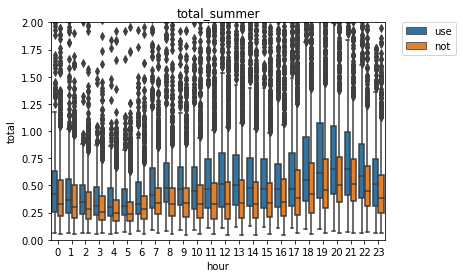

In [242]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_summer')
plt.show()

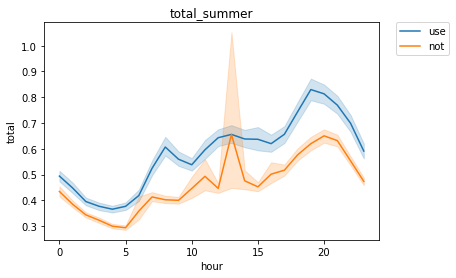

In [243]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_summer')
plt.show()

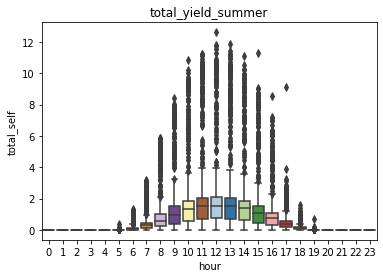

In [244]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_summer, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_summer')
plt.show()

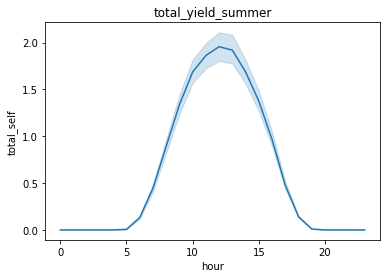

In [245]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_summer)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_summer')
plt.show()

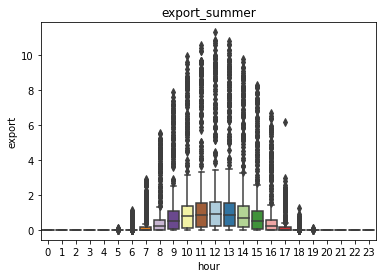

In [246]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_summer, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_summer')
plt.show()

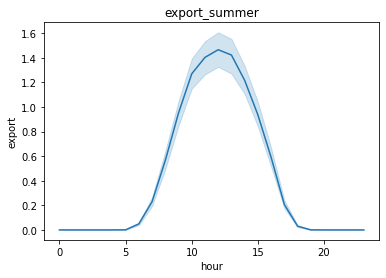

In [247]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_summer)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_summer')
plt.show()

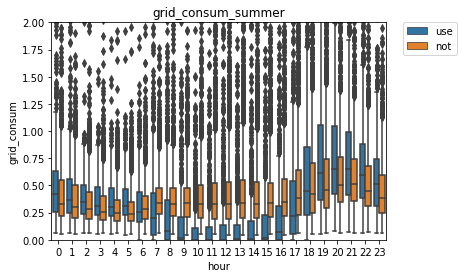

In [248]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_summer')
plt.show()

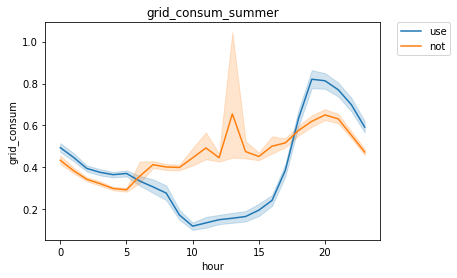

In [249]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_summer')
plt.show()

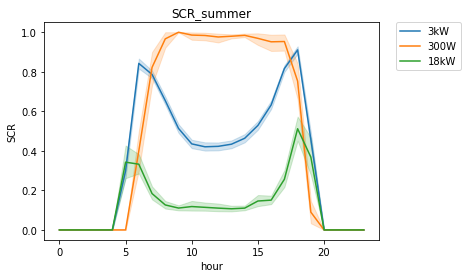

In [250]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_summer')
plt.show()

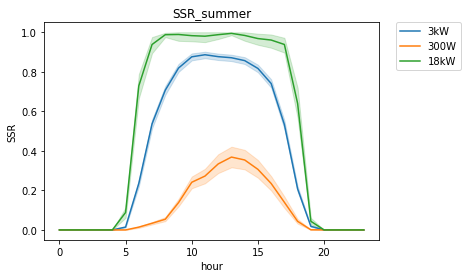

In [251]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_summer')
plt.show()

<hr>

### 가을(Autumn)

In [252]:
df_all_hour_autumn = df_all_hour[(df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') | (df_all_hour.ym == '2021/11')]

In [253]:
# 총 전력 소비량
df_all_hour_autumn.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   2170.0  0.368036  0.371625  0.029968  0.200073  0.300049  0.439941   
     1   2177.0  0.332767  0.238485  0.039978  0.190063  0.279907  0.390137   
     2   2174.0  0.307855  0.192784  0.030029  0.179932  0.270020  0.369995   
     3   2177.0  0.298804  0.213443  0.039978  0.170166  0.250000  0.350098   
     4   2169.0  0.288558  0.262533  0.030029  0.169983  0.239990  0.349854   
     5   2172.0  0.286953  0.264784  0.030029  0.169922  0.239990  0.340088   
     6   2165.0  0.314921  0.253177  0.029968  0.180176  0.260010  0.380005   
     7   2160.0  0.389399  0.444701  0.020020  0.229980  0.320007  0.449951   
     8   2178.0  0.372389  0.395521  0.019958  0.209961  0.319885  0.439941   
     9   2162.0  0.339281  0.317297  0.019958  0.189941  0.290039  0.409912   
     10  2164.0  0.329702  0.323590  0.029968  0.179932  0.279785  0.399902   
     11  2151.0  0.328967  0.324576  0.030029  0.169922  0.269897  0.380127   
     12  2155.0  0.347254  0.283591  0.020020  0.169922  0.270020  0.429932   
     13  2158.0  0.370560  0.943029  0.020020  0.170044  0.270020  0.410156   
     14  2152.0  0.359961  0.843739  0.019958  0.179932  0.279999  0.409912   
     15  2150.0  0.359289  0.483206  0.019958  0.179932  0.289917  0.409912   
     16  2151.0  0.368949  0.345462  0.020020  0.195068  0.300049  0.439941   
     17  2156.0  0.414492  0.436297  0.029968  0.209961  0.339966  0.489990   
     18  2151.0  0.486868  0.517234  0.030029  0.250000  0.390015  0.579956   
     19  2150.0  0.532672  0.481131  0.019958  0.290039  0.419922  0.599976   
     20  2143.0  0.501374  0.313839  0.049927  0.319946  0.430054  0.589966   
     21  2161.0  0.505775  0.336016  0.039978  0.329956  0.430054  0.599854   
     22  2164.0  0.465335  0.435004  0.020020  0.290039  0.389954  0.540039   
     23  2158.0  0.398580  0.297529  0.030029  0.229980  0.339844  0.489990   
use  0    896.0  0.488681  0.301822  0.050018  0.260010  0.449951  0.649902   
     1    893.0  0.437833  0.275420  0.049988  0.250000  0.389893  0.579956   
     2    897.0  0.400001  0.255891  0.049988  0.229980  0.349976  0.540039   
     3    888.0  0.376580  0.227874  0.049988  0.220078  0.339966  0.500000   
     4    892.0  0.370837  0.230421  0.040009  0.219971  0.339844  0.492493   
     5    892.0  0.373092  0.218777  0.049988  0.219971  0.329956  0.500000   
     6    890.0  0.426091  0.316841  0.050018  0.230103  0.359985  0.540039   
     7    890.0  0.515122  0.417745  0.078796  0.289917  0.420166  0.619873   
     8    891.0  0.571195  0.330792  0.080078  0.319885  0.489990  0.730164   
     9    900.0  0.503634  0.316894  0.089844  0.270020  0.429893  0.650208   
     10   897.0  0.475069  0.295370  0.079834  0.239990  0.400146  0.639893   
     11   891.0  0.486450  0.345926  0.079956  0.240112  0.390137  0.650269   
     12   887.0  0.524649  0.366938  0.109344  0.260010  0.439453  0.699493   
     13   890.0  0.507980  0.319295  0.080078  0.260132  0.450195  0.656921   
     14   897.0  0.483513  0.325874  0.080200  0.250000  0.419922  0.609863   
     15   896.0  0.453970  0.287906  0.089966  0.249878  0.399940  0.569977   
     16   900.0  0.464564  0.421494  0.070557  0.230103  0.390015  0.580093   
     17   896.0  0.544783  0.516121  0.069275  0.260010  0.449951  0.690063   
     18   892.0  0.635393  0.396497  0.049988  0.347412  0.570068  0.819824   
     19   892.0  0.677484  0.422655  0.049988  0.368744  0.599976  0.880005   
     20   894.0  0.654564  0.435852  0.050018  0.362579  0.579895  0.830078   
     21   888.0  0.654127  0.411706  0.050018  0.349976  0.579956  0.879883   
     22   895.0  0.639283  0.443212  0.049988  0.339966  0.550049  0.850098   
     23   895.0  0.567825  0.374226  0.049988  0.284973  0.519897  0.745117   

               max  
type 시간             
not  0   12.57006

In [254]:
# 총 전력 생산량
df_all_hour_autumn_use = df_all_hour_autumn[df_all_hour_autumn.type == 'use']
df_all_hour_autumn_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   896.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   893.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   897.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   888.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   892.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   892.0  0.000011  0.000335  0.000000  0.000000  0.000000  0.000000   
6   890.0  0.008175  0.026005  0.000000  0.000000  0.000000  0.010010   
7   890.0  0.181901  0.275183  0.000000  0.020020  0.090088  0.219971   
8   891.0  0.693925  0.876102  0.000000  0.189941  0.469971  0.800049   
9   900.0  1.285166  1.498265  0.000000  0.380127  1.005005  1.492493   
10  897.0  1.696352  1.942018  0.000000  0.589966  1.399902  1.879883   
11  891.0  1.926959  2.216084  0.019897  0.640015  1.629883  2.090088   
12  887.0  1.943370  2.157801  0.009995  0.650146  1.689941  2.150024   
13  890.0  1.805954  2.051648  0.009995  0.579895  1.479980  2.020020   
14  897.0  1.535411  1.809153  0.000000  0.450195  1.219971  1.719971   
15  896.0  1.056792  1.319811  0.000000  0.280029  0.765015  1.260010   
16  900.0  0.451725  0.592444  0.000000  0.100098  0.260010  0.602783   
17  896.0  0.108758  0.472239  0.000000  0.000000  0.020020  0.109863   
18  892.0  0.003636  0.014505  0.000000  0.000000  0.000000  0.000000   
19  892.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  894.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  888.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  895.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  895.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.010010  
6    0.399414  
7    1.799805  
8    5.050781  
9    7.720703  
10   9.930664  
11  14.270508  
12  11.460938  
13  10.879883  
14  10.650146  
15   8.189453  
16   7.390137  
17  12.609985  
18   0.260010  
19   0.000000  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [255]:
# 총 전력 수출량
df_all_hour_autumn_use = df_all_hour_autumn[df_all_hour_autumn.type == 'use']
df_all_hour_autumn_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   896.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   893.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   897.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   888.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   892.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   892.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
6   890.0  0.001347  0.012437  0.0  0.000000  0.000000  0.000000   0.299805
7   890.0  0.076665  0.234481  0.0  0.000000  0.000000  0.020020   1.580078
8   891.0  0.411736  0.834333  0.0  0.000000  0.109985  0.359985   4.589844
9   900.0  0.933566  1.415703  0.0  0.049988  0.549927  1.059937   7.089844
10  897.0  1.326681  1.843121  0.0  0.200073  0.960083  1.459961   9.250000
11  891.0  1.540927  2.094923  0.0  0.260010  1.170044  1.695007  12.930664
12  887.0  1.521667  2.034193  0.0  0.209961  1.159912  1.719971  10.330078
13  890.0  1.401437  1.940602  0.0  0.189941  1.020020  1.600067  10.160156
14  897.0  1.161412  1.708604  0.0  0.099976  0.740112  1.320068   9.149902
15  896.0  0.746960  1.252858  0.0  0.020020  0.330078  0.880035   7.439453
16  900.0  0.248288  0.485576  0.0  0.000000  0.030029  0.319977   3.309570
17  896.0  0.037399  0.223708  0.0  0.000000  0.000000  0.000000   4.760010
18  892.0  0.000381  0.005684  0.0  0.000000  0.000000  0.000000   0.129883
19  892.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
20  894.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  888.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  895.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  895.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [256]:
# 총 그리드 소비량
df_all_hour_autumn.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   2170.0  0.368036  0.371625  0.029968  0.200073  0.300049  0.439941   
     1   2177.0  0.332767  0.238485  0.039978  0.190063  0.279907  0.390137   
     2   2174.0  0.307855  0.192784  0.030029  0.179932  0.270020  0.369995   
     3   2177.0  0.298804  0.213443  0.039978  0.170166  0.250000  0.350098   
     4   2169.0  0.288558  0.262533  0.030029  0.169983  0.239990  0.349854   
     5   2172.0  0.286953  0.264784  0.030029  0.169922  0.239990  0.340088   
     6   2165.0  0.314921  0.253177  0.029968  0.180176  0.260010  0.380005   
     7   2160.0  0.389399  0.444701  0.020020  0.229980  0.320007  0.449951   
     8   2178.0  0.372389  0.395521  0.019958  0.209961  0.319885  0.439941   
     9   2162.0  0.339281  0.317297  0.019958  0.189941  0.290039  0.409912   
     10  2164.0  0.329702  0.323590  0.029968  0.179932  0.279785  0.399902   
     11  2151.0  0.328967  0.324576  0.030029  0.169922  0.269897  0.380127   
     12  2155.0  0.347254  0.283591  0.020020  0.169922  0.270020  0.429932   
     13  2158.0  0.370560  0.943029  0.020020  0.170044  0.270020  0.410156   
     14  2152.0  0.359961  0.843739  0.019958  0.179932  0.279999  0.409912   
     15  2150.0  0.359289  0.483206  0.019958  0.179932  0.289917  0.409912   
     16  2151.0  0.368949  0.345462  0.020020  0.195068  0.300049  0.439941   
     17  2156.0  0.414492  0.436297  0.029968  0.209961  0.339966  0.489990   
     18  2151.0  0.486868  0.517234  0.030029  0.250000  0.390015  0.579956   
     19  2150.0  0.532672  0.481131  0.019958  0.290039  0.419922  0.599976   
     20  2143.0  0.501374  0.313839  0.049927  0.319946  0.430054  0.589966   
     21  2161.0  0.505775  0.336016  0.039978  0.329956  0.430054  0.599854   
     22  2164.0  0.465335  0.435004  0.020020  0.290039  0.389954  0.540039   
     23  2158.0  0.398580  0.297529  0.030029  0.229980  0.339844  0.489990   
use  0    896.0  0.488681  0.301822  0.050018  0.260010  0.449951  0.649902   
     1    893.0  0.437833  0.275420  0.049988  0.250000  0.389893  0.579956   
     2    897.0  0.400001  0.255891  0.049988  0.229980  0.349976  0.540039   
     3    888.0  0.376580  0.227874  0.049988  0.220078  0.339966  0.500000   
     4    892.0  0.370837  0.230421  0.040009  0.219971  0.339844  0.492493   
     5    892.0  0.373081  0.218755  0.049988  0.219971  0.329956  0.500000   
     6    890.0  0.419263  0.316982  0.029999  0.229980  0.349976  0.539795   
     7    890.0  0.409886  0.424113  0.000000  0.162598  0.320007  0.530029   
     8    891.0  0.289005  0.342909  0.000000  0.020020  0.170044  0.439941   
     9    900.0  0.152034  0.276766  0.000000  0.000000  0.010010  0.209961   
     10   897.0  0.105398  0.228584  0.000000  0.000000  0.000000  0.090088   
     11   891.0  0.100417  0.247326  0.000000  0.000000  0.000000  0.070068   
     12   887.0  0.102946  0.231092  0.000000  0.000000  0.000000  0.070068   
     13   890.0  0.103464  0.229059  0.000000  0.000000  0.000000  0.087402   
     14   897.0  0.109515  0.235358  0.000000  0.000000  0.009949  0.099976   
     15   896.0  0.144138  0.239401  0.000000  0.000000  0.030029  0.199951   
     16   900.0  0.261127  0.329766  0.000000  0.030029  0.159912  0.399902   
     17   896.0  0.473423  0.391489  0.000000  0.190002  0.380066  0.630035   
     18   892.0  0.632141  0.397154  0.049988  0.340088  0.569946  0.810059   
     19   892.0  0.677487  0.422653  0.049988  0.368744  0.599976  0.880005   
     20   894.0  0.654566  0.435851  0.050018  0.362579  0.579895  0.830078   
     21   888.0  0.654129  0.411704  0.050018  0.349976  0.579956  0.879883   
     22   895.0  0.639285  0.443211  0.049988  0.339966  0.550049  0.850098   
     23   895.0  0.567827  0.374226  0.049988  0.284973  0.519897  0.745117   

               max  
type 시간             
not  0   12.57006

In [257]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    91.0  0.317409  0.410592  0.000000  0.000000  0.000000   
         7    91.0  0.217610  0.176977  0.000000  0.121952  0.167897   
         8    91.0  0.114638  0.106202  0.000000  0.081853  0.092598   
         9    91.0  0.111230  0.102503  0.036874  0.083431  0.093439   
         10   90.0  0.107498  0.118067  0.042635  0.070128  0.083192   
         11   91.0  0.101788  0.094595  0.039248  0.077796  0.083260   
         12   91.0  0.105217  0.066465  0.059879  0.082427  0.093446   
         13   91.0  0.113047  0.112422  0.054996  0.077515  0.091984   
         14   91.0  0.113449  0.096632  0.040873  0.083042  0.094179   
         15   91.0  0.114413  0.076373  0.047828  0.081611  0.096993   
         16   91.0  0.179308  0.107693  0.000000  0.121022  0.143275   
         17   91.0  0.331676  0.333051  0.000000  0.000000  0.269485   
         18   91.0  0.148482  0.343267  0.000000  0.000000  0.000000   
         19   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    91.0  0.318681  0.468547  0.000000  0.000000  0.000000   
         8    91.0  0.846154  0.362800  0.000000  1.000000  1.000000   
         9    91.0  0.956044  0.206133  0.000000  1.000000  1.000000   
         10   91.0  0.989011  0.104828  0.000000  1.000000  1.000000   
         11   91.0  0.988668  0.033656  0.857123  1.000000  1.000000   
         12   90.0  0.964529  0.072089  0.642854  0.949998  1.000000   
         13   91.0  0.966842  0.071649  0.588230  0.975610  1.000000   
         14   91.0  0.945199  0.160070  0.000000  1.000000  1.000000   
         15   91.0  0.943336  0.206432  0.000000  1.000000  1.000000   
         16   91.0  0.886251  0.313676  0.000000  1.000000  1.000000   
         17   91.0  0.362637  0.483425  0.000000  0.000000  0.000000   
         18   90.0  0.055556  0.230345  0.000000  0.000000  0.000000   
         19   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   714.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   710.0  0.001408  0.037529  0.000000  0.0

In [258]:
# SSR(자가공급률)
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    91.0  0.095782  0.151962  0.000000  0.000000  0.000000   
         7    91.0  0.756066  0.283031  0.000000  0.587588  0.846640   
         8    91.0  0.974329  0.142690  0.000000  1.000000  1.000000   
         9    91.0  0.988889  0.101672  0.030540  1.000000  1.000000   
         10   90.0  0.982249  0.094137  0.274564  1.000000  1.000000   
         11   91.0  0.988180  0.071993  0.400244  1.000000  1.000000   
         12   91.0  0.992474  0.050603  0.634105  1.000000  1.000000   
         13   91.0  0.985912  0.103964  0.068244  1.000000  1.000000   
         14   91.0  0.989441  0.074282  0.369408  1.000000  1.000000   
         15   91.0  0.986963  0.080457  0.274564  1.000000  1.000000   
         16   91.0  0.944207  0.159536  0.000000  1.000000  1.000000   
         17   91.0  0.394018  0.392769  0.000000  0.000000  0.196199   
         18   91.0  0.024495  0.068188  0.000000  0.000000  0.000000   
         19   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    91.0  0.009437  0.018619  0.000000  0.000000  0.000000   
         8    91.0  0.027164  0.021940  0.000000  0.011395  0.023282   
         9    91.0  0.098446  0.065532  0.000000  0.039636  0.093735   
         10   91.0  0.140949  0.101661  0.000000  0.056731  0.115441   
         11   91.0  0.254361  0.161530  0.020202  0.108211  0.219941   
         12   90.0  0.403103  0.253956  0.013877  0.209561  0.371822   
         13   91.0  0.389863  0.264021  0.023127  0.159746  0.341059   
         14   91.0  0.363523  0.259407  0.000000  0.142167  0.305140   
         15   91.0  0.278449  0.206287  0.000000  0.120825  0.263149   
         16   91.0  0.131670  0.152787  0.000000  0.037056  0.074089   
         17   91.0  0.037044  0.079103  0.000000  0.000000  0.000000   
         18   90.0  0.002996  0.014161  0.000000  0.000000  0.000000   
         19   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   91.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   714.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   711.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   715.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   710.0  0.000017  0.000464  0.000000  0.0

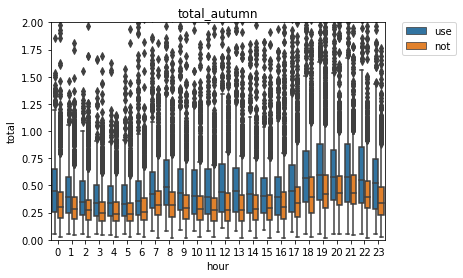

In [259]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_autumn')
plt.show()

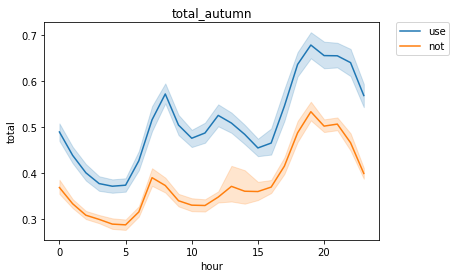

In [260]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_autumn')
plt.show()

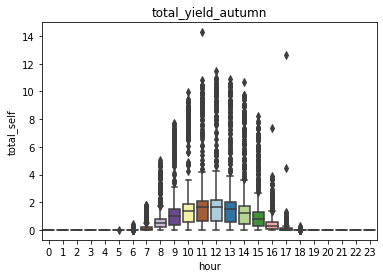

In [261]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_autumn, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_autumn')
plt.show()

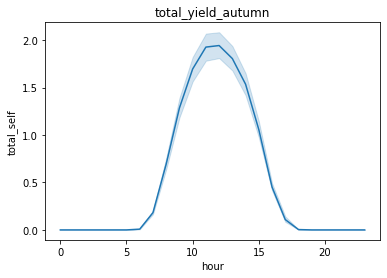

In [262]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_autumn)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_autumn')
plt.show()

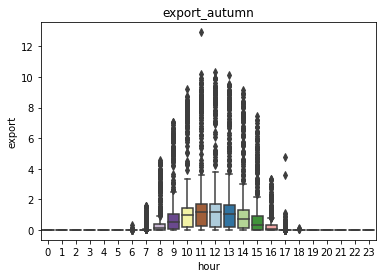

In [263]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_autumn, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_autumn')
plt.show()

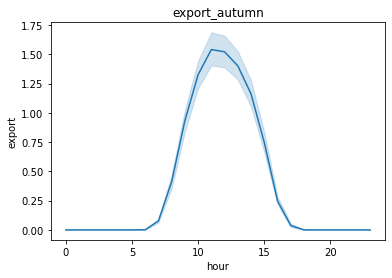

In [264]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_autumn)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_autumn')
plt.show()

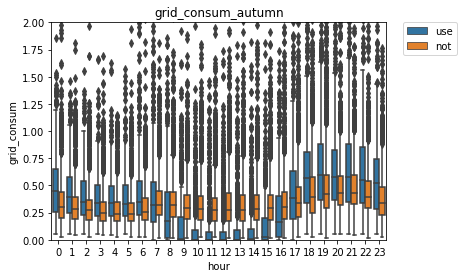

In [265]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_autumn')
plt.show()

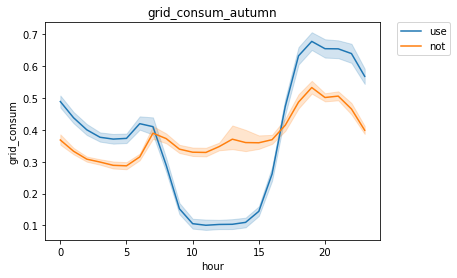

In [266]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_autumn')
plt.show()

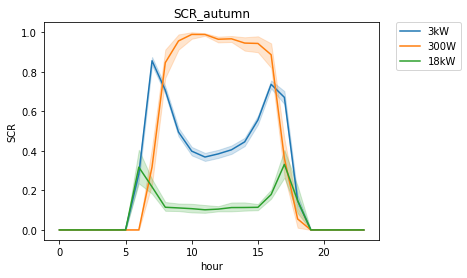

In [267]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_autumn')
plt.show()

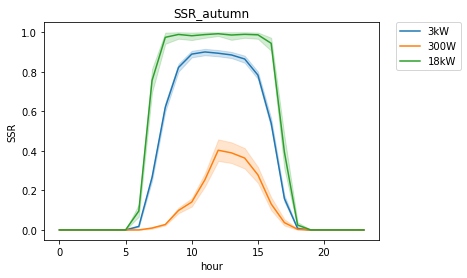

In [268]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_autumn')
plt.show()

<hr>

### 겨울(Winter)

In [269]:
df_all_hour_winter = df_all_hour[(df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') | (df_all_hour.ym == '2022/2')]

In [270]:
# 총 전력 소비량
df_all_hour_winter.groupby(['type', '시간']).describe()['전력소비량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   2179.0  0.408406  0.288750  0.019897  0.229980  0.359863  0.500000   
     1   2177.0  0.371779  0.270499  0.019897  0.210205  0.329956  0.449951   
     2   2179.0  0.350834  0.240900  0.040039  0.200073  0.309937  0.419922   
     3   2181.0  0.334294  0.207174  0.020020  0.199951  0.299927  0.409912   
     4   2179.0  0.330995  0.267135  0.020020  0.199951  0.289917  0.400146   
     5   2169.0  0.329609  0.320743  0.029907  0.189941  0.280029  0.399902   
     6   2181.0  0.353549  0.299172  0.020020  0.209961  0.299805  0.420166   
     7   2176.0  0.424769  0.374112  0.010010  0.250000  0.359924  0.510010   
     8   2175.0  0.415425  0.470877  0.019958  0.229980  0.339966  0.479980   
     9   2177.0  0.395168  0.516757  0.020020  0.209961  0.310059  0.439941   
     10  2184.0  0.393808  0.579199  0.010010  0.199951  0.300049  0.439941   
     11  2183.0  0.369873  0.402817  0.020020  0.180176  0.290039  0.429932   
     12  2177.0  0.381100  0.408676  0.010010  0.189941  0.300049  0.449951   
     13  2172.0  0.412061  1.845409  0.010010  0.189941  0.299866  0.449951   
     14  2170.0  0.377127  0.432572  0.019897  0.189941  0.300049  0.439941   
     15  2178.0  0.380675  0.516555  0.020020  0.192627  0.309814  0.439941   
     16  2181.0  0.440700  0.961164  0.019958  0.209961  0.330078  0.489990   
     17  2177.0  0.485052  0.447397  0.019897  0.239990  0.380127  0.560059   
     18  2154.0  0.552885  0.468980  0.019897  0.289917  0.439941  0.639893   
     19  2168.0  0.583615  0.636845  0.030029  0.320038  0.459961  0.629883   
     20  2169.0  0.558951  0.474542  0.020020  0.339844  0.469971  0.639648   
     21  2148.0  0.557075  0.473029  0.049927  0.349976  0.479980  0.640137   
     22  2178.0  0.513528  0.386712  0.020020  0.310059  0.449951  0.610107   
     23  2182.0  0.451226  0.453588  0.020020  0.260010  0.390137  0.549988   
use  0    886.0  0.565121  0.299868  0.029968  0.360107  0.560059  0.767426   
     1    888.0  0.508658  0.320174  0.049988  0.330078  0.500000  0.669983   
     2    890.0  0.473168  0.243401  0.039978  0.310059  0.450195  0.629974   
     3    889.0  0.448143  0.223216  0.030029  0.309937  0.439941  0.570312   
     4    890.0  0.453818  0.277194  0.049988  0.310059  0.439941  0.580078   
     5    891.0  0.446527  0.246885  0.029968  0.290039  0.420044  0.569824   
     6    881.0  0.492668  0.309716  0.049988  0.280029  0.449951  0.609863   
     7    879.0  0.605202  0.638897  0.049561  0.320068  0.500000  0.740112   
     8    884.0  0.700329  0.419562  0.071472  0.399994  0.620056  0.919922   
     9    882.0  0.673725  0.477251  0.081055  0.340088  0.589722  0.900146   
     10   878.0  0.628899  0.575838  0.079834  0.310036  0.559998  0.807465   
     11   878.0  0.601584  0.432832  0.090088  0.290184  0.549850  0.790009   
     12   880.0  0.602571  0.395021  0.079834  0.310025  0.540161  0.790039   
     13   878.0  0.591220  0.364677  0.079834  0.309990  0.529869  0.799561   
     14   875.0  0.569825  0.351474  0.080078  0.329834  0.519531  0.729980   
     15   885.0  0.551562  0.343565  0.070068  0.309814  0.489868  0.709961   
     16   887.0  0.567295  0.576413  0.060547  0.279541  0.479736  0.719971   
     17   883.0  0.658662  0.442274  0.057556  0.364990  0.589844  0.879883   
     18   885.0  0.776623  0.454067  0.079987  0.489990  0.709961  1.040039   
     19   885.0  0.807422  0.566541  0.069946  0.469971  0.719971  1.100098   
     20   886.0  0.762466  0.469608  0.070007  0.449982  0.699951  1.037170   
     21   877.0  0.731757  0.395544  0.039978  0.469971  0.700073  0.959961   
     22   885.0  0.690644  0.363515  0.040039  0.430054  0.679932  0.910156   
     23   884.0  0.642373  0.388963  0.039978  0.418701  0.630127  0.842651   

               max  
type 시간             
not  0    5.16992

In [271]:
# 총 전력 생산량
df_all_hour_winter_use = df_all_hour_winter[df_all_hour_winter.type == 'use']
df_all_hour_winter_use.groupby(['시간']).describe()['발전량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
시간                                                                      
0   886.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   888.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   890.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   889.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   890.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   891.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   881.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   879.0  0.018073  0.050500  0.000000  0.000000  0.000000  0.010010   
8   884.0  0.368873  0.529755  0.000000  0.070068  0.189941  0.409912   
9   882.0  1.079029  1.246672  0.000000  0.320068  0.770020  1.270020   
10  878.0  1.668483  1.839931  0.000000  0.622620  1.345093  1.820068   
11  878.0  2.090632  2.264036  0.000000  0.882568  1.760010  2.107422   
12  880.0  2.238514  2.442188  0.000000  0.959961  1.829956  2.232666   
13  878.0  2.144717  2.399902  0.000000  0.852173  1.785034  2.170105   
14  875.0  1.871420  2.225126  0.009995  0.615112  1.469971  1.900146   
15  885.0  1.297447  1.646827  0.000000  0.329834  0.879883  1.410156   
16  887.0  0.438320  0.685485  0.000000  0.070068  0.209961  0.534912   
17  883.0  0.057482  0.280594  0.000000  0.000000  0.010010  0.050049   
18  885.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19  885.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  886.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  877.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  885.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  884.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          max  
시간             
0    0.000000  
1    0.000000  
2    0.000000  
3    0.000000  
4    0.000000  
5    0.000000  
6    0.000000  
7    0.509766  
8    3.048828  
9    6.359375  
10   9.169922  
11  10.759766  
12  11.900391  
13  11.861328  
14  18.259766  
15  10.969971  
16   7.850098  
17   7.679932  
18   0.000000  
19   0.000000  
20   0.000000  
21   0.000000  
22   0.000000  
23   0.000000

In [272]:
# 총 전력 수출량
df_all_hour_winter_use = df_all_hour_winter[df_all_hour_winter.type == 'use']
df_all_hour_winter_use.groupby(['시간']).describe()['잉여전력량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std  min       25%       50%       75%        max
시간                                                                         
0   886.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   888.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   890.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   889.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   890.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   891.0  0.000073  0.002192  0.0  0.000000  0.000000  0.000000   0.065430
6   881.0  0.000074  0.002204  0.0  0.000000  0.000000  0.000000   0.065430
7   879.0  0.005523  0.031644  0.0  0.000000  0.000000  0.000000   0.390625
8   884.0  0.182129  0.493742  0.0  0.000000  0.000000  0.050049   2.759766
9   882.0  0.680165  1.218118  0.0  0.020020  0.250000  0.630127   5.781250
10  878.0  1.198417  1.777020  0.0  0.199951  0.720337  1.219971   8.511719
11  878.0  1.598029  2.177133  0.0  0.379883  1.119873  1.580078  10.150391
12  880.0  1.730713  2.352826  0.0  0.417480  1.239990  1.719971  11.201172
13  878.0  1.642192  2.300089  0.0  0.342529  1.169922  1.649902  11.068359
14  875.0  1.404106  2.134182  0.0  0.199951  0.880127  1.395020  16.799805
15  885.0  0.913415  1.572635  0.0  0.030029  0.419922  0.949951   9.610107
16  887.0  0.245119  0.580811  0.0  0.000000  0.019775  0.219971   4.019531
17  883.0  0.019422  0.180916  0.0  0.000000  0.000000  0.000000   5.099976
18  885.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
19  885.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
20  886.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  877.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  885.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  884.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [273]:
# 총 그리드 소비량
df_all_hour_winter.groupby(['type', '시간']).describe()['수전전력량(kWh)']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   2179.0  0.408406  0.288750  0.019897  0.229980  0.359863  0.500000   
     1   2177.0  0.371779  0.270499  0.019897  0.210205  0.329956  0.449951   
     2   2179.0  0.350834  0.240900  0.040039  0.200073  0.309937  0.419922   
     3   2181.0  0.334294  0.207174  0.020020  0.199951  0.299927  0.409912   
     4   2179.0  0.330995  0.267135  0.020020  0.199951  0.289917  0.400146   
     5   2169.0  0.329609  0.320743  0.029907  0.189941  0.280029  0.399902   
     6   2181.0  0.353549  0.299172  0.020020  0.209961  0.299805  0.420166   
     7   2176.0  0.424769  0.374112  0.010010  0.250000  0.359924  0.510010   
     8   2175.0  0.415425  0.470877  0.019958  0.229980  0.339966  0.479980   
     9   2177.0  0.395168  0.516757  0.020020  0.209961  0.310059  0.439941   
     10  2184.0  0.393808  0.579199  0.010010  0.199951  0.300049  0.439941   
     11  2183.0  0.369873  0.402817  0.020020  0.180176  0.290039  0.429932   
     12  2177.0  0.381100  0.408676  0.010010  0.189941  0.300049  0.449951   
     13  2172.0  0.412061  1.845409  0.010010  0.189941  0.299866  0.449951   
     14  2170.0  0.377127  0.432572  0.019897  0.189941  0.300049  0.439941   
     15  2178.0  0.380675  0.516555  0.020020  0.192627  0.309814  0.439941   
     16  2181.0  0.440700  0.961164  0.019958  0.209961  0.330078  0.489990   
     17  2177.0  0.485052  0.447397  0.019897  0.239990  0.380127  0.560059   
     18  2154.0  0.552885  0.468980  0.019897  0.289917  0.439941  0.639893   
     19  2168.0  0.583615  0.636845  0.030029  0.320038  0.459961  0.629883   
     20  2169.0  0.558951  0.474542  0.020020  0.339844  0.469971  0.639648   
     21  2148.0  0.557075  0.473029  0.049927  0.349976  0.479980  0.640137   
     22  2178.0  0.513528  0.386712  0.020020  0.310059  0.449951  0.610107   
     23  2182.0  0.451226  0.453588  0.020020  0.260010  0.390137  0.549988   
use  0    886.0  0.565194  0.299777  0.029968  0.360107  0.560059  0.767426   
     1    888.0  0.508732  0.320101  0.049988  0.330078  0.500000  0.669983   
     2    890.0  0.473242  0.243316  0.039978  0.310059  0.450195  0.629974   
     3    889.0  0.448217  0.223131  0.030029  0.309937  0.439941  0.570312   
     4    890.0  0.453891  0.277125  0.049988  0.310059  0.439941  0.580078   
     5    891.0  0.446601  0.246809  0.029968  0.290039  0.420044  0.569824   
     6    881.0  0.492742  0.309644  0.049988  0.280029  0.449951  0.609863   
     7    879.0  0.592653  0.640527  0.010010  0.310059  0.489990  0.729980   
     8    884.0  0.513585  0.431360  0.000000  0.200043  0.420166  0.729980   
     9    882.0  0.274861  0.432424  0.000000  0.010010  0.119629  0.380066   
     10   878.0  0.158833  0.455349  0.000000  0.000000  0.010010  0.170166   
     11   878.0  0.108981  0.252491  0.000000  0.000000  0.000000  0.090088   
     12   880.0  0.094771  0.228373  0.000000  0.000000  0.000000  0.062531   
     13   878.0  0.088695  0.208303  0.000000  0.000000  0.000000  0.070068   
     14   875.0  0.102512  0.215401  0.000000  0.000000  0.000000  0.100098   
     15   885.0  0.167530  0.278757  0.000000  0.000000  0.040039  0.229980   
     16   887.0  0.374093  0.462821  0.000000  0.050049  0.270020  0.545044   
     17   883.0  0.620601  0.437981  0.000000  0.320007  0.560059  0.839844   
     18   885.0  0.776641  0.454079  0.079987  0.489990  0.709961  1.040039   
     19   885.0  0.796761  0.464239  0.069946  0.469971  0.719971  1.100098   
     20   886.0  0.762475  0.469606  0.070007  0.449982  0.699951  1.037170   
     21   877.0  0.731665  0.395452  0.039978  0.469971  0.700073  0.959961   
     22   885.0  0.690687  0.363384  0.040039  0.430054  0.679932  0.910156   
     23   884.0  0.642447  0.388878  0.039978  0.418701  0.630127  0.842651   

               max  
type 시간             
not  0    5.16992

In [274]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    90.0  0.525506  0.371149  0.000000  0.255351  0.504098   
         8    90.0  0.130367  0.103334  0.047676  0.092573  0.113189   
         9    90.0  0.072967  0.027353  0.029958  0.055406  0.067866   
         10   90.0  0.077511  0.018268  0.030218  0.067400  0.078391   
         11   90.0  0.076931  0.015318  0.038317  0.071273  0.076252   
         12   90.0  0.077154  0.019237  0.046961  0.066075  0.075272   
         13   89.0  0.080508  0.014907  0.036973  0.073332  0.077791   
         14   90.0  0.077493  0.014633  0.035074  0.071169  0.078739   
         15   90.0  0.084216  0.023289  0.045598  0.072697  0.081835   
         16   90.0  0.167684  0.099390  0.049465  0.098526  0.140604   
         17   89.0  0.312225  0.340778  0.000000  0.000000  0.252427   
         18   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    89.0  0.224719  0.419762  0.000000  0.000000  0.000000   
         9    89.0  0.853933  0.355175  0.000000  1.000000  1.000000   
         10   90.0  0.966667  0.180511  0.000000  1.000000  1.000000   
         11   90.0  0.988889  0.105409  0.000000  1.000000  1.000000   
         12   90.0  0.951241  0.158414  0.000000  1.000000  1.000000   
         13   90.0  0.939773  0.138170  0.000000  0.938420  1.000000   
         14   90.0  0.962703  0.079989  0.666707  0.964285  1.000000   
         15   90.0  0.962088  0.156265  0.000000  1.000000  1.000000   
         16   90.0  0.819894  0.383734  0.000000  1.000000  1.000000   
         17   90.0  0.244444  0.432165  0.000000  0.000000  0.000000   
         18   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   711.0  0.000000  0.000000  0.000000  0.0

In [275]:
# SSR(자가공급률)
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
18kW     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    90.0  0.203788  0.211306  0.000000  0.057523  0.115194   
         8    90.0  0.969196  0.102783  0.300598  1.000000  1.000000   
         9    90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         10   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         11   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         12   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         13   89.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         14   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         15   90.0  1.000000  0.000000  1.000000  1.000000  1.000000   
         16   90.0  0.936754  0.126351  0.286775  0.917940  1.000000   
         17   89.0  0.280843  0.321380  0.000000  0.000000  0.170883   
         18   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   89.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7    90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         8    89.0  0.003971  0.008386  0.000000  0.000000  0.000000   
         9    89.0  0.038892  0.032617  0.000000  0.015628  0.032620   
         10   90.0  0.086889  0.067211  0.000000  0.037782  0.069057   
         11   90.0  0.169125  0.113481  0.000000  0.090938  0.140883   
         12   90.0  0.408066  0.242281  0.000000  0.208789  0.410282   
         13   90.0  0.479904  0.264501  0.000000  0.258784  0.494421   
         14   90.0  0.420964  0.280416  0.020855  0.186430  0.383842   
         15   90.0  0.319262  0.231346  0.000000  0.125016  0.264986   
         16   90.0  0.106342  0.138977  0.000000  0.027709  0.053859   
         17   90.0  0.010808  0.023750  0.000000  0.000000  0.000000   
         18   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   90.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   706.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   708.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   709.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   710.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   711.0  0.000000  0.000000  0.000000  0.0

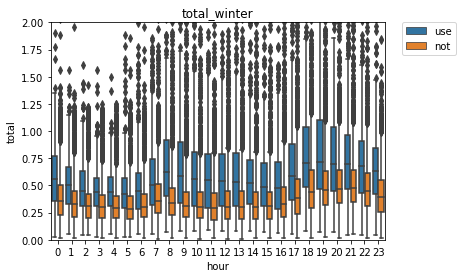

In [276]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_winter')
plt.show()

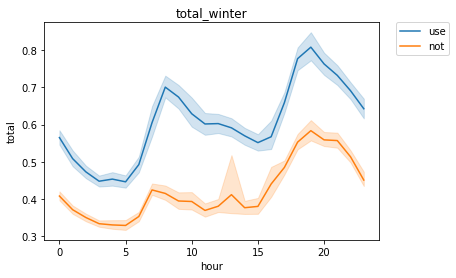

In [277]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_winter')
plt.show()

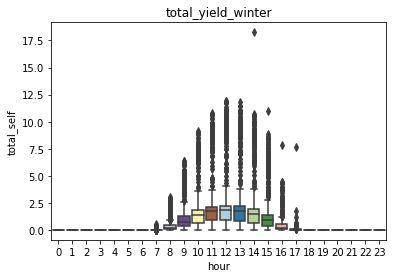

In [278]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_winter, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_winter')
plt.show()

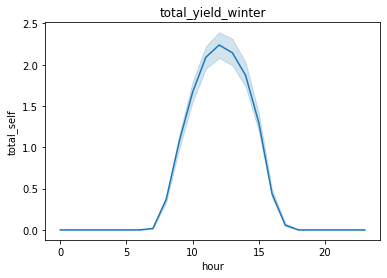

In [279]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_winter)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_winter')
plt.show()

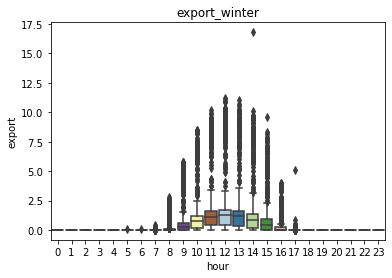

In [280]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_winter, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_winter')
plt.show()

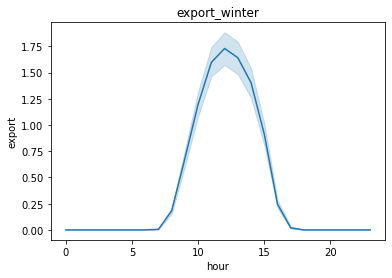

In [281]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_winter)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_winter')
plt.show()

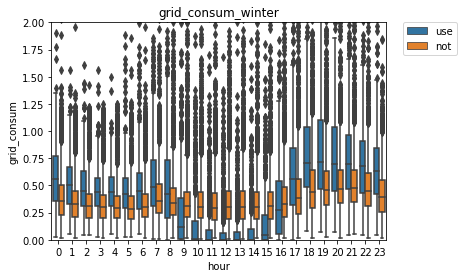

In [282]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_winter')
plt.show()

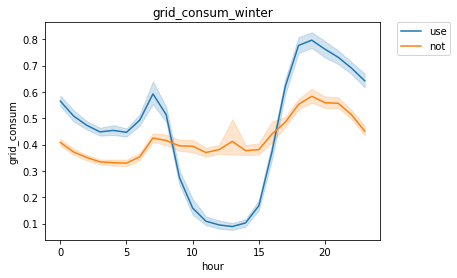

In [283]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_winter')
plt.show()

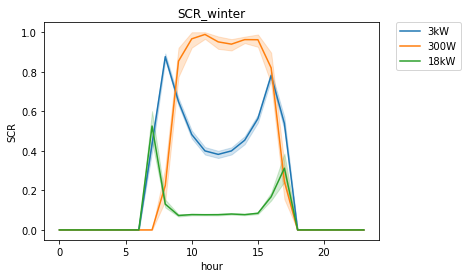

In [284]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_winter')
plt.show()

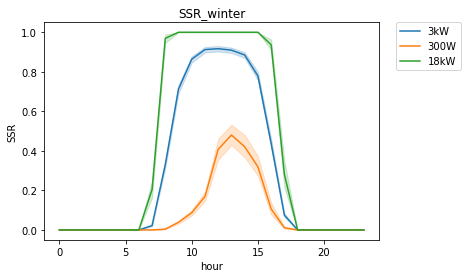

In [285]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_winter')
plt.show()

<hr>

## **<1년(total)>**

### 2021.05 ~ 2022.04

In [286]:
df_all_hour_year = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') |
                              (df_all_hour.ym == '2021/8') | (df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') |
                              (df_all_hour.ym == '2021/11') | (df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') |
                              (df_all_hour.ym == '2022/2') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [287]:
# 총 전력 소비량
df_all_hour_year.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   8630.0  0.394510  0.385771  0.019897  0.210022  0.320007  0.479980   
     1   8651.0  0.356959  0.309837  0.019897  0.199951  0.290039  0.430008   
     2   8648.0  0.326704  0.221296  0.030029  0.189941  0.279907  0.400024   
     3   8653.0  0.311379  0.217883  0.020020  0.179993  0.260010  0.380005   
     4   8651.0  0.301027  0.232490  0.020020  0.170166  0.250000  0.369995   
     5   8617.0  0.301323  0.283709  0.029907  0.170013  0.250000  0.369873   
     6   8617.0  0.339115  0.651626  0.020020  0.190002  0.279907  0.399963   
     7   8609.0  0.403809  0.386665  0.010010  0.239990  0.339844  0.479980   
     8   8647.0  0.385829  0.385841  0.010010  0.219971  0.320068  0.459961   
     9   8625.0  0.368576  0.420464  0.019958  0.199951  0.300049  0.430054   
     10  8628.0  0.377720  0.634490  0.010010  0.189941  0.290039  0.430176   
     11  8626.0  0.382108  0.821047  0.020020  0.179932  0.280029  0.429932   
     12  8611.0  0.378494  0.391948  0.010010  0.179993  0.290039  0.449951   
     13  8619.0  0.439426  4.273527  0.010010  0.179993  0.289978  0.440002   
     14  8608.0  0.380254  0.691645  0.019897  0.180176  0.289978  0.430054   
     15  8608.0  0.377711  0.441843  0.019897  0.189941  0.290039  0.430176   
     16  8598.0  0.412264  0.727799  0.019958  0.200012  0.310059  0.469971   
     17  8600.0  0.456272  0.683536  0.019897  0.219971  0.349915  0.539795   
     18  8566.0  0.513574  0.482302  0.019897  0.250000  0.399902  0.609863   
     19  8598.0  0.559232  0.636881  0.019958  0.299805  0.430054  0.620117   
     20  8580.0  0.553580  0.461363  0.020020  0.329834  0.459961  0.639893   
     21  8580.0  0.554290  0.522639  0.039978  0.339966  0.459961  0.630005   
     22  8635.0  0.494161  0.378847  0.020020  0.299927  0.419922  0.589966   
     23  8618.0  0.430391  0.354789  0.020020  0.239990  0.359985  0.530029   
use  0   3583.0  0.502179  0.310406  0.029968  0.280029  0.460022  0.660156   
     1   3580.0  0.454248  0.313453  0.030029  0.260010  0.410095  0.590088   
     2   3588.0  0.414573  0.235768  0.039978  0.250000  0.380127  0.550049   
     3   3581.0  0.395143  0.223659  0.030029  0.239990  0.369629  0.520020   
     4   3573.0  0.389486  0.231605  0.039978  0.229980  0.359985  0.520020   
     5   3573.0  0.392829  0.223509  0.029968  0.239990  0.359863  0.510010   
     6   3557.0  0.439687  0.317755  0.049805  0.249992  0.380005  0.550049   
     7   3551.0  0.547761  0.482223  0.049500  0.299805  0.450012  0.679932   
     8   3562.0  0.618136  0.443044  0.071472  0.340210  0.529907  0.770020   
     9   3567.0  0.559658  0.396171  0.080078  0.299988  0.470703  0.710136   
     10  3567.0  0.523520  0.401421  0.070312  0.260742  0.449951  0.679932   
     11  3553.0  0.535711  0.421736  0.050537  0.260010  0.440186  0.699951   
     12  3554.0  0.565838  0.429401  0.079834  0.279785  0.469971  0.739868   
     13  3554.0  0.554792  0.394796  0.060059  0.279937  0.469971  0.701172   
     14  3560.0  0.534069  0.391285  0.026428  0.270142  0.440186  0.669830   
     15  3568.0  0.521292  0.459974  0.070068  0.269985  0.429993  0.630100   
     16  3581.0  0.526736  0.489992  0.060547  0.269775  0.429932  0.639893   
     17  3576.0  0.581942  0.459897  0.057556  0.290009  0.470085  0.739990   
     18  3571.0  0.683113  0.455385  0.049988  0.360046  0.589844  0.889893   
     19  3576.0  0.741819  0.522261  0.049988  0.390015  0.630005  1.000000   
     20  3572.0  0.717602  0.478673  0.049988  0.409668  0.619873  0.942566   
     21  3562.0  0.691217  0.427003  0.039978  0.390137  0.620071  0.919922   
     22  3571.0  0.649445  0.411811  0.040039  0.379990  0.590088  0.850098   
     23  3571.0  0.580017  0.374758  0.039978  0.320007  0.530029  0.760254   

                max  
type 시간              
not  0    12.57

In [288]:
# 총 전력 생산량
df_all_hour_year_use = df_all_hour_year[df_all_hour_year.type == 'use']
df_all_hour_year_use.groupby(['시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                          
0   3583.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   3580.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   3588.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   3581.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   3573.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   3573.0  0.001989  0.010598  0.0  0.000000  0.000000  0.000000   0.391602
6   3557.0  0.053843  0.138813  0.0  0.000000  0.000000  0.049927   1.330078
7   3551.0  0.252944  0.453386  0.0  0.010010  0.090088  0.300781   3.500000
8   3562.0  0.711876  0.970340  0.0  0.140137  0.439941  0.869995   6.370117
9   3567.0  1.285997  1.530025  0.0  0.360107  0.950195  1.520020   8.669922
10  3567.0  1.737090  1.989104  0.0  0.599731  1.400146  1.920105  10.870117
11  3553.0  2.015441  2.294960  0.0  0.720215  1.670044  2.140625  14.270508
12  3554.0  2.103880  2.362645  0.0  0.770020  1.759888  2.240082  12.759766
13  3554.0  2.014674  2.304416  0.0  0.689941  1.660034  2.150146  12.140625
14  3560.0  1.761579  2.075524  0.0  0.560059  1.419922  1.909912  18.259766
15  3568.0  1.322332  1.632636  0.0  0.359863  0.969971  1.510010  11.300049
16  3581.0  0.726750  1.038117  0.0  0.130127  0.459961  0.929993  11.000000
17  3576.0  0.254654  0.473610  0.0  0.010010  0.100098  0.350098  12.609985
18  3571.0  0.052783  0.118072  0.0  0.000000  0.000000  0.060059   1.599243
19  3576.0  0.002789  0.015800  0.0  0.000000  0.000000  0.000000   0.704712
20  3572.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  3562.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  3571.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  3571.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [289]:
# 총 전력 수출량
df_all_hour_year_use = df_all_hour_year[df_all_hour_year.type == 'use']
df_all_hour_year_use.groupby(['시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%        max
시간                                                                          
0   3583.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
1   3580.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
2   3588.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
3   3581.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
4   3573.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
5   3573.0  0.000247  0.003973  0.0  0.000000  0.000000  0.000000   0.120117
6   3557.0  0.019415  0.101047  0.0  0.000000  0.000000  0.000000   1.180176
7   3551.0  0.124072  0.387872  0.0  0.000000  0.000000  0.040039   3.189941
8   3562.0  0.431608  0.911696  0.0  0.000000  0.069946  0.409912   5.779785
9   3567.0  0.910842  1.456930  0.0  0.040039  0.459961  1.020020   7.930176
10  3567.0  1.331549  1.892632  0.0  0.179962  0.899902  1.479980   9.950195
11  3553.0  1.585281  2.180707  0.0  0.289917  1.150024  1.710205  12.930664
12  3554.0  1.645035  2.240018  0.0  0.300049  1.209961  1.780029  11.601562
13  3554.0  1.564846  2.194531  0.0  0.239990  1.109863  1.690002  11.378906
14  3560.0  1.338145  1.966679  0.0  0.169968  0.880005  1.470093  16.799805
15  3568.0  0.950532  1.542054  0.0  0.049927  0.505005  1.070068   9.610107
16  3581.0  0.452844  0.927236  0.0  0.000000  0.119995  0.500000   6.940002
17  3576.0  0.109301  0.335948  0.0  0.000000  0.000000  0.059937   6.169922
18  3571.0  0.011504  0.067675  0.0  0.000000  0.000000  0.000000   1.260254
19  3576.0  0.000122  0.002883  0.0  0.000000  0.000000  0.000000   0.120148
20  3572.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
21  3562.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
22  3571.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000
23  3571.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   0.000000

In [290]:
# 총 그리드 소비량
df_all_hour_year.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   8630.0  0.394510  0.385771  0.019897  0.210022  0.320007  0.479980   
     1   8651.0  0.356959  0.309837  0.019897  0.199951  0.290039  0.430008   
     2   8648.0  0.326704  0.221296  0.030029  0.189941  0.279907  0.400024   
     3   8653.0  0.311379  0.217883  0.020020  0.179993  0.260010  0.380005   
     4   8651.0  0.301027  0.232490  0.020020  0.170166  0.250000  0.369995   
     5   8617.0  0.301323  0.283709  0.029907  0.170013  0.250000  0.369873   
     6   8617.0  0.339115  0.651626  0.020020  0.190002  0.279907  0.399963   
     7   8609.0  0.403809  0.386665  0.010010  0.239990  0.339844  0.479980   
     8   8647.0  0.385829  0.385841  0.010010  0.219971  0.320068  0.459961   
     9   8625.0  0.368576  0.420464  0.019958  0.199951  0.300049  0.430054   
     10  8628.0  0.377720  0.634490  0.010010  0.189941  0.290039  0.430176   
     11  8626.0  0.382108  0.821047  0.020020  0.179932  0.280029  0.429932   
     12  8611.0  0.378494  0.391948  0.010010  0.179993  0.290039  0.449951   
     13  8619.0  0.439426  4.273527  0.010010  0.179993  0.289978  0.440002   
     14  8608.0  0.380254  0.691645  0.019897  0.180176  0.289978  0.430054   
     15  8608.0  0.377711  0.441843  0.019897  0.189941  0.290039  0.430176   
     16  8598.0  0.412264  0.727799  0.019958  0.200012  0.310059  0.469971   
     17  8600.0  0.456272  0.683536  0.019897  0.219971  0.349915  0.539795   
     18  8566.0  0.513574  0.482302  0.019897  0.250000  0.399902  0.609863   
     19  8598.0  0.559232  0.636881  0.019958  0.299805  0.430054  0.620117   
     20  8580.0  0.553580  0.461363  0.020020  0.329834  0.459961  0.639893   
     21  8580.0  0.554290  0.522639  0.039978  0.339966  0.459961  0.630005   
     22  8635.0  0.494161  0.378847  0.020020  0.299927  0.419922  0.589966   
     23  8618.0  0.430391  0.354789  0.020020  0.239990  0.359985  0.530029   
use  0   3583.0  0.502296  0.310518  0.029968  0.280029  0.460022  0.660156   
     1   3580.0  0.453591  0.298833  0.030029  0.260010  0.410095  0.590088   
     2   3588.0  0.414610  0.235759  0.039978  0.250000  0.380127  0.550049   
     3   3581.0  0.395161  0.223642  0.030029  0.239990  0.369629  0.520020   
     4   3573.0  0.389504  0.231589  0.039978  0.229980  0.359985  0.520020   
     5   3573.0  0.391087  0.223627  0.029968  0.239990  0.354980  0.510010   
     6   3557.0  0.405259  0.326001  0.000000  0.210083  0.340027  0.529907   
     7   3551.0  0.418888  0.500623  0.000000  0.130005  0.320068  0.559998   
     8   3562.0  0.337869  0.457433  0.000000  0.020020  0.199951  0.510010   
     9   3567.0  0.184503  0.348328  0.000000  0.000000  0.029999  0.239990   
     10  3567.0  0.117978  0.304288  0.000000  0.000000  0.000000  0.109985   
     11  3553.0  0.105551  0.282850  0.000000  0.000000  0.000000  0.079956   
     12  3554.0  0.106993  0.283116  0.000000  0.000000  0.000000  0.070068   
     13  3554.0  0.104964  0.253539  0.000000  0.000000  0.000000  0.080078   
     14  3560.0  0.110636  0.254422  0.000000  0.000000  0.000000  0.100098   
     15  3568.0  0.149492  0.319217  0.000000  0.000000  0.020020  0.189941   
     16  3581.0  0.252830  0.384005  0.000000  0.009949  0.109863  0.370117   
     17  3576.0  0.436589  0.427304  0.000000  0.120026  0.330078  0.630005   
     18  3571.0  0.641838  0.461832  0.000000  0.309998  0.559814  0.859863   
     19  3576.0  0.736514  0.496265  0.049988  0.380127  0.629883  0.989990   
     20  3572.0  0.717639  0.478663  0.049988  0.409668  0.619873  0.942566   
     21  3562.0  0.691442  0.427218  0.039978  0.390137  0.620117  0.919922   
     22  3571.0  0.649349  0.410331  0.040039  0.379990  0.590088  0.850098   
     23  3571.0  0.580323  0.376162  0.039978  0.320007  0.530029  0.760254   

                max  
type 시간              
not  0    12.57

In [291]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                             
18kW     0    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    361.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    364.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    365.0  0.124949  0.309211  0.000000  0.000000  0.000000   
         6    365.0  0.235290  0.308281  0.000000  0.000000  0.132197   
         7    364.0  0.294098  0.281700  0.000000  0.120266  0.171995   
         8    364.0  0.123174  0.107905  0.000000  0.080955  0.096989   
         9    365.0  0.098696  0.067126  0.000000  0.072598  0.088026   
         10   364.0  0.096755  0.086671  0.030218  0.072764  0.083258   
         11   365.0  0.094555  0.074232  0.038317  0.073969  0.082252   
         12   365.0  0.097262  0.064639  0.046961  0.075758  0.088972   
         13   364.0  0.096291  0.072465  0.036973  0.072578  0.084306   
         14   365.0  0.099899  0.062235  0.000000  0.076428  0.089628   
         15   365.0  0.110696  0.093869  0.039872  0.076673  0.087966   
         16   362.0  0.156134  0.110105  0.000000  0.094999  0.121177   
         17   361.0  0.283735  0.278995  0.000000  0.116379  0.196953   
         18   362.0  0.257344  0.331957  0.000000  0.000000  0.000000   
         19   362.0  0.107116  0.301003  0.000000  0.000000  0.000000   
         20   361.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   360.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    356.0  0.132022  0.338992  0.000000  0.000000  0.000000   
         7    355.0  0.436620  0.496667  0.000000  0.000000  0.000000   
         8    355.0  0.732394  0.443336  0.000000  0.000000  1.000000   
         9    355.0  0.945775  0.225611  0.000000  1.000000  1.000000   
         10   355.0  0.984908  0.118265  0.000000  1.000000  1.000000   
         11   355.0  0.986932  0.081355  0.000000  1.000000  1.000000   
         12   354.0  0.960711  0.124648  0.000000  1.000000  1.000000   
         13   356.0  0.958561  0.108524  0.000000  0.956523  1.000000   
         14   356.0  0.956010  0.129182  0.000000  1.000000  1.000000   
         15   356.0  0.954064  0.173214  0.000000  1.000000  1.000000   
         16   355.0  0.906573  0.283344  0.000000  1.000000  1.000000   
         17   355.0  0.610139  0.487371  0.000000  0.000000  1.000000   
         18   354.0  0.341808  0.474987  0.000000  0.000000  0.000000   
         19   355.0  0.022535  0.148626  0.000000  0.000000  0.000000   
         20   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   354.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   2865.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.000000  0.000000  0.000000   

In [292]:
# SSR(자가공급률)
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                             
18kW     0    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    361.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    364.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    365.0  0.031323  0.090141  0.000000  0.000000  0.000000   
         6    365.0  0.329523  0.397422  0.000000  0.000000  0.081529   
         7    364.0  0.690738  0.374047  0.000000  0.334195  0.938593   
         8    364.0  0.976799  0.105901  0.000000  1.000000  1.000000   
         9    365.0  0.993852  0.073166  0.000000  1.000000  1.000000   
         10   364.0  0.991235  0.075615  0.108770  1.000000  1.000000   
         11   365.0  0.992011  0.068997  0.072687  1.000000  1.000000   
         12   365.0  0.995019  0.054210  0.116316  1.000000  1.000000   
         13   364.0  0.994752  0.055540  0.068244  1.000000  1.000000   
         14   365.0  0.992725  0.066728  0.000000  1.000000  1.000000   
         15   365.0  0.984026  0.095595  0.027144  1.000000  1.000000   
         16   362.0  0.953944  0.142235  0.000000  1.000000  1.000000   
         17   361.0  0.631964  0.414966  0.000000  0.170883  0.873846   
         18   362.0  0.272388  0.367204  0.000000  0.000000  0.000000   
         19   362.0  0.011963  0.043930  0.000000  0.000000  0.000000   
         20   361.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   360.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   362.0  0.000000  0.000000  0.000000  0.000000  0.000000   
300W     0    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5    356.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6    356.0  0.004746  0.013291  0.000000  0.000000  0.000000   
         7    355.0  0.016011  0.025013  0.000000  0.000000  0.000000   
         8    355.0  0.030157  0.036620  0.000000  0.000000  0.020409   
         9    355.0  0.100583  0.082797  0.000000  0.033625  0.085694   
         10   355.0  0.166027  0.131843  0.000000  0.061541  0.131594   
         11   355.0  0.250549  0.174474  0.000000  0.104369  0.214301   
         12   354.0  0.400308  0.253118  0.000000  0.186984  0.382682   
         13   356.0  0.429015  0.277113  0.000000  0.166639  0.407816   
         14   356.0  0.402496  0.271256  0.000000  0.161929  0.363745   
         15   356.0  0.327598  0.245283  0.000000  0.125016  0.272586   
         16   355.0  0.197227  0.206882  0.000000  0.040427  0.110961   
         17   355.0  0.086977  0.130483  0.000000  0.000000  0.032236   
         18   354.0  0.020430  0.042378  0.000000  0.000000  0.000000   
         19   355.0  0.000178  0.001257  0.000000  0.000000  0.000000   
         20   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21   354.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23   355.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3kW      0   2865.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   2862.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   2871.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   2863.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   2853.0  0.000000  0.000000  0.000000  0.000000  0.000000   

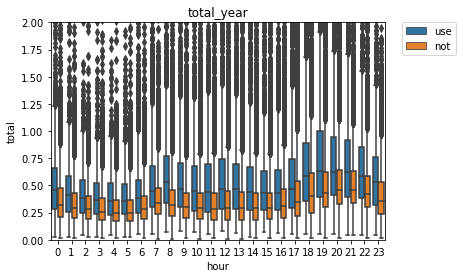

In [293]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_year')
plt.show()

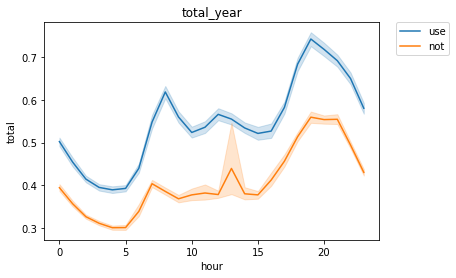

In [294]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_year')
plt.show()

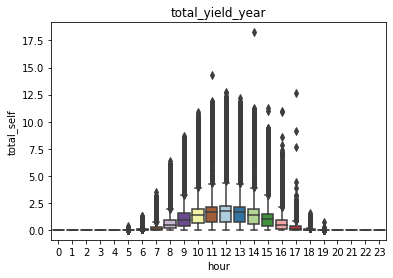

In [295]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_year, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_year')
plt.show()

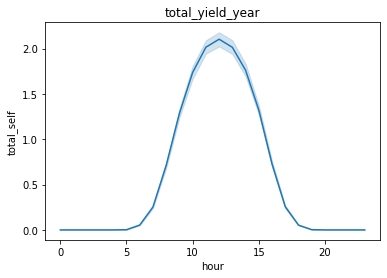

In [296]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_year)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_year')
plt.show()

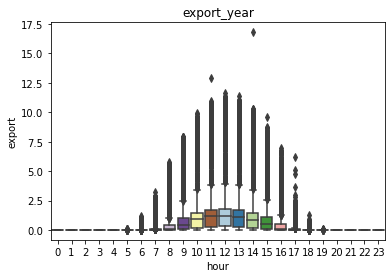

In [297]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_year, palette='Paired')
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_year')
plt.show()

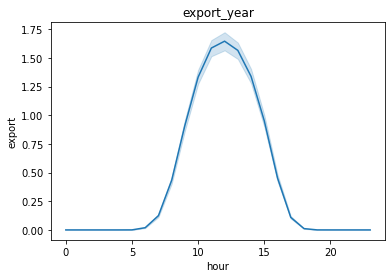

In [298]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_year)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_year')
plt.show()

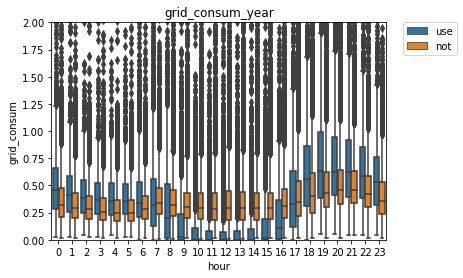

In [299]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_year')
plt.show()

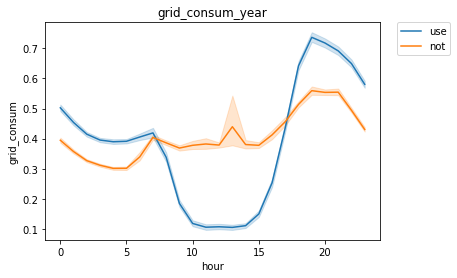

In [300]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_year')
plt.show()

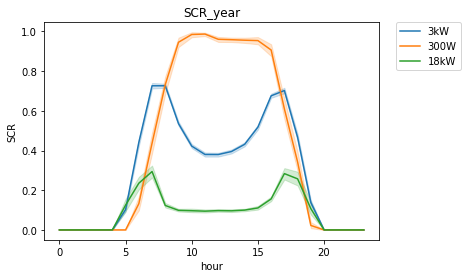

In [301]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_year')
plt.show()

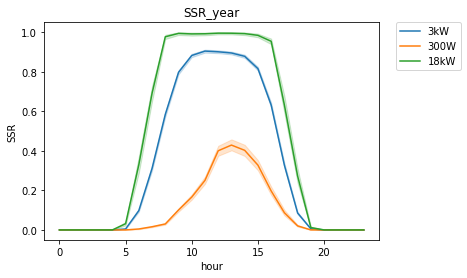

In [302]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_year')
plt.show()